# FORECAST SALE MODEL


## COLAB

In [1]:
#Mount Drive as our File System
import os
drive_loc = '/content/gdrive'
files_loc = os.path.join(drive_loc, 'MyDrive', 'Colab Notebooks', 'Kschool', 'TFM')

from google.colab import drive
drive.mount(drive_loc, force_remount= True)

#This helps us to import py files located in the Drive directory
import sys
sys.path.append(os.path.abspath(files_loc))

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
pip install fitter

In [ ]:
pip install -U scikit-learn

In [ ]:
pip install "statsmodels==0.12.2"

## All Functions defined for this Project

In [292]:
#Module with all functions needed
from functions import *

In [293]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constant Section

In [3]:
#File names

#Data set to train
my_train_file = "./data_v1.xlsx"

#Data set to validate
my_validate_file = "./data_validate_v1.xlsx"

#Pickle file name
pickle_file = 'object.pkl'

In [4]:
#Set all Visualization Parameters

#Parameters
visual_parameters = dict(
    {'figure.figsize': [20, 10], #Size of the plot
     'font.size': 15, #Font size
     'xtick.labelsize': 15, #Font size in X
     'ytick.labelsize': 15, #Font size in Y
     'xtick.direction': 'inout',
     'ytick.direction': 'inout',
})

#Apply all parameters
for parameter in visual_parameters:
    plt.rcParams[parameter] = visual_parameters[parameter]

#Apply Theme style
style = 'seaborn-darkgrid' #Theme style
plt.style.use(style)

In [5]:
#A list all Continuous Distributions available in Scipy

stats = [
    'alpha', 'anglit', 'arcsine', 'argus', 'beta',
    'betaprime', 'bradford', 'burr', 'burr12', 'cauchy',
    'chi', 'chi2', 'cosine', 'crystalball', 'dgamma',
    'dweibull', 'erlang', 'expon', 'exponnorm', 'exponweib',
    'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy',
    'foldnorm', 'genlogistic', 'gennorm', 'genpareto',
    'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 
    'genhalflogistic', 'geninvgauss', 'gilbrat', 'gompertz', 'gumbel_r',
    'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm',
    'halfgennorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull',
    'johnsonsb', 'johnsonsu', 'kappa4', 'kappa3', 'ksone',
    'kstwo', 'kstwobign', 'laplace', 'laplace_asymmetric', 'levy',
    'levy_l', 'levy_stable', 'logistic', 'loggamma', 'loglaplace',
    'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke',
    'moyal', 'nakagami', 'ncx2', 'ncf', 'nct',
    'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw',
    'powerlognorm', 'powernorm', 'rdist', 'rayleigh', 'rice',
    'recipinvgauss', 'semicircular', 'kewnorm', 't', 'trapezoid',
    'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform',
    'vonmises', 'vonmises_line', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'
]

In [6]:
#Pandas Parameters

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Exploratory Data Analysis

Let's analyze what is the size of our observations and columns. Is there any Nan or check the type of the data. This should be the starting point of any Data Science Project.

In [7]:
#Load the main data
data = pd.read_excel(my_train_file)
data

Date          Program  Visits  Revenue
0      2015-01-01 23:59:59              SEO       0  2317.14
1      2015-01-01 23:59:59              SEO       0   903.10
2      2015-01-01 23:59:59              SEO    2844     0.00
3      2015-01-01 23:59:59           Direct       0    24.31
4      2015-01-01 23:59:59           Direct     937     0.00
...                    ...              ...     ...      ...
106691 2021-05-09 23:59:59  ::unspecified::      21     0.00
106692 2021-05-09 23:59:59      Paid Social    1050     0.00
106693 2021-05-09 23:59:59   Organic Social      19     0.00
106694 2021-05-09 23:59:59            Other       4     0.00
106695 2021-05-09 23:59:59           Social       0     0.00

[106696 rows x 4 columns]

In [8]:
#Dimension of the Dataset
data.shape
#More than 106K records and 4 columns

(106696, 4)

In [9]:
#Let's check if there is any NaN
data.isna().sum()

Date       0
Program    0
Visits     0
Revenue    0
dtype: int64

In [10]:
data.dtypes

Date       datetime64[ns]
Program            object
Visits              int64
Revenue           float64
dtype: object

In [11]:
#Let's check if there is a zero value in Revenue
check = data.groupby(['Date'])['Revenue'].sum().reset_index()
check_zeros = check[check['Revenue'] == 0]
check_zeros

Date  Revenue
66   2015-03-08 23:59:59      0.0
163  2015-06-13 23:59:59      0.0
387  2016-01-23 23:59:59      0.0
450  2016-03-26 23:59:59      0.0
924  2017-07-13 23:59:59      0.0
1930 2020-04-14 23:59:59      0.0

In [12]:
#There are some and we are going to estimate the Revenue, we are going to use the 
#Mean between Revenue day before and day after and we are going to apply that one to Direct Traffic
data = fill_zero_revenue(data)

In [13]:
#No Zero in Revenue
check = data.groupby(['Date'])['Revenue'].sum().reset_index()
check_zeros = check[check['Revenue'] == 0]
check_zeros

Empty DataFrame
Columns: [Date, Revenue]
Index: []

In [14]:
#Validate Set
data_validate = pd.read_excel(my_validate_file)
data_validate

Date          Program  Visits  Revenue
0    2021-05-10 23:59:59           Direct       1  4212.66
1    2021-05-10 23:59:59           Direct       1  3488.05
2    2021-05-10 23:59:59           Direct       1  2926.59
3    2021-05-10 23:59:59           Direct       1  2584.90
4    2021-05-10 23:59:59           Direct       1  1374.33
...                  ...              ...     ...      ...
2740 2021-06-13 23:59:59      Paid Social    1247     0.00
2741 2021-06-13 23:59:59   Organic Social      17     0.00
2742 2021-06-13 23:59:59  ::unspecified::       5     0.00
2743 2021-06-13 23:59:59            Other       0     0.00
2744 2021-06-13 23:59:59           Social       0     0.00

[2745 rows x 4 columns]

## Distribution and briefly Statistical Analysis

It is important analyze the Revenue behave. We are going to exclude the Program Variable and just keep Year, Month, Day, Visits and Revenue.

In [15]:
data

Date          Program  Visits  Revenue
0      2015-01-01 23:59:59              SEO       0  2317.14
1      2015-01-01 23:59:59              SEO       0   903.10
2      2015-01-01 23:59:59              SEO    2844     0.00
3      2015-01-01 23:59:59           Direct       0    24.31
4      2015-01-01 23:59:59           Direct     937     0.00
...                    ...              ...     ...      ...
106691 2021-05-09 23:59:59  ::unspecified::      21     0.00
106692 2021-05-09 23:59:59      Paid Social    1050     0.00
106693 2021-05-09 23:59:59   Organic Social      19     0.00
106694 2021-05-09 23:59:59            Other       4     0.00
106695 2021-05-09 23:59:59           Social       0     0.00

[106696 rows x 4 columns]

In [18]:
#Manipulate the DataFrame a little bit. Modifying the Dates
data_small = split_dates_by_columns(data, 'Date')
#For this early stage I discard type of Traffic and just sum all of them and group by Index, Year, Month and Day
data_small = data_small.groupby(['Date', 'Year','Month','Day'])[['Visits','Revenue']].sum()
#Reset Index after having made a groupby
data_small = data_small.reset_index(['Year', 'Month', 'Day'])
#Resample to D and 00h00min00sec
data_small = data_small.resample('D', offset='00h00min00sec').sum()
data_small.tail(5)

Year  Month  Day  Visits   Revenue
Date                                          
2021-05-05  2021      5    5   14373  37283.53
2021-05-06  2021      5    6   14025  39991.11
2021-05-07  2021      5    7   12399  24901.84
2021-05-08  2021      5    8   11018  15744.14
2021-05-09  2021      5    9   13924  19703.32

In [20]:
#Do the same for the Validation set
data_validation = split_dates_by_columns(data_validate, 'Date')
#For this early stage I discard type of Traffic and just sum all of them and group by Index, Year, Month and Day
data_validation = data_validation.groupby(['Date', 'Year','Month','Day'])[['Visits','Revenue']].sum()
#Reset Index after having made a groupby
data_validation = data_validation.reset_index(['Year', 'Month', 'Day'])
#Resample to D and 00h00min00sec
data_validation = data_validation.resample('D', offset='00h00min00sec').sum()
data_validation.head(5)

Year  Month  Day  Visits    Revenue
Date                                           
2021-05-10  2021      5   10   14985   38859.97
2021-05-11  2021      5   11   15054   62814.95
2021-05-12  2021      5   12   15321   34882.23
2021-05-13  2021      5   13   14933   47518.14
2021-05-14  2021      5   14   15955  100651.00

In [21]:
#Lets check it out how this looks like and we can see that we have 2293 rows of data. Original one was 104793 rows
data_small.shape

(2321, 5)

In [22]:
#Let's see the main descriptive statistics
data_small.describe()

Year        Month          Day         Visits        Revenue
count  2321.000000  2321.000000  2321.000000    2321.000000    2321.000000
mean   2017.694959     6.308057    15.680310   13433.658337   25825.089417
std       1.843913     3.479171     8.807686    8616.702674   38526.622896
min    2015.000000     1.000000     1.000000     245.000000      46.420000
25%    2016.000000     3.000000     8.000000    7858.000000    9739.620000
50%    2018.000000     6.000000    16.000000   10223.000000   18558.480000
75%    2019.000000     9.000000    23.000000   16581.000000   32819.390000
max    2021.000000    12.000000    31.000000  109148.000000  858333.560000

What we can see here, Revenue is much more scattered than Visits

In [20]:
#Outliners Analysis
#There are number way above 100.000. Those are some outliners
sorted(data_small['Revenue'], reverse=True)

[858333.5600000034,
 784321.290000003,
 590327.1899999998,
 563812.3999999989,
 529061.6699999995,
 334605.57000000076,
 311593.59999999957,
 304644.9999999996,
 206742.70999999996,
 192917.33000000007,
 191231.44000000012,
 187432.28999999983,
 186791.86000000004,
 171407.57999999987,
 169560.74000000005,
 167811.78999999986,
 153453.7500000001,
 139222.25999999998,
 132259.49000000002,
 132244.95,
 131383.15999999992,
 130645.76999999989,
 124783.69999999997,
 124024.70000000022,
 117069.57999999999,
 115680.39000000003,
 112899.65000000001,
 111940.03999999998,
 109272.9500000002,
 107702.02999999996,
 107599.70999999995,
 104098.95000000004,
 101380.1800000001,
 100517.25999999995,
 98058.94000000002,
 97243.22999999998,
 95266.08000000016,
 94826.27,
 93087.03000000006,
 92653.50999999995,
 92156.65000000002,
 91074.79,
 90887.97000000009,
 90056.15,
 89374.43000000004,
 88473.35000000008,
 87368.04000000008,
 86168.33999999995,
 84098.13000000002,
 83723.62,
 82678.79,
 81664.65,

In [21]:
#High Variability in Revenue
pearson_revenue = data_small['Revenue'].std() / data_small['Revenue'].mean()
#Visit Variability is less than Revenue but it is above 0.5
pearson_traffic = data_small['Visits'].std() / data_small['Visits'].mean()
print(f'Pearson\'s coefficient of variation - Revenue: {pearson_revenue:.2%}')
print(f'Pearson\'s coefficient of variation - Visits: {pearson_traffic:.2%}')

Pearson's coefficient of variation - Revenue: 150.37%
Pearson's coefficient of variation - Visits: 64.57%


We can see how the Revenue evolution across time. There are some big outliners due to the BlackFriday and Cyber Monday. Those exceptional days could affect in our model but we cannot remove them. However, maybe we can create a specific model for those ones and remove them for this model. Let's see

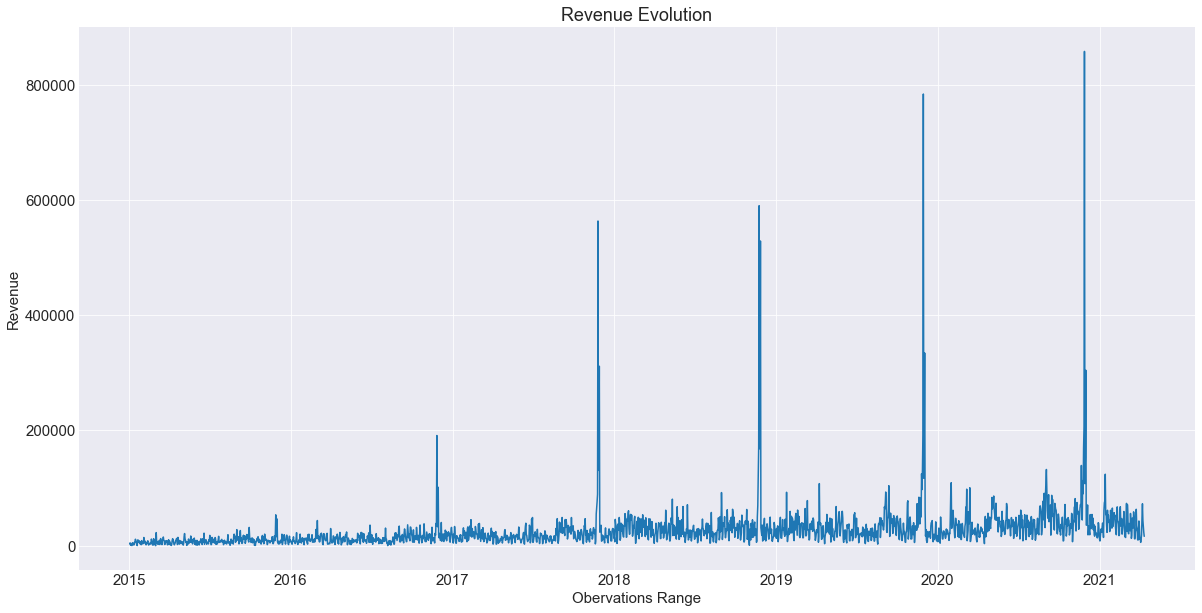

In [96]:
draw_plot(data_small, 'Revenue')

Let's see the behaviour of the Revenue and Visits and how good or bad they adjust with one polynomial.

Revenue: This daily granularity does not help to find a simple polynomial to adjust
Visits: Shows almost same issues as Revenue if we take data at daily basis

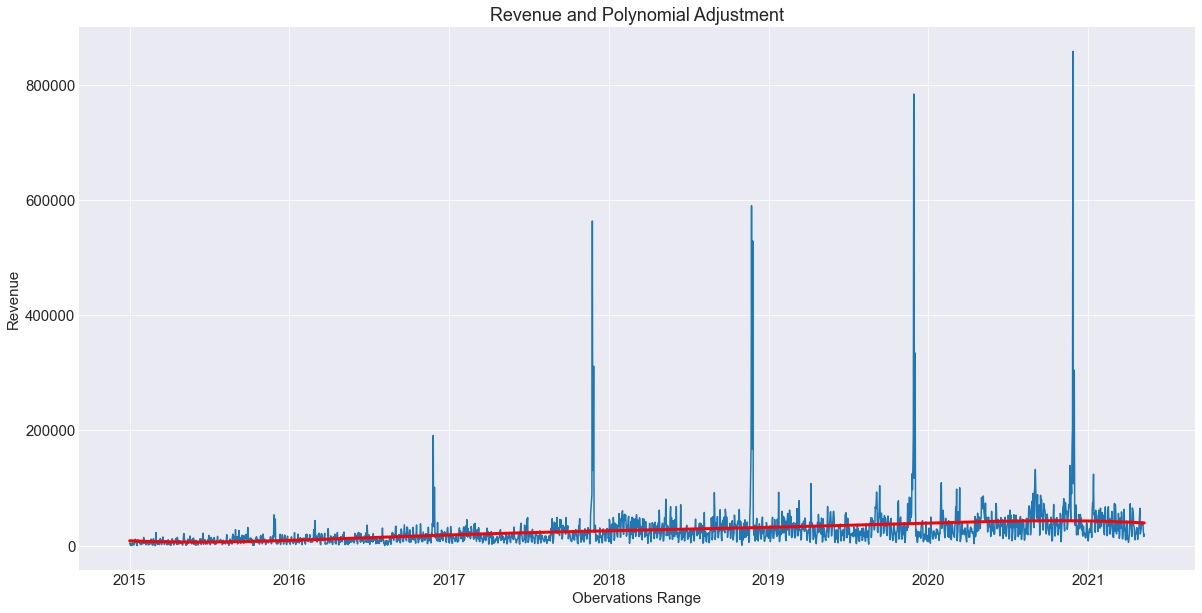

In [297]:
draw_least_squares_polynomial(data_small, data_small.columns[-1], 5)

Besides the target variable which is Revenue, Visits is another important variable which affects importantly the Revenue metric. Let's see how this looks like

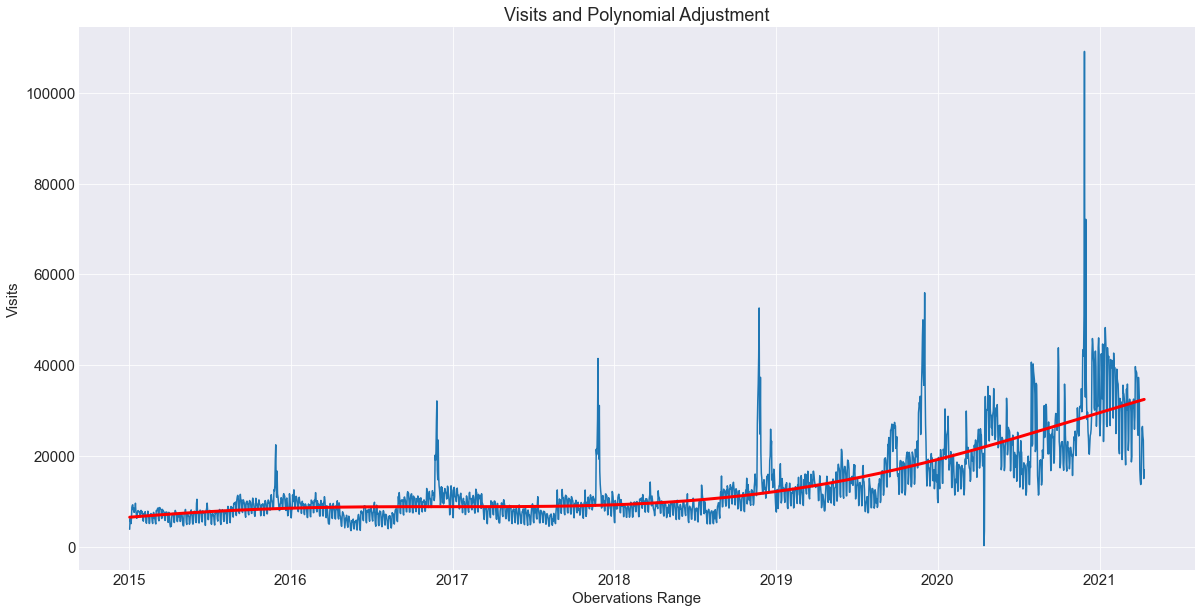

In [108]:
draw_least_squares_polynomial(data_small, data_small.columns[-2], 5)

We can see three different Distribution of our target variable, Revenue:
* Regular Distribution
* Logarithmic Distribution
* Square Transformation

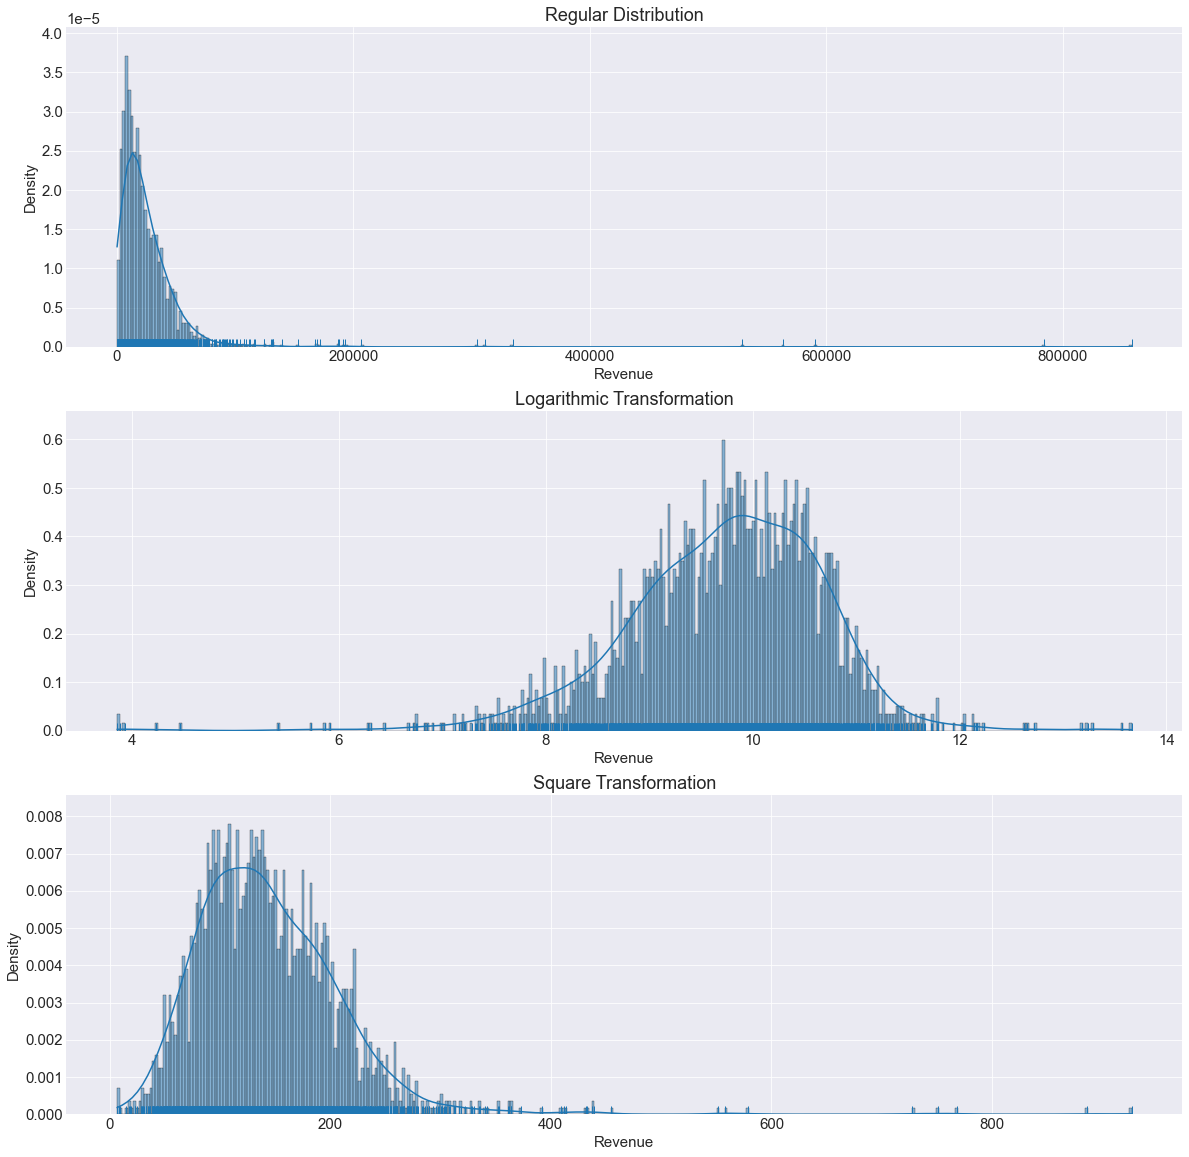

In [100]:
draw_set_of_distributions(data_small, 'Revenue');

Thanks to the Fitter library, we can test multiple Distributions with our target one and check what fits more. Here the results:
* Regular Distribution best fit with **Log-Normal**
* Logarithmic Distribution best fit with **Burr 12** is a subset of the log-logistic and quite similar like Log-Normal but heavier tails
* Square Transformation best fit with **Normal Inverse Gaussian**

{'burr12': (1.6550598046949772,
  1.9283154101132984,
  -124.38283102653897,
  30558.047377748087)}

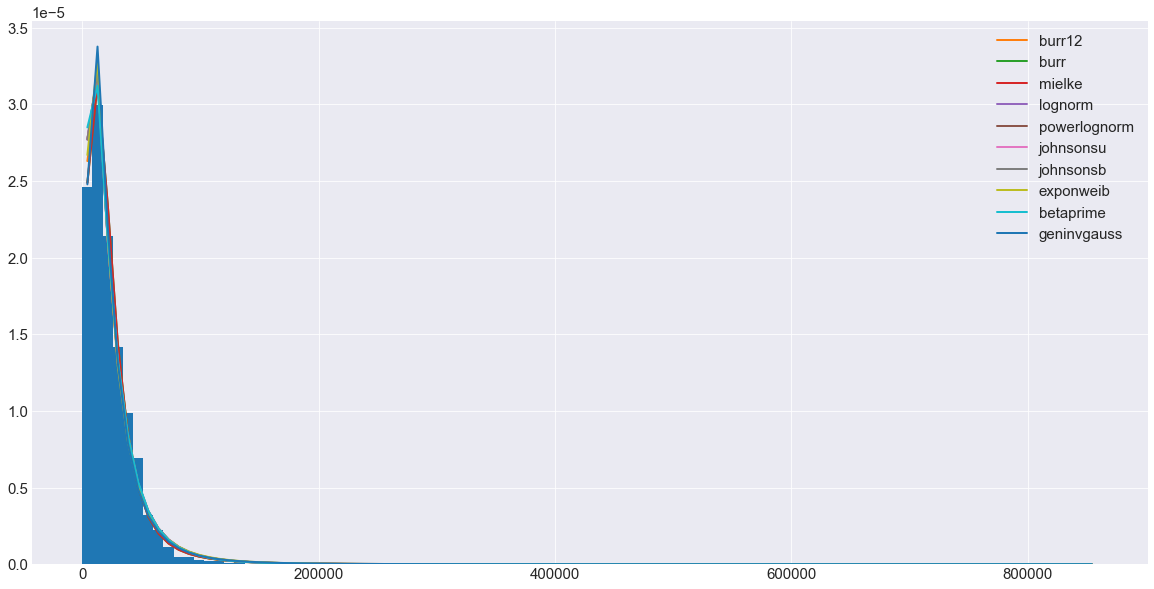

In [77]:
#Let's analyze what Distribution fits better with Revenue
fitter_norm = Fitter(data_small['Revenue'], distributions=stats)
fitter_norm.fit()
fitter_norm.summary(Nbest=10, plot=True)
fitter_norm.get_best(method='sumsquare_error')

sumsquare_error          aic           bic  kl_div
burr12              0.036928  1282.717262 -25275.520096     inf
gengamma            0.048424  1452.675023 -24654.039674     inf
genlogistic         0.049086  1166.894543 -24630.655806     inf
johnsonsu           0.049183  1091.908553 -24618.408684     inf
loggamma            0.051255  1478.166938 -24531.516419     inf
powernorm           0.053807  1517.242742 -24420.109465     inf
johnsonsb           0.059600  1575.373658 -24177.905147     inf
exponweib           0.068584  1548.409773 -23855.958886     inf
pearson3            0.070857  1687.046627 -23788.917109     inf
beta                0.073096  1665.792612 -23709.862413     inf

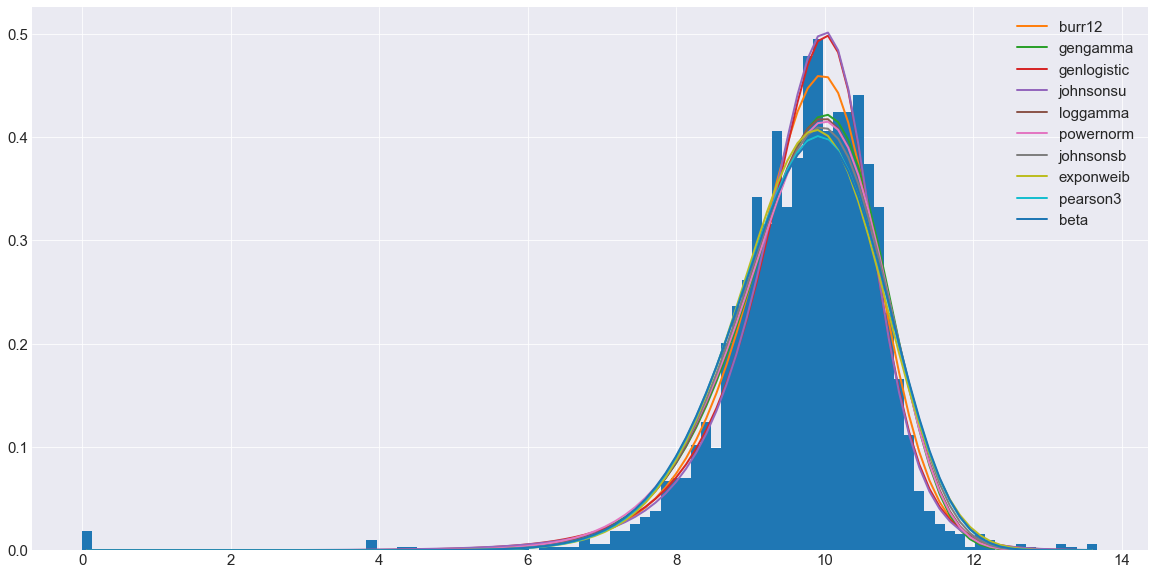

In [41]:
#Let's analyze what Distribution fits better with Revenue after a logarithmic transformation
fitter_log = Fitter(np.log1p(data_small['Revenue']), distributions=stats)
fitter_log.fit()
fitter_log.summary(Nbest=10, plot=True)
fitter_log.get_best(method='sumsquare_error')

/home/dsc/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:4523: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


sumsquare_error          aic           bic  kl_div
norminvgauss         0.000007  2381.874828 -44929.295493     inf
invgamma             0.000007  2267.710491 -44934.851317     inf
betaprime            0.000007  2269.640814 -44926.874785     inf
johnsonsb            0.000007  2372.878995 -44893.139447     inf
fatiguelife          0.000007  2483.989779 -44851.046814     inf
genlogistic          0.000007  2316.157497 -44839.795466     inf
gamma                0.000008  2637.895009 -44679.914903     inf
pearson3             0.000008  2637.895209 -44679.912792     inf
chi2                 0.000008  2637.894584 -44679.911836     inf
beta                 0.000008  2632.894976 -44650.974480     inf

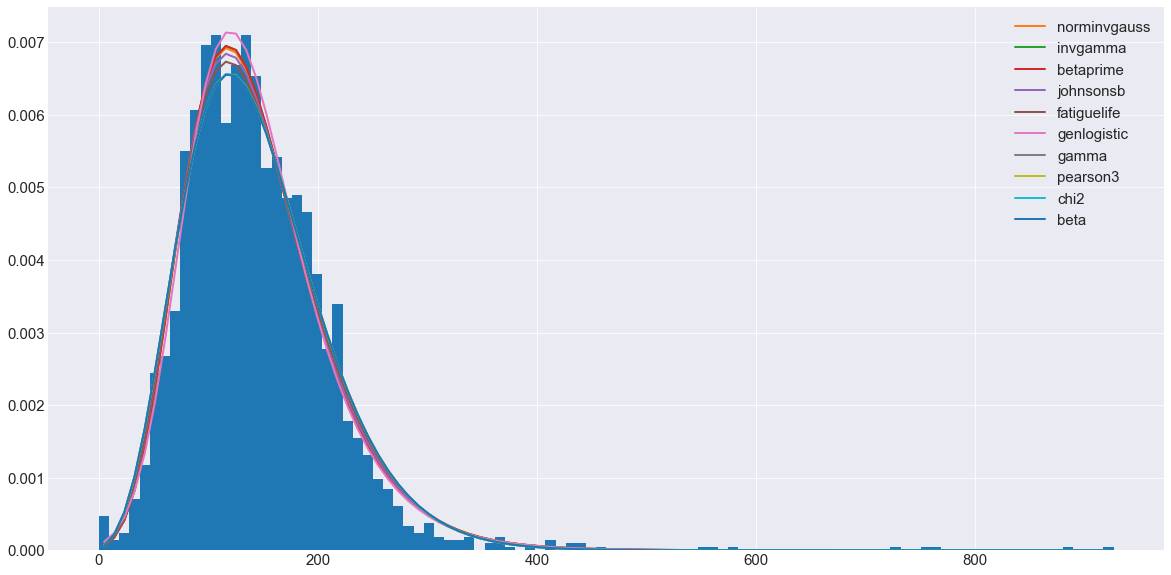

In [42]:
#Let's analyze what Distribution fits better with Revenue after a logarithmic transformation
fitter_sqr = Fitter(np.sqrt(data_small['Revenue']), distributions=stats)
fitter_sqr.fit()
fitter_sqr.summary(Nbest=10, plot=True)
fitter_sqr.get_best(method='sumsquare_error')

In [48]:
fitter.get_best(method='sumsquare_error')

{'norminvgauss': (12.950464878750978,
  10.848421324107541,
  -0.6789439577064692,
  94.51639112512959)}

Let's see how the target variable evolute across a period of time. For example, it could be a Year, Month or even a Day. We can see as long as the time goes by, it is being more and more right asymetric.

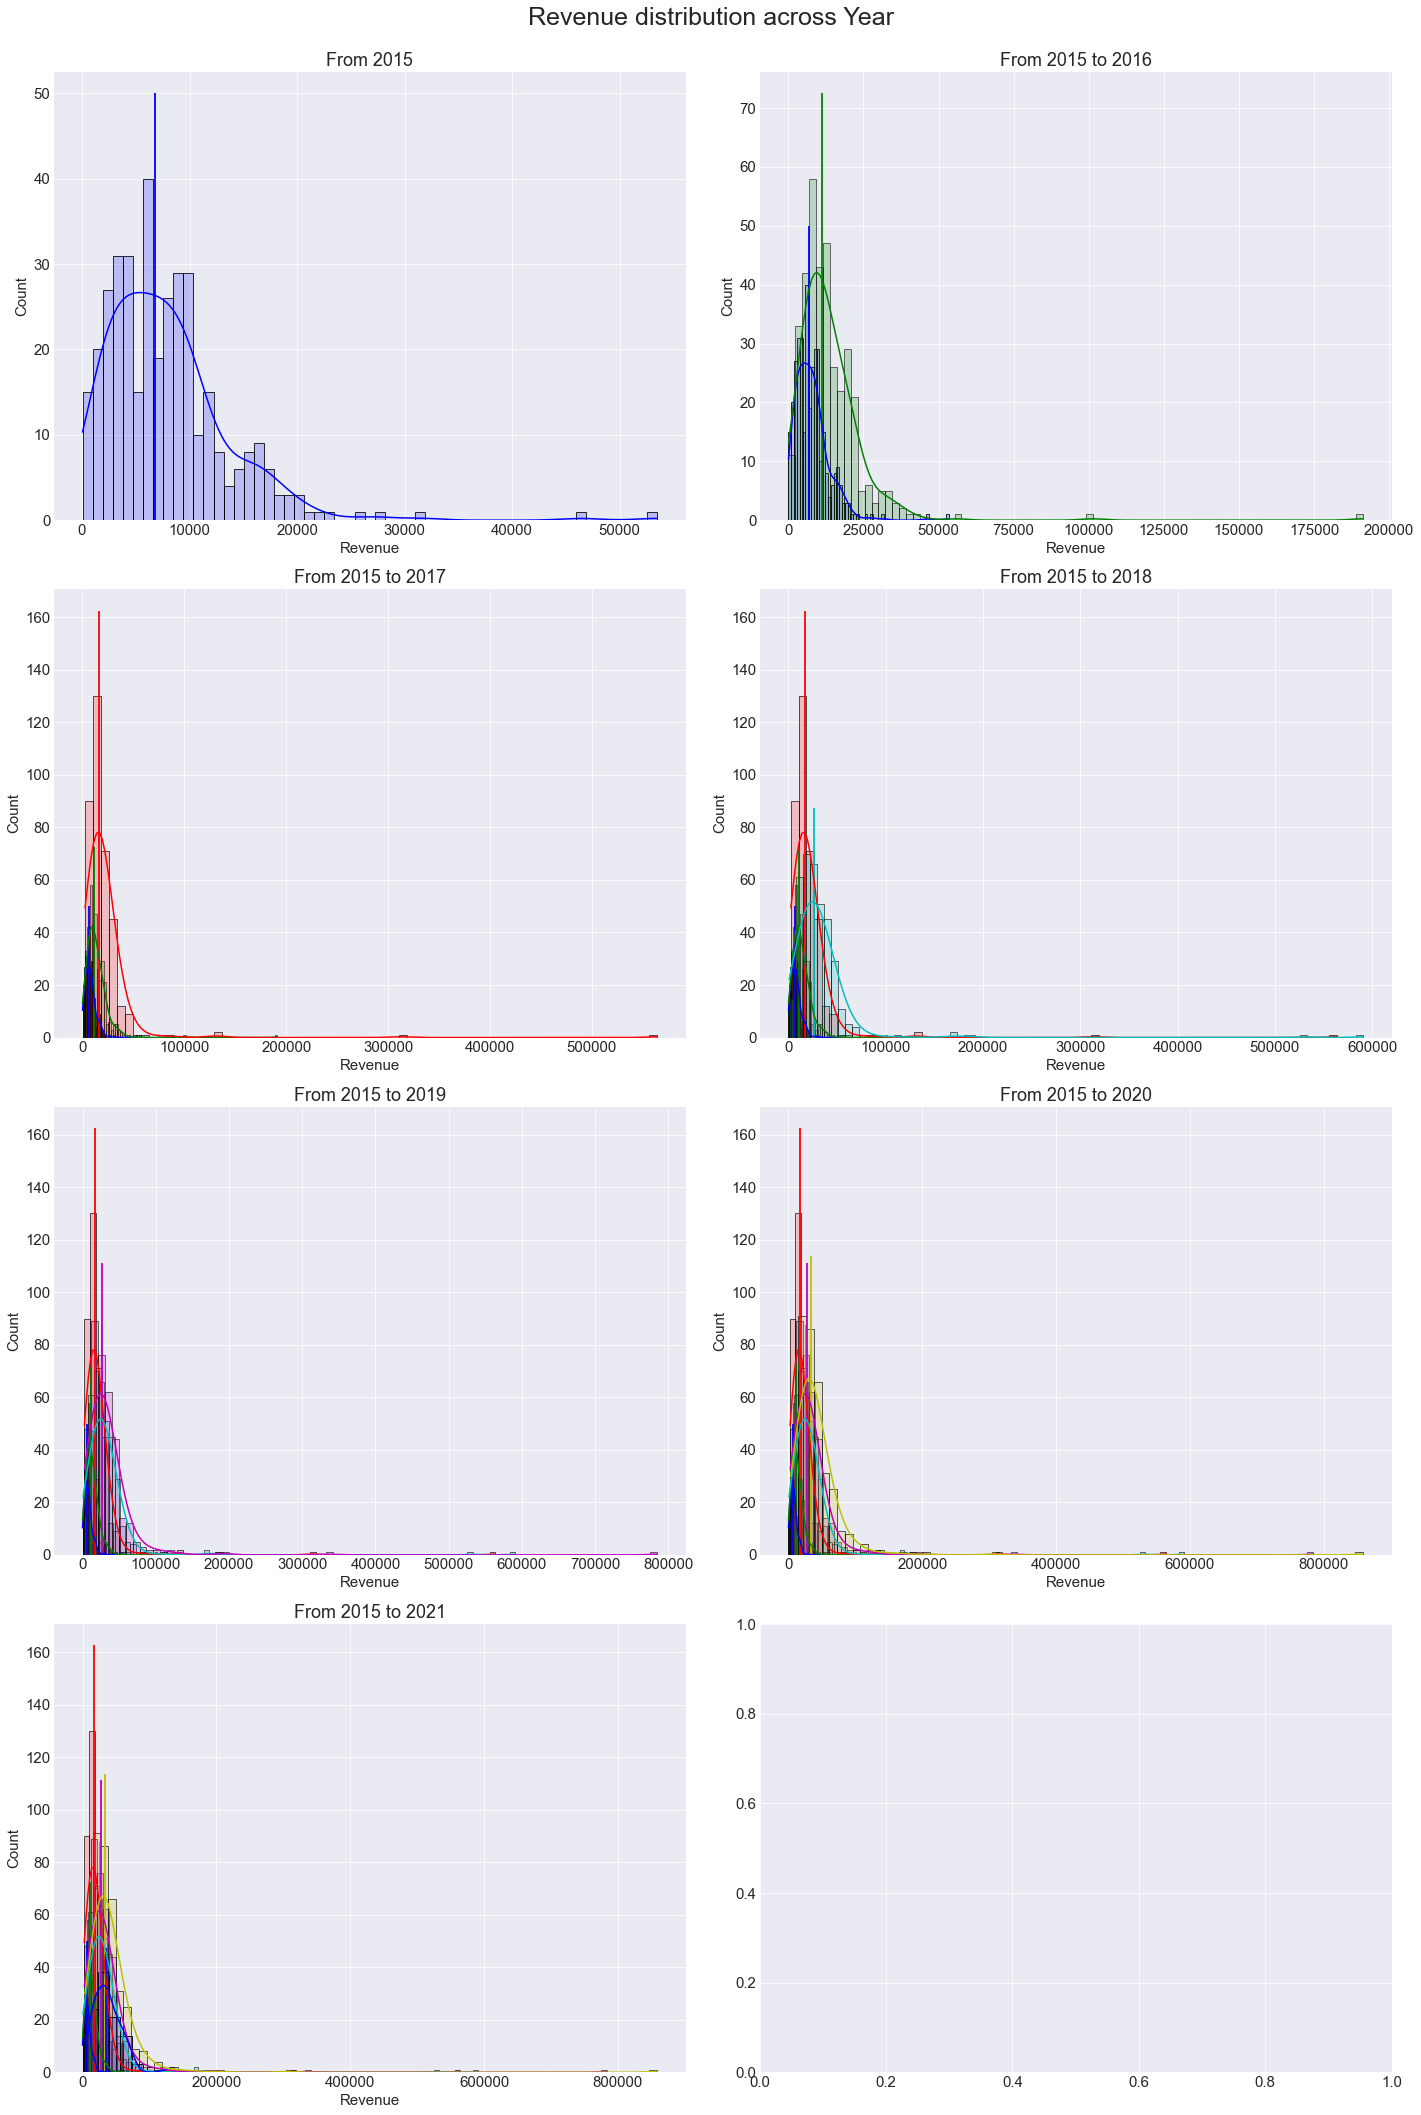

In [109]:
draw_distribution_evolution(data_small, 'Revenue', 'Year')

Now it is time for analyzing what is the distribution of the independent variables

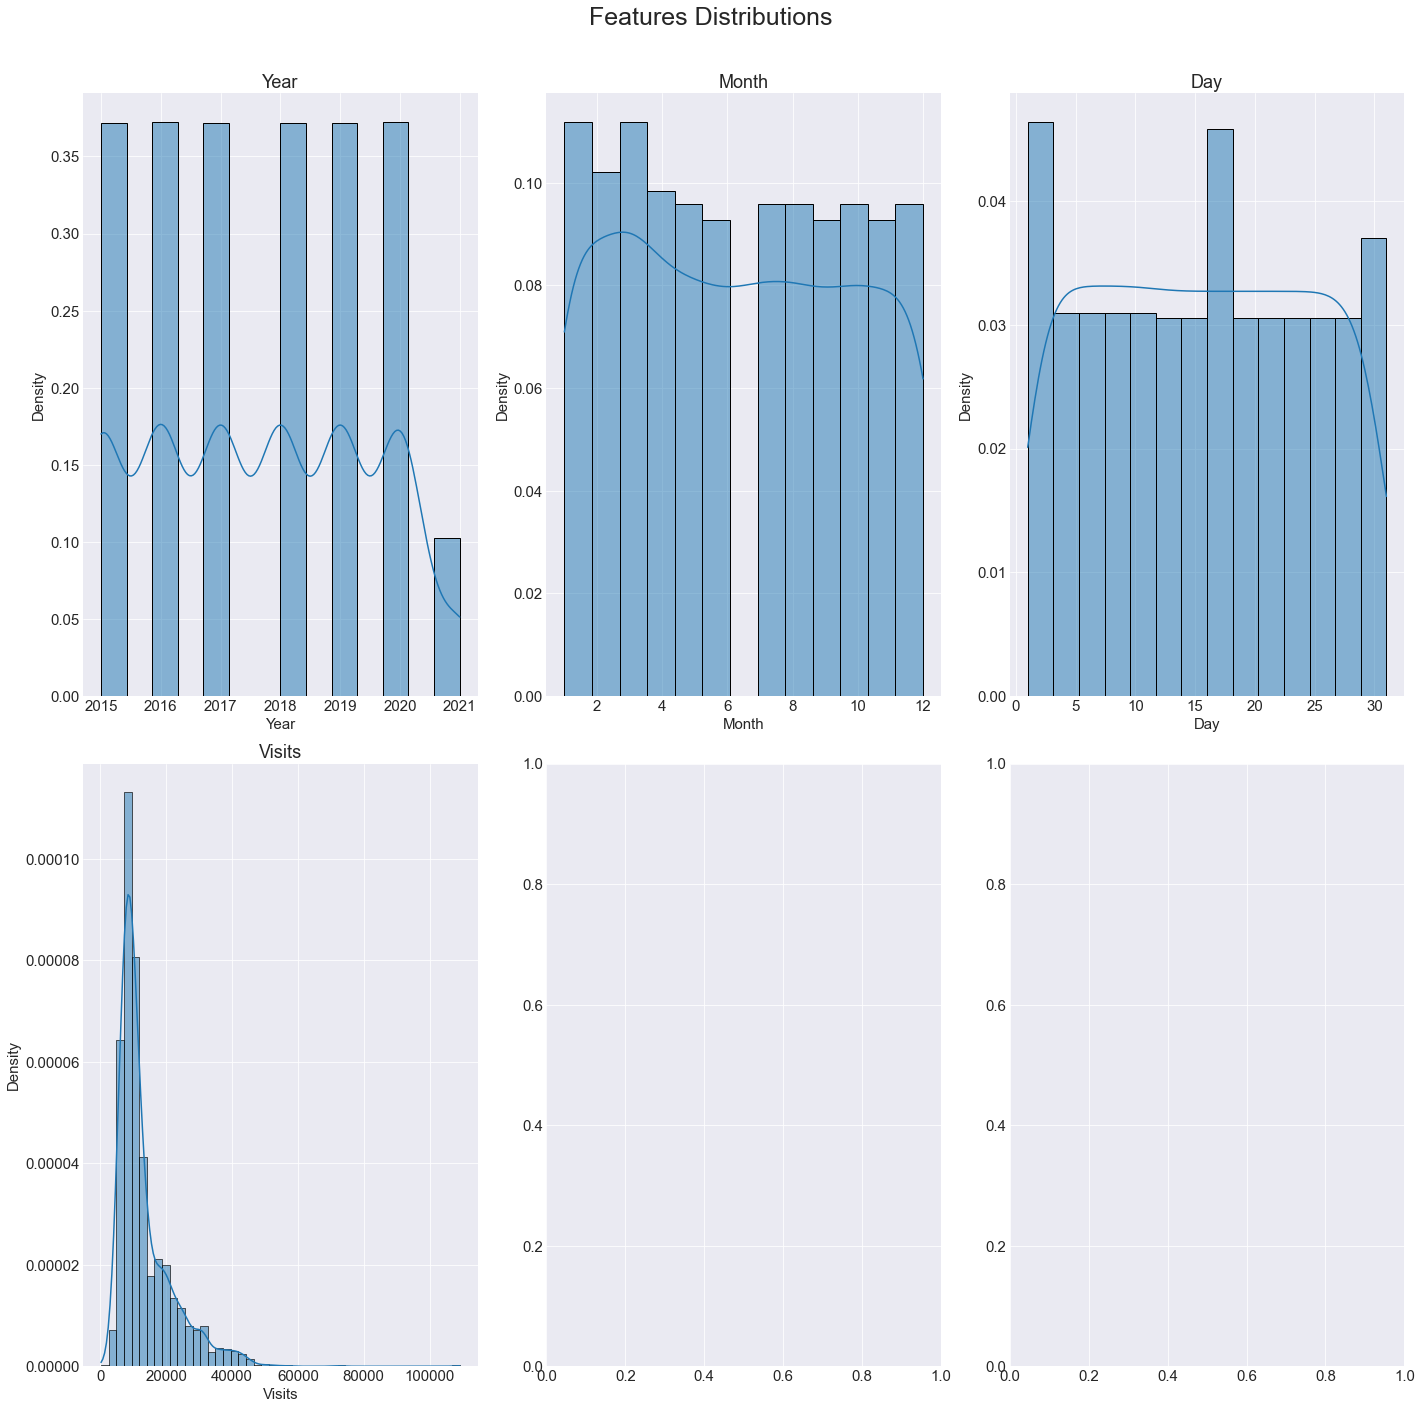

In [110]:
draw_distribution(data_small, data_small.columns[0:-1])

Let's see how the independent variables correlate with the dependant variable. As far as we can see, we cannot see a strong relationship between Year, Month and Day but we can see some correlation with Visits 

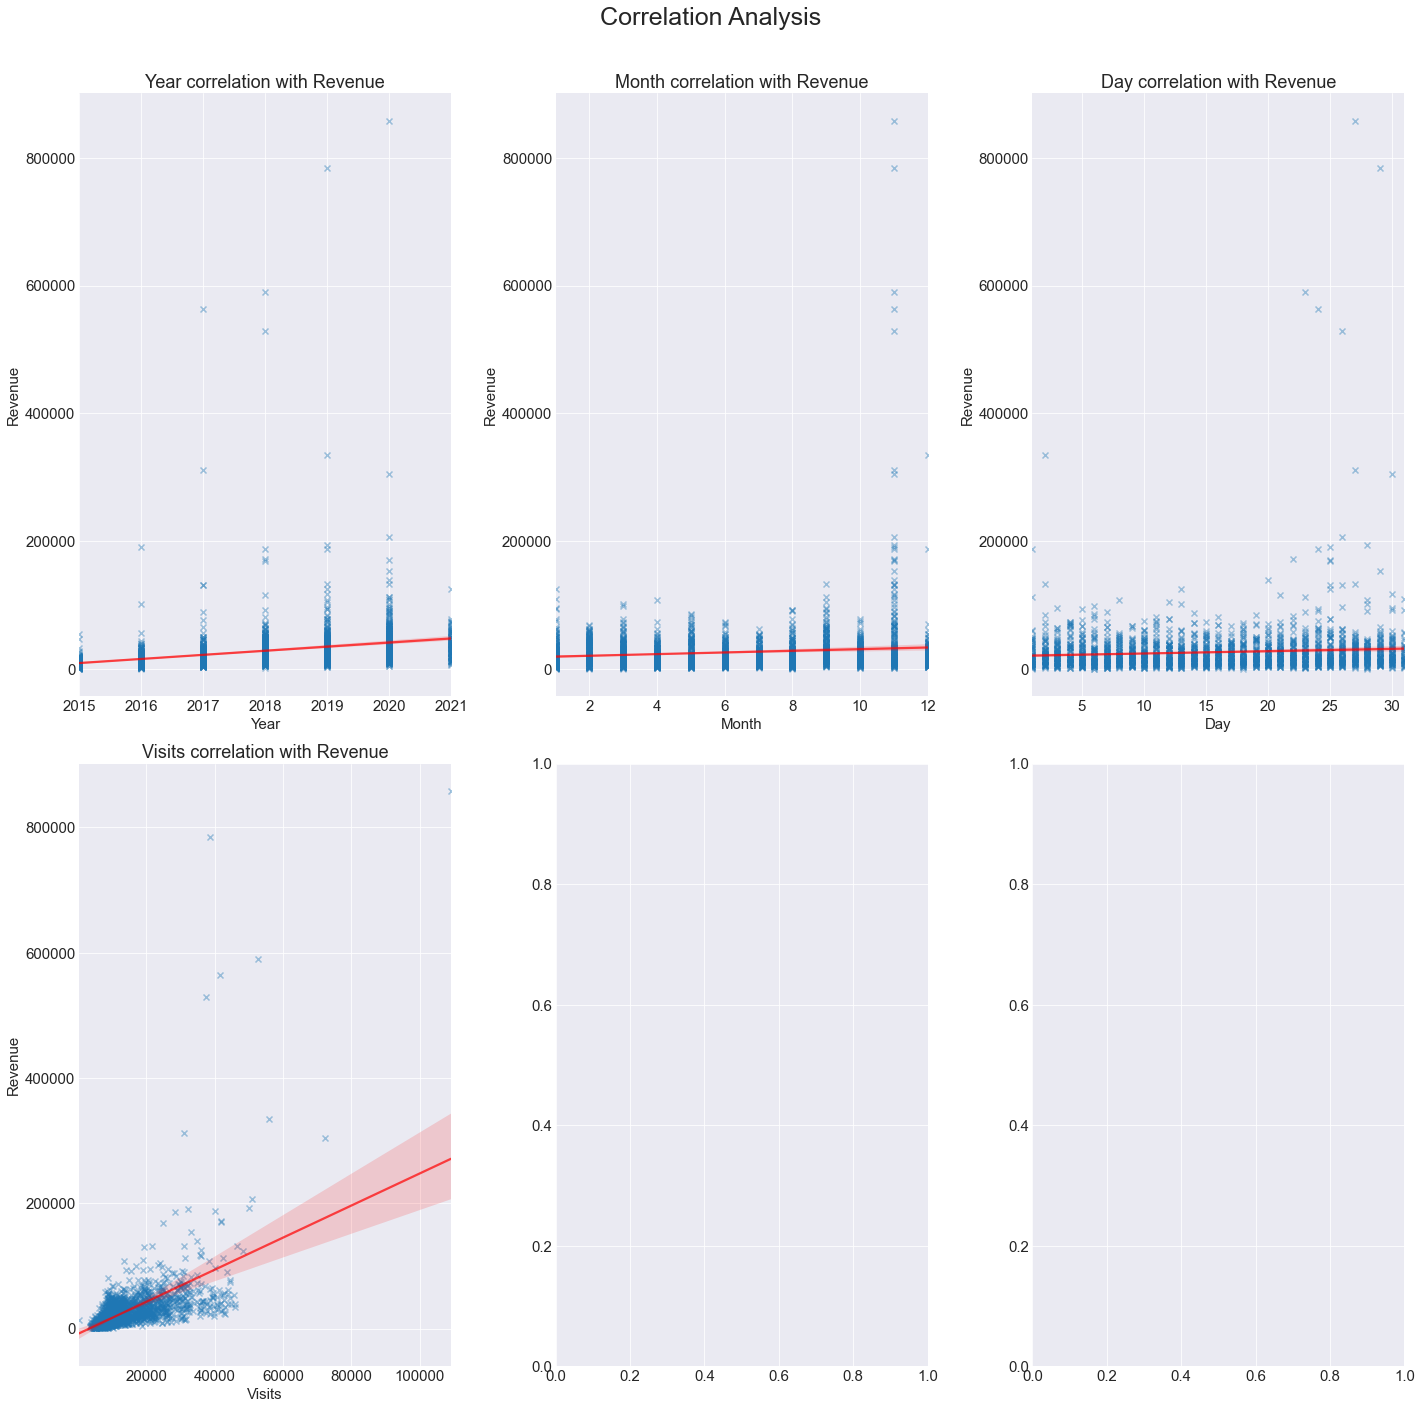

In [111]:
draw_correlation(data_small, data_small.columns[0:-1], data_small.columns[-1:])

Actually here, we can see that the correlation is quite remakable between Visits and Revenue but we can see also even stronger correlation between Year and Visits, so maybe there is collinearity between these two variable and in case we want to add them to a regression model, we should pick just one.

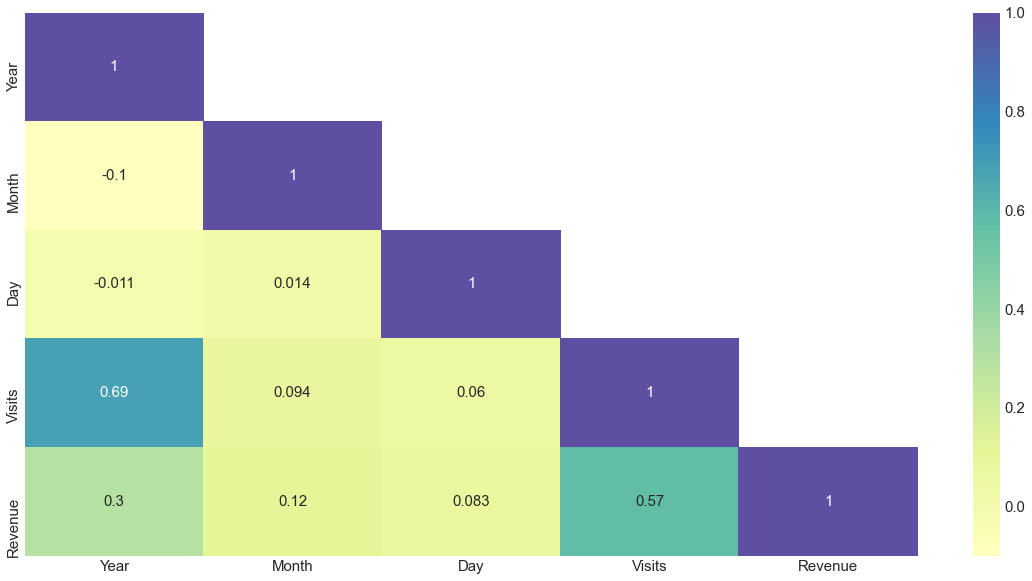

In [112]:
corr_matrix(data_small)

## Time Series

### Main Charasteristics

A Time Series could break down in four different features:
* Trend: It could go up or down acros the time
* Cyclic: Goes up or down without any specific reason
* Seasonality: Specific known pattern of one season
* Random or irregular movements: Noise size

We have two type of break down:
* Additive: yt = Tt + St + Ct + R
* Multiplicative = yt = Tt × St × Ct × R

### Aditive or Multiplative Analysis

/home/dsc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


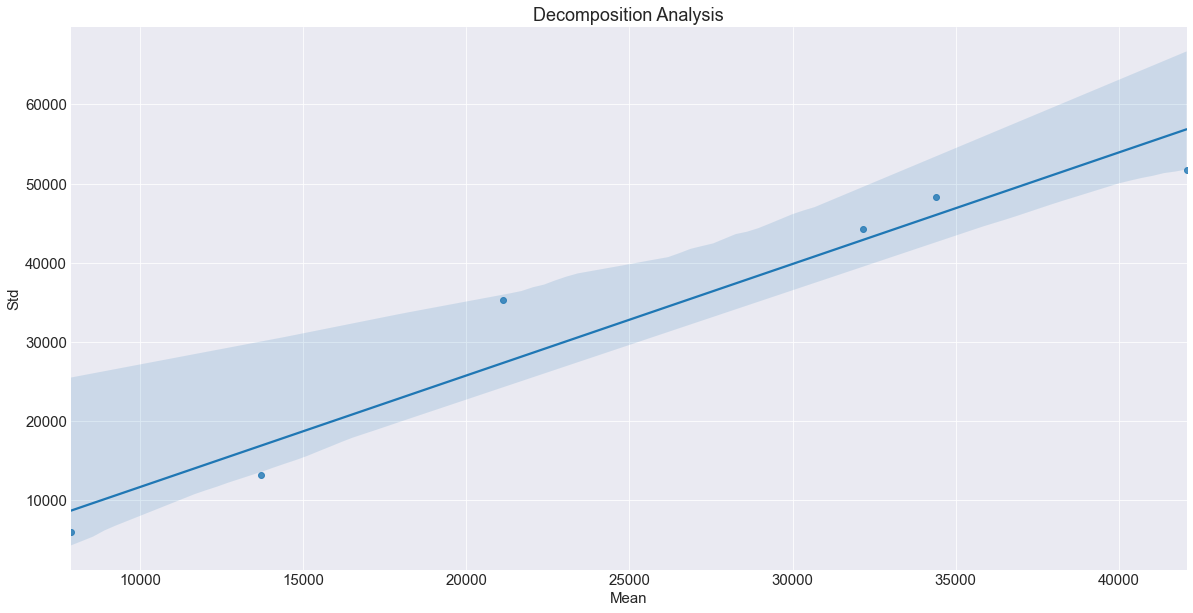

In [113]:
draw_decomposition(data_small);

It seems Multiplicative because the slope is not plain an around 45º

### Time Series Decomposition 

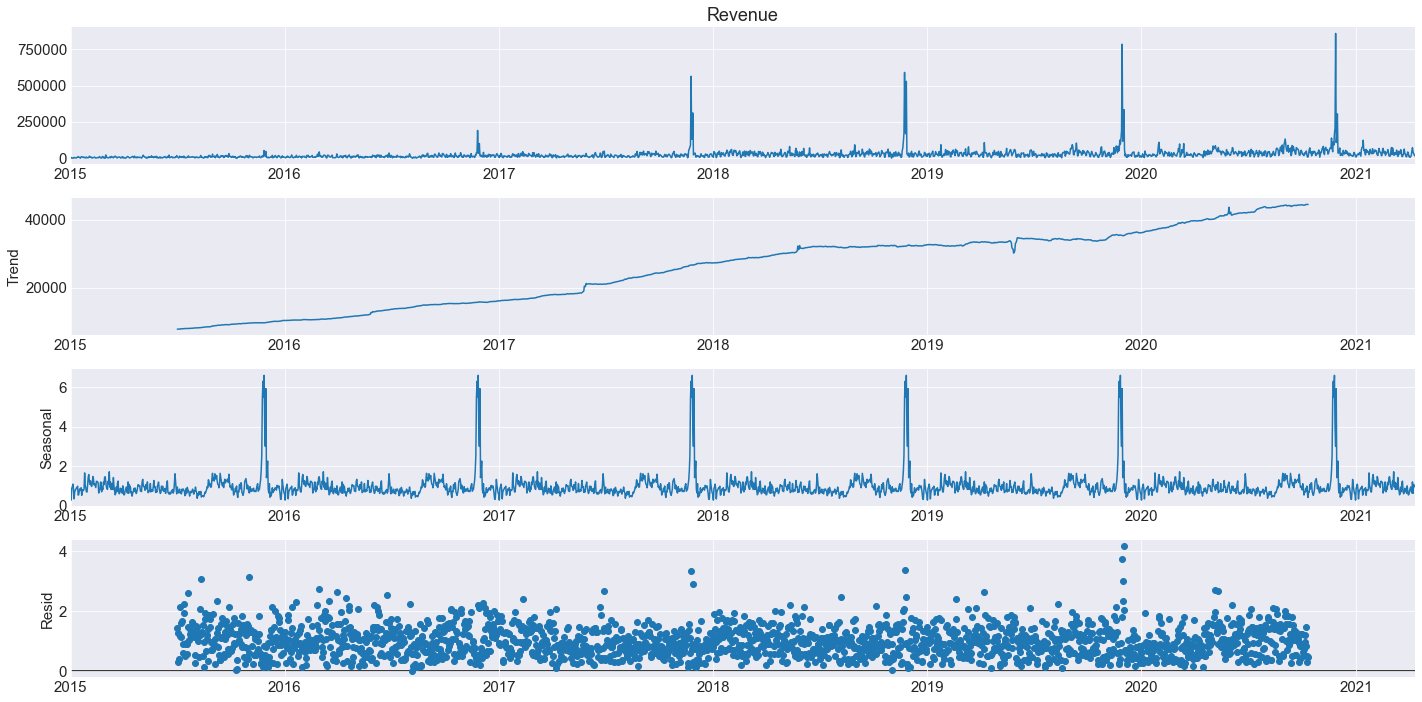

In [122]:
s_d_small = seasonal_decompose(data_small['Revenue'], period= 365, model= 'multiplicative')
s_d_small.plot();

### Stationary Analysis - Augmented Dickey-Fuller test 

In [117]:
test_adf(data_small, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -7.000968604662691 < Confidence Interval[1%]: -3.43323655938138 - Result: Stationary
T-test: -7.000968604662691 < Confidence Interval[5%]: -2.86281520927122 - Result: Stationary
T-test: -7.000968604662691 < Confidence Interval[10%]: -2.567448852970086 - Result: Stationary

P-Value: 7.32383597947612e-10 < 0.05 - Result: Stationary


As far as we can see here, it seems this Time Series is Stationary. If we check same Time Series by Week, everything changes because it seems Non Stationary.

## White Noise

OJO TAL VEZ PONER WEEK PARA DEMOSTRAR QUE NO ES ESTACIONARIO

Random Walk - Dickey-Fuller test

H0: β = 0 (This is a random walk)

H1: β < 0 (This is not a random walk)

In [574]:
test_adf(data_small, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -7.000968604662691 < Confidence Interval: -3.43323655938138 - Result: Stationary
T-test: -7.000968604662691 < Confidence Interval: -2.86281520927122 - Result: Stationary
T-test: -7.000968604662691 < Confidence Interval: -2.567448852970086 - Result: Stationary

P-Value: 7.32383597947612e-10 < 0.05 - Result: Stationary


In [575]:
test_adf(data_big, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -2.3082165125000897 > Confidence Interval: -3.4512146067362317 - Result: No Stationary
T-test: -2.3082165125000897 > Confidence Interval: -2.870730188960711 - Result: No Stationary
T-test: -2.3082165125000897 > Confidence Interval: -2.5716664849383113 - Result: No Stationary

P-Value: 0.16933167517757752 > 0.05 - Result: No Stationary


### Residual Analysis 

Residuals are White Noise, it has passed the ADF Test and therefore it is not a Random Walk and we can also see visually that the mean is 'plain'

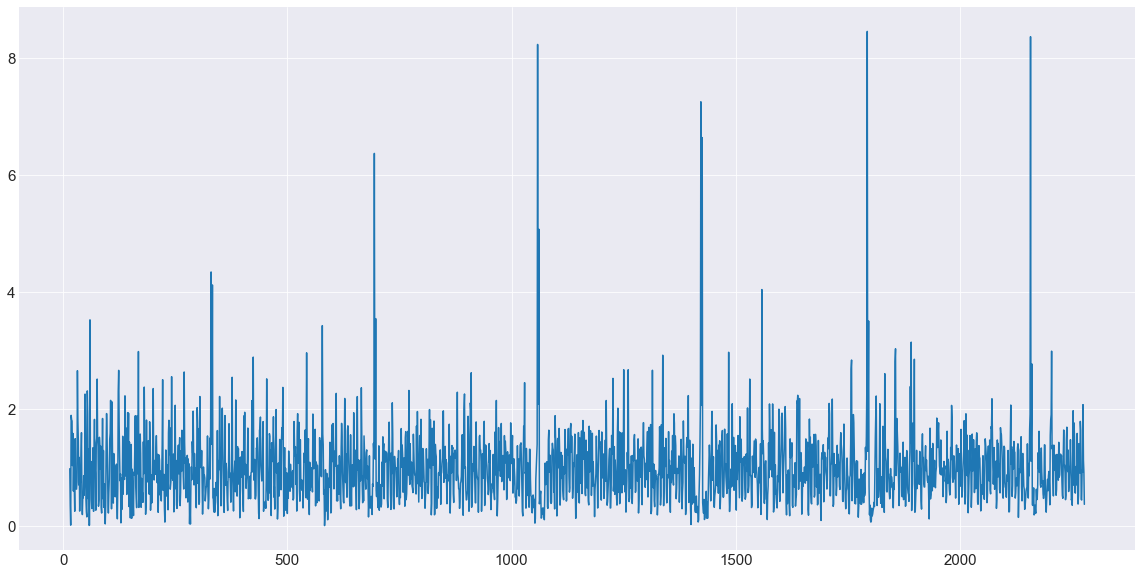

In [66]:
plt.plot(s_d_small.resid.index, s_d_small.resid)

In [67]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(s_d_small.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -13.76633709859893 < Confidence Interval[1%]: -3.4332792288216227 - Result: Stationary
T-test: -13.76633709859893 < Confidence Interval[5%]: -2.8628340503010357 - Result: Stationary
T-test: -13.76633709859893 < Confidence Interval[10%]: -2.567458884484683 - Result: Stationary

P-Value: 9.868725250454579e-26 < 0.05 - Result: Stationary


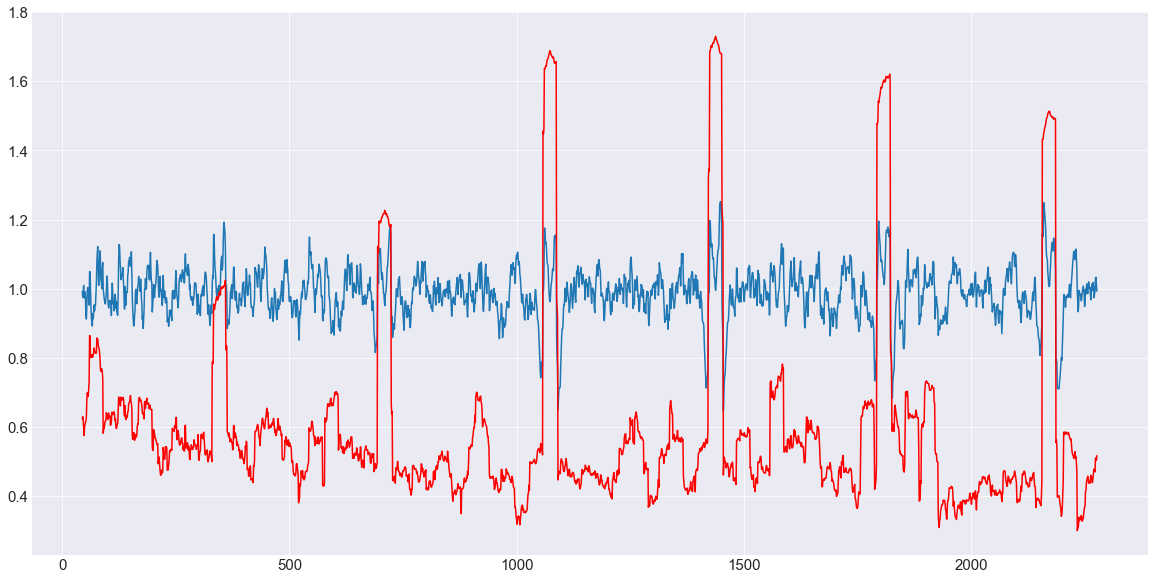

In [68]:
#Visual Analysis
#Let's calculate the rolling mean
rolling_mean = residual.rolling(window=30).mean()
rolling_mean.dropna(inplace= True)
#And the rolling std
rolling_std = residual.rolling(window=30).std()
rolling_std.dropna(inplace= True)

plt.plot(rolling_mean.index, rolling_mean)
plt.plot(rolling_std.index, rolling_std, c= 'r')

### Autocorrelation and Partial Autocorrelation

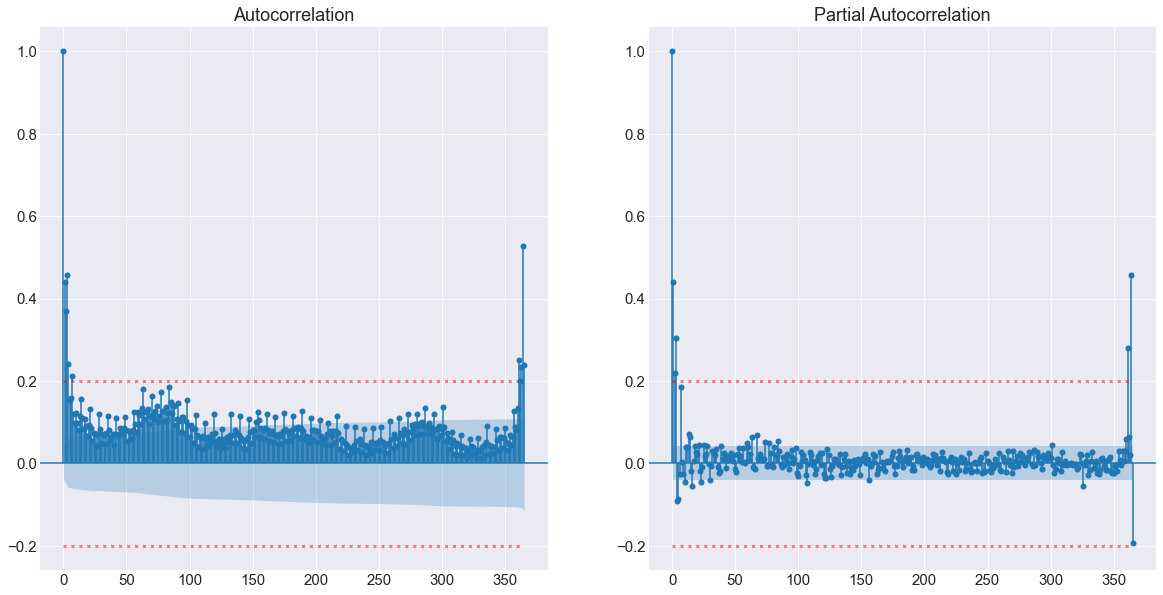

In [299]:
draw_autocorrelation(data_small, 365)

### Naïve Model 

We are going to use as baseline model, this one 'Last Naïve Value' Y(t+ 1) =Y(t)

In [123]:
column = 'Revenue'
data_s = data_small[[column]].copy()
data_s[f'{column}_predicted'] = data_s[column].shift(1)
data_s.dropna(inplace= True)

<AxesSubplot:xlabel='Date'>

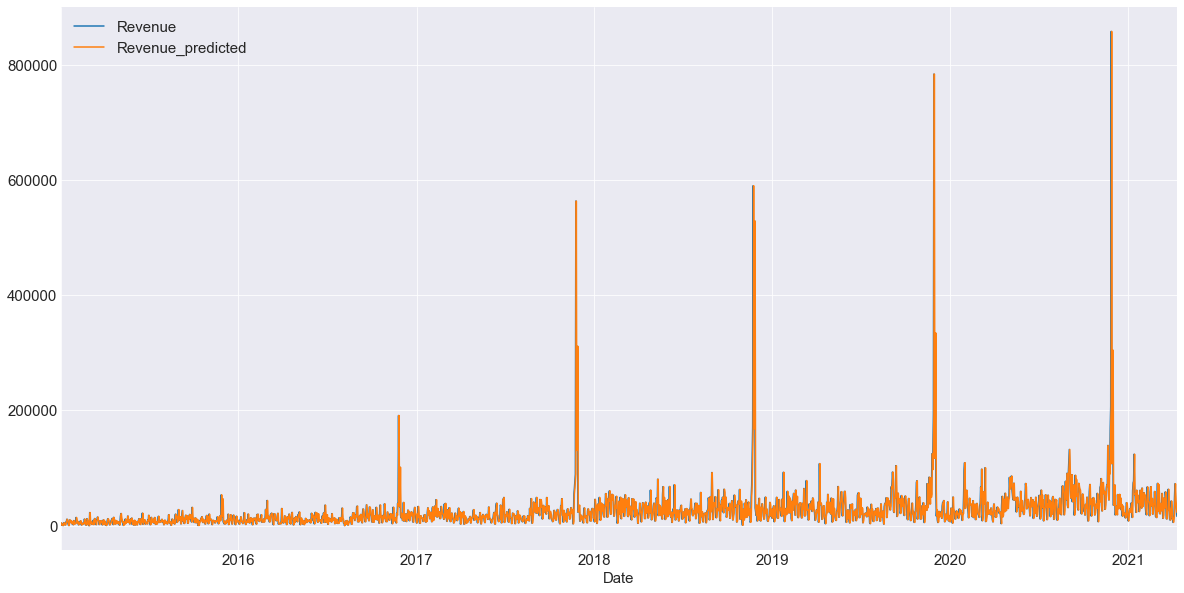

In [124]:
data_s.plot()

In [125]:
#Model RMSE
metric_rmse(data_s, 'Revenue')

40984.40412679773

In [128]:
data_full = pd.concat([data_small[[column]], data_validation[[column]]])
data_full[f'{column}_predicted'] = data_full[column].shift(1)
data_full.dropna(inplace= True)

<AxesSubplot:xlabel='Date'>

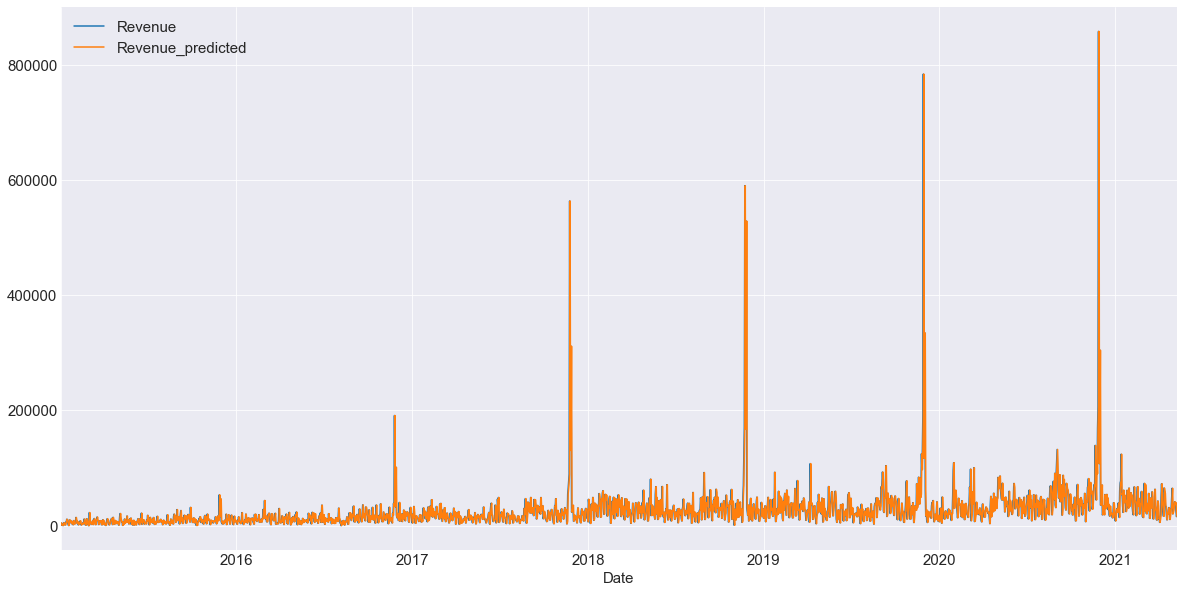

In [129]:
data_full.plot()

In [130]:
#Model Validation
#Model RMSE
metric_rmse(data_full, 'Revenue')

40772.74855191387

<AxesSubplot:xlabel='Date'>

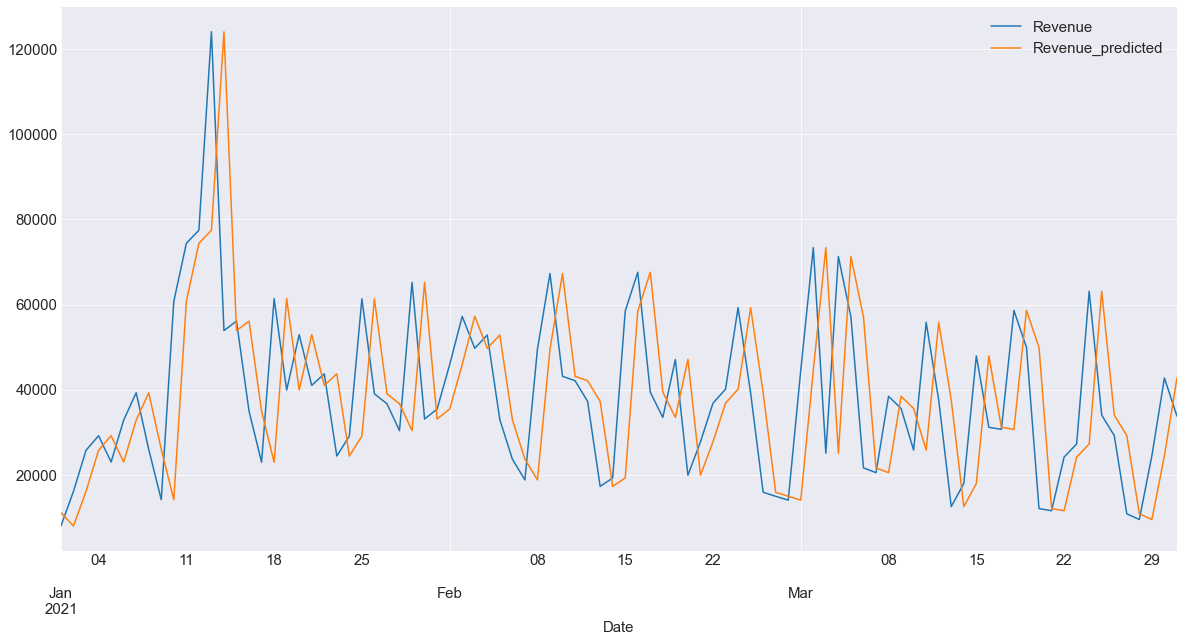

In [132]:
#Let's see it more in detail
data_full.loc['2021-01-01':'2021-03-31'].plot()

As we can see, this would be our starting point for comparing the error across the rest of the models

### SARIMAX 

We are going to apply a SARIMAX model for our Time Series. We are going to create three exogenous variables.
* Black Friday: This will consider from Black Friday to Cyber Monday. Four days in total
* Easter: This is another important period, from Monday to next Monday. Some Communities have slightly different Easter Weeks
* Covid: A new exceptional period. We are going to start with the full lockdown

In [29]:
#Let's create the new exogenous variables
data_exogenous = get_exogenous_features(data_small)

In [130]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [5, 7],
                'd': [0, 2], #Up to 1
                'q': [5, 7]}

sarima_params = {'P': [5, 7],
                 'D': [0, 2], #Up to 1
                 'Q': [5, 7],
                 'S': [7]}

trend_params = ['t'] #We has test before and this is the best option always

In [34]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 2],
                'd': [0, 2], #Up to 1
                'q': [0, 1]}

sarima_params = {'P': [0, 1],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 1],
                 'S': [2]}

trend_params = ['t'] #We has test before and this is the best option always

In [30]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous)

In [35]:
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

In [20]:
sorted(test_aic.items(), key=lambda x: x[1])

[((3, 0, 0, '-', 1, 0, 1, 7, '-', 't'), 47898.60855109147),
 ((3, 0, 0, '-', 2, 0, 1, 7, '-', 't'), 47899.75870881471),
 ((3, 0, 0, '-', 1, 0, 2, 7, '-', 't'), 47900.13801876921),
 ((3, 0, 0, '-', 1, 0, 3, 7, '-', 't'), 47902.40845644389),
 ((3, 0, 0, '-', 2, 0, 2, 7, '-', 't'), 47902.85803318481),
 ((3, 0, 1, '-', 1, 0, 1, 7, '-', 't'), 47903.52229778633),
 ((3, 0, 0, '-', 3, 0, 2, 7, '-', 't'), 47903.723548246824),
 ((3, 0, 0, '-', 2, 0, 3, 7, '-', 't'), 47904.485667301924),
 ((2, 0, 3, '-', 1, 0, 1, 7, '-', 't'), 47904.873850624266),
 ((3, 0, 0, '-', 3, 0, 1, 7, '-', 't'), 47907.800261122626),
 ((3, 0, 0, '-', 3, 0, 3, 7, '-', 't'), 47907.87278512935),
 ((3, 0, 1, '-', 1, 0, 2, 7, '-', 't'), 47907.95030234906),
 ((1, 0, 3, '-', 1, 0, 1, 7, '-', 't'), 47908.593753361754),
 ((1, 0, 3, '-', 2, 0, 1, 7, '-', 't'), 47911.22732210987),
 ((1, 0, 3, '-', 1, 0, 2, 7, '-', 't'), 47912.146571199184),
 ((3, 0, 1, '-', 1, 0, 3, 7, '-', 't'), 47913.88543416833),
 ((3, 0, 3, '-', 0, 1, 1, 7, '-', 

In [129]:
sorted(test_aic.items(), key=lambda x: x[1])

[((4, 0, 4, '-', 4, 0, 4, 7, '-', 't'), 47982.72285554057),
 ((4, 0, 4, '-', 4, 1, 4, 7, '-', 't'), 48015.33809054071),
 ((4, 1, 4, '-', 4, 0, 4, 7, '-', 't'), 48034.47456622115),
 ((4, 1, 4, '-', 4, 1, 4, 7, '-', 't'), 48306.6430314474)]

In [132]:
sorted(test_aic.items(), key=lambda x: x[1])

[((6, 0, 5, '-', 5, 0, 5, 7, '-', 't'), 47932.131057390296),
 ((5, 0, 6, '-', 5, 0, 6, 7, '-', 't'), 47934.27837766443),
 ((6, 0, 5, '-', 6, 0, 5, 7, '-', 't'), 47936.178517190405),
 ((5, 0, 6, '-', 6, 0, 5, 7, '-', 't'), 47936.5629532279),
 ((6, 0, 5, '-', 5, 0, 6, 7, '-', 't'), 47938.67609038649),
 ((6, 0, 6, '-', 5, 0, 6, 7, '-', 't'), 47939.576789980885),
 ((6, 0, 6, '-', 6, 0, 6, 7, '-', 't'), 47940.09103830449),
 ((6, 0, 6, '-', 5, 0, 5, 7, '-', 't'), 47941.731750452425),
 ((6, 0, 6, '-', 6, 0, 5, 7, '-', 't'), 47941.94278978875),
 ((5, 0, 5, '-', 5, 0, 6, 7, '-', 't'), 47945.21216202574),
 ((5, 0, 6, '-', 5, 0, 5, 7, '-', 't'), 47945.30127016295),
 ((5, 0, 6, '-', 6, 0, 6, 7, '-', 't'), 47950.71264493723),
 ((6, 0, 5, '-', 6, 0, 6, 7, '-', 't'), 47954.29555960231),
 ((5, 0, 5, '-', 6, 0, 5, 7, '-', 't'), 47956.336323259784),
 ((6, 0, 6, '-', 5, 1, 5, 7, '-', 't'), 47959.46935074453),
 ((6, 0, 6, '-', 5, 1, 6, 7, '-', 't'), 47960.85814227002),
 ((6, 0, 6, '-', 6, 1, 5, 7, '-', 't

In [49]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (3, 0, 0), seasonal_order= (1, 0, 1, 7), trend= 't')
result = model.fit()

In [50]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01       48.261495
2015-01-02     1329.829374
2015-01-03     2070.849849
2015-01-04     1012.778703
2015-01-05     1511.628873
                  ...     
2020-09-14    48638.057794
2020-09-15    52858.167422
2020-09-16    45358.117886
2020-09-17    65179.810754
2020-09-18    50782.665643
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

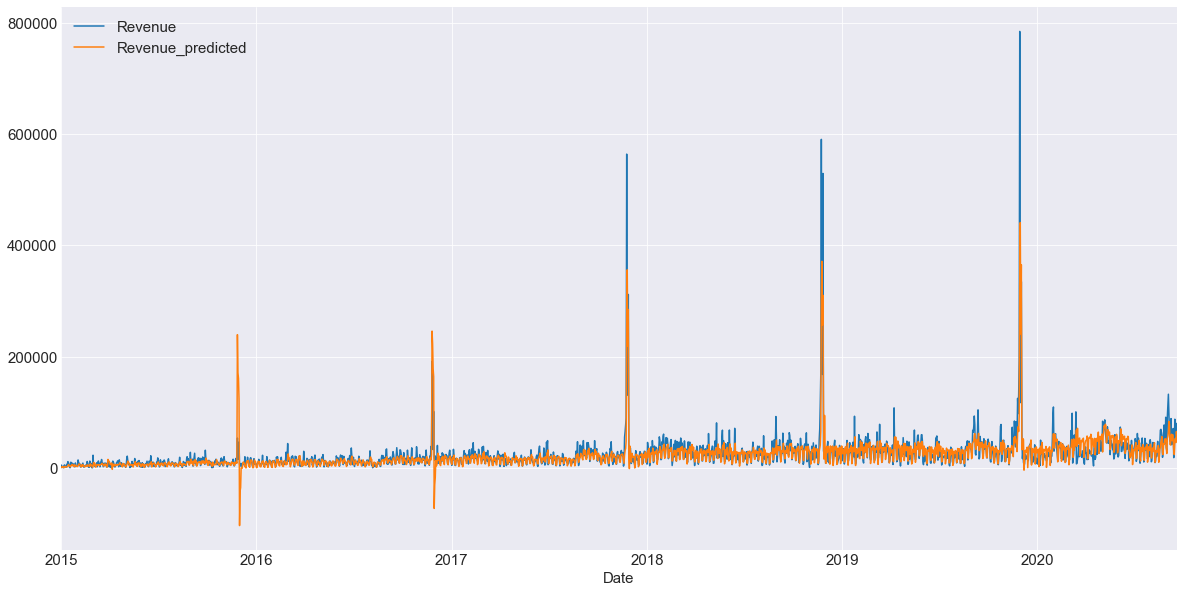

In [51]:
data_train_predict = pd.concat([y_train, mean_forecast], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

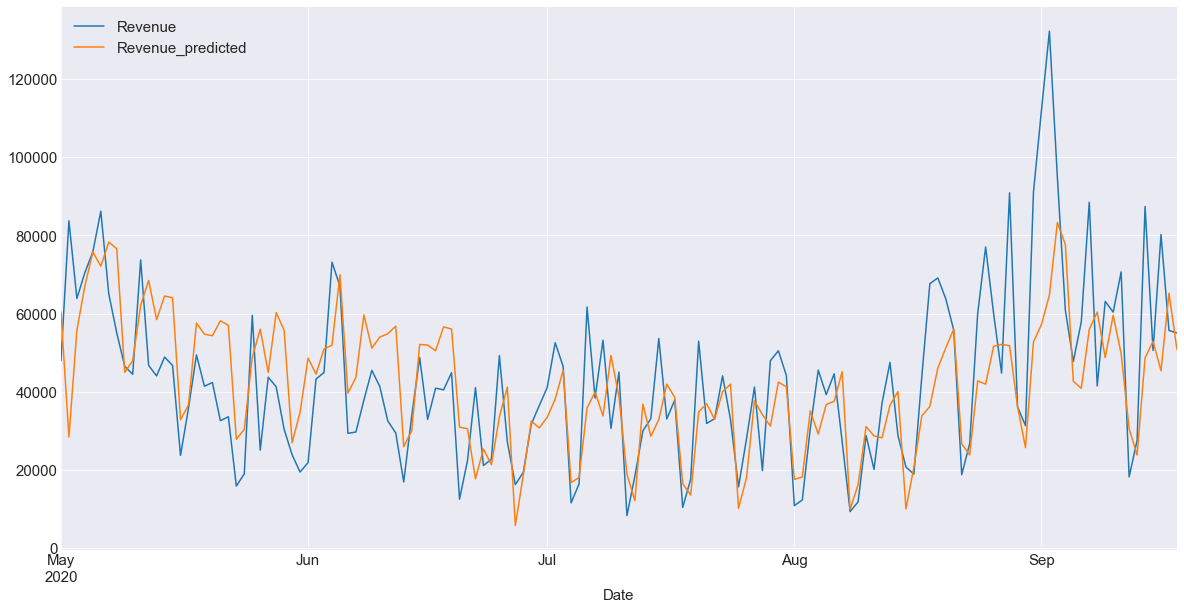

In [52]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [53]:
metric_rmse(data_train_predict, 'Revenue')

22941.71458906555

Residuals
count  2.088000e+03
mean  -3.827611e+07
std    1.000648e+09
min   -3.473672e+10
25%   -6.484333e+03
50%    3.172056e+02
75%    6.002982e+03
max    8.763761e+04

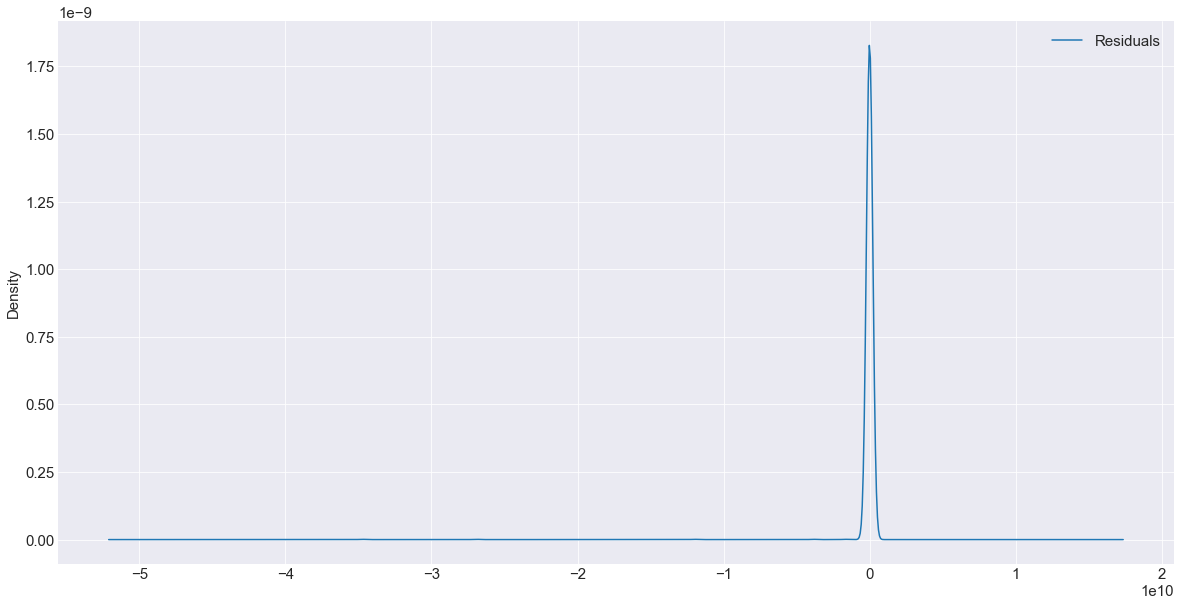

In [74]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

In [300]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

NameError: name 'result' is not defined

In [56]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    28934.311255
2020-09-20    26444.037858
2020-09-21    45782.924854
2020-09-22    41327.546210
2020-09-23    42715.955671
                  ...     
2021-05-05    43752.538070
2021-05-06    45073.630018
2021-05-07    46842.039874
2021-05-08    21713.326417
2021-05-09    24541.436958
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

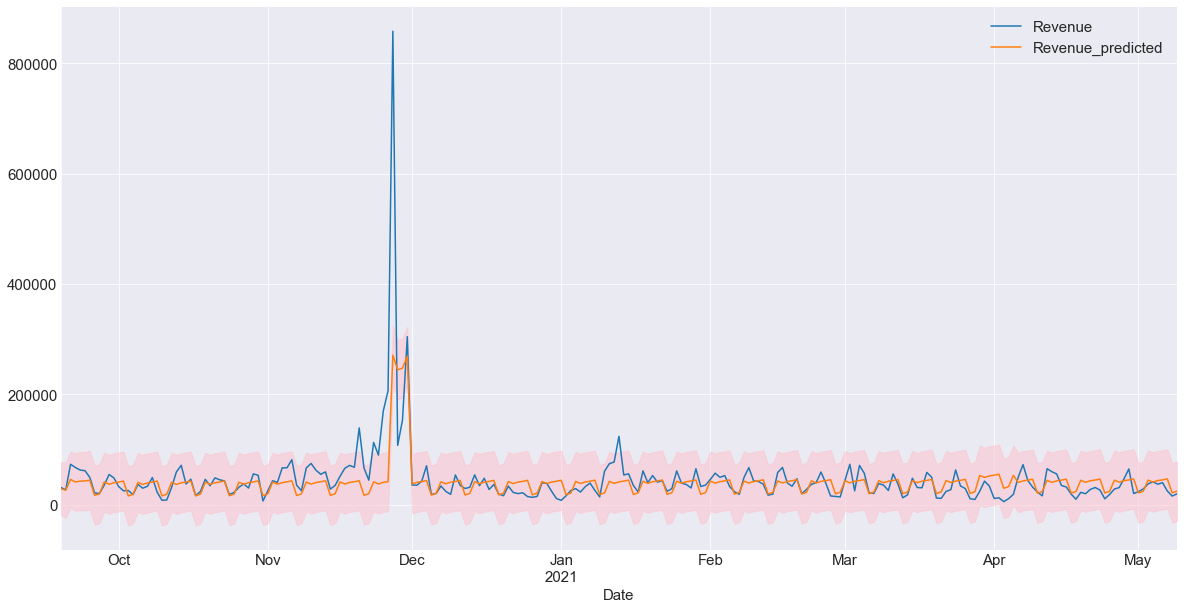

In [57]:
#Let's see how this model predict
data_test_predict = pd.concat([y_test, mean_forecast], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [58]:
metric_rmse(data_test_predict, 'Revenue')

46211.325117016946

### Log Time Series Analysis

In [59]:
data_log = data_small.copy()
data_log['Revenue'] = np.log1p(data_log['Revenue'])

/home/dsc/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


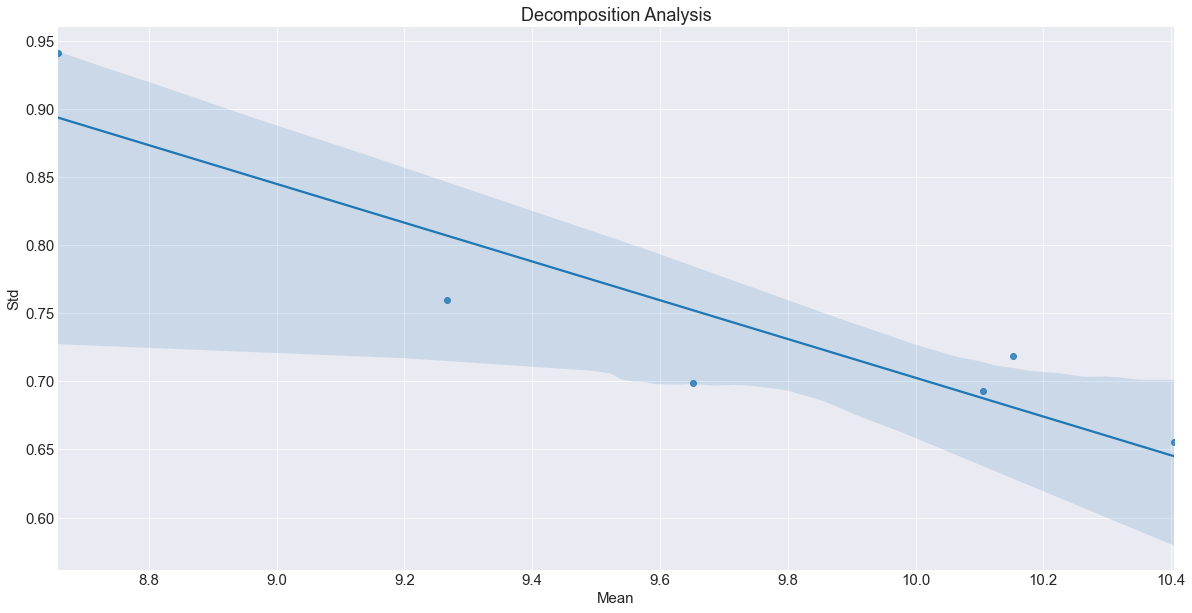

In [34]:
draw_decomposition(data_log);

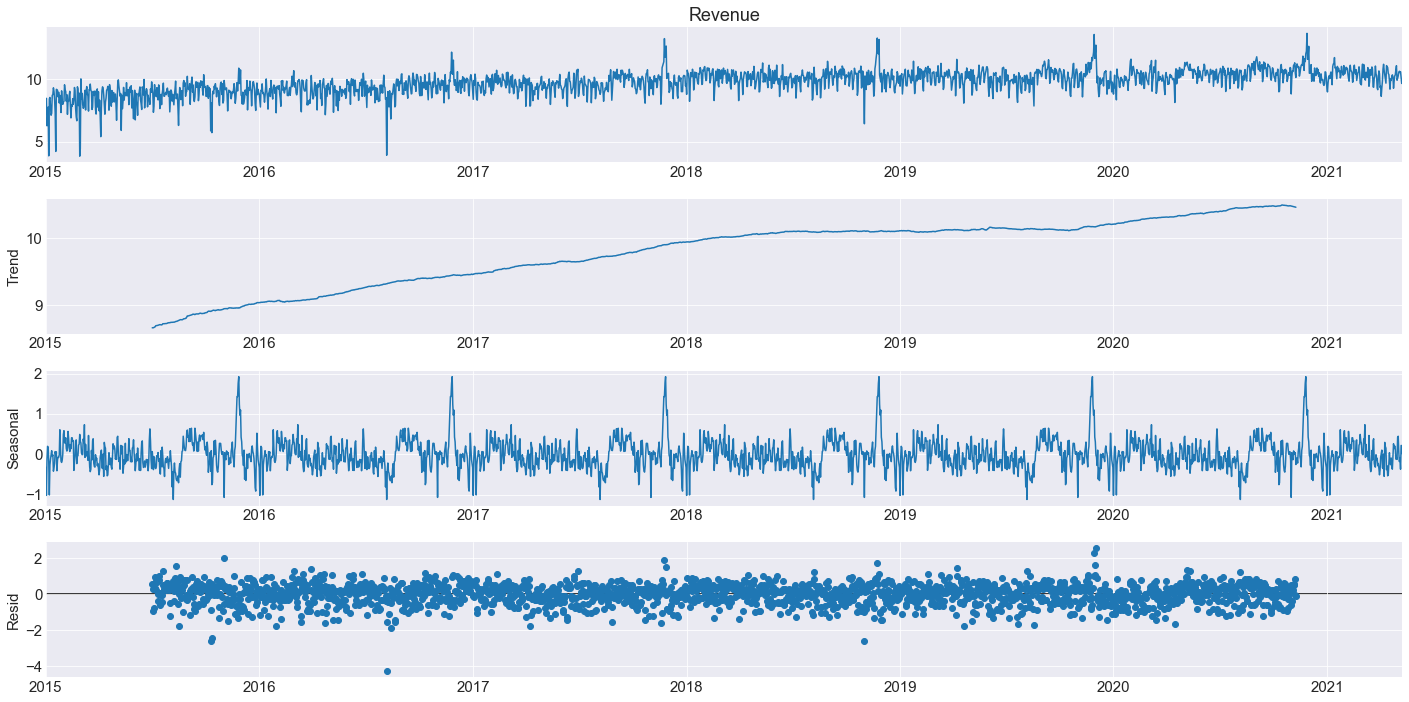

In [64]:
#A transformed data into Log makes Additivie model always
s_d_log = seasonal_decompose(data_log['Revenue'], period= 365, model= 'additive')
s_d_log.plot();

In [36]:
test_adf(data_log, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -3.2629643223107463 > Confidence Interval[1%]: -3.4332403869849286 - Result: No Stationary
T-test: -3.2629643223107463 < Confidence Interval[5%]: -2.862816899390905 - Result: Stationary
T-test: -3.2629643223107463 < Confidence Interval[10%]: -2.567449752837351 - Result: Stationary

P-Value: 0.01661734589099667 < 0.05 - Result: Stationary


In [301]:
draw_autocorrelation(data_log, 30)

NameError: name 'data_log' is not defined

### Log Arima 

In [60]:
#Let's create the new exogenous variables
data_exogenous_log = get_exogenous_features(data_log)

In [133]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 4],
                'd': [0, 2], #Up to 1
                'q': [0, 4]}

sarima_params = {'P': [0, 4],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 4],
                 'S': [7]}

#t = ['n','c','t','ct']
trend_params = ['c'] #We has test before and this is the best option always

In [134]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous_log)

In [135]:
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

In [114]:
sorted(test_aic.items(), key=lambda x: x[1])

[((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 3320.406516444623),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 3323.3109745842253),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 3332.6859418947224),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 3332.8885650713582),
 ((1, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 3340.8814806513988),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'n'), 3342.179794025067),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'n'), 3346.1361716474744),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 3349.3833108654208),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 3355.038904194308),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 3383.677481856423),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'c'), 3390.0343341570524),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'c'), 3391.442454137199),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 3392.2567977852486),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 3394.0939876683497),
 ((0, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 3402.0663770164756),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 3406.341309546855),
 ((1, 0, 1, '-', 1, 0, 1, 7, '

In [136]:
sorted(test_aic.items(), key=lambda x: x[1])

[((2, 0, 3, '-', 3, 1, 1, 7, '-', 'c'), 3307.013646056871),
 ((2, 0, 3, '-', 2, 1, 1, 7, '-', 'c'), 3307.1207378884264),
 ((2, 0, 3, '-', 1, 1, 1, 7, '-', 'c'), 3309.531712114427),
 ((1, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3309.9852863338347),
 ((2, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3310.6594794164107),
 ((2, 0, 3, '-', 0, 1, 1, 7, '-', 'c'), 3311.984724136573),
 ((2, 0, 3, '-', 0, 1, 3, 7, '-', 'c'), 3312.7266018399405),
 ((1, 0, 2, '-', 1, 1, 2, 7, '-', 'c'), 3313.170741730653),
 ((2, 0, 2, '-', 1, 1, 1, 7, '-', 'c'), 3315.144119724566),
 ((2, 0, 2, '-', 0, 1, 2, 7, '-', 'c'), 3315.7912641921644),
 ((3, 0, 3, '-', 0, 1, 2, 7, '-', 'c'), 3316.1640697885414),
 ((2, 0, 2, '-', 2, 1, 1, 7, '-', 'c'), 3316.2674482811303),
 ((2, 0, 2, '-', 0, 1, 3, 7, '-', 'c'), 3316.4382111544846),
 ((2, 0, 2, '-', 0, 1, 1, 7, '-', 'c'), 3316.9075504999464),
 ((2, 0, 3, '-', 2, 1, 3, 7, '-', 'c'), 3317.0766373323645),
 ((3, 0, 2, '-', 0, 1, 2, 7, '-', 'c'), 3317.0780412184267),
 ((3, 0, 3, '-', 0, 1, 3, 7, 

In [62]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (3, 0, 0), seasonal_order= (1, 0, 1, 7), trend= 'c')
result = model.fit()

In [63]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01    -0.002295
2015-01-02     8.065705
2015-01-03     8.392369
2015-01-04     6.639420
2015-01-05     7.079218
                ...    
2020-09-14    10.911270
2020-09-15    11.043483
2020-09-16    11.031568
2020-09-17    11.146505
2020-09-18    10.930929
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

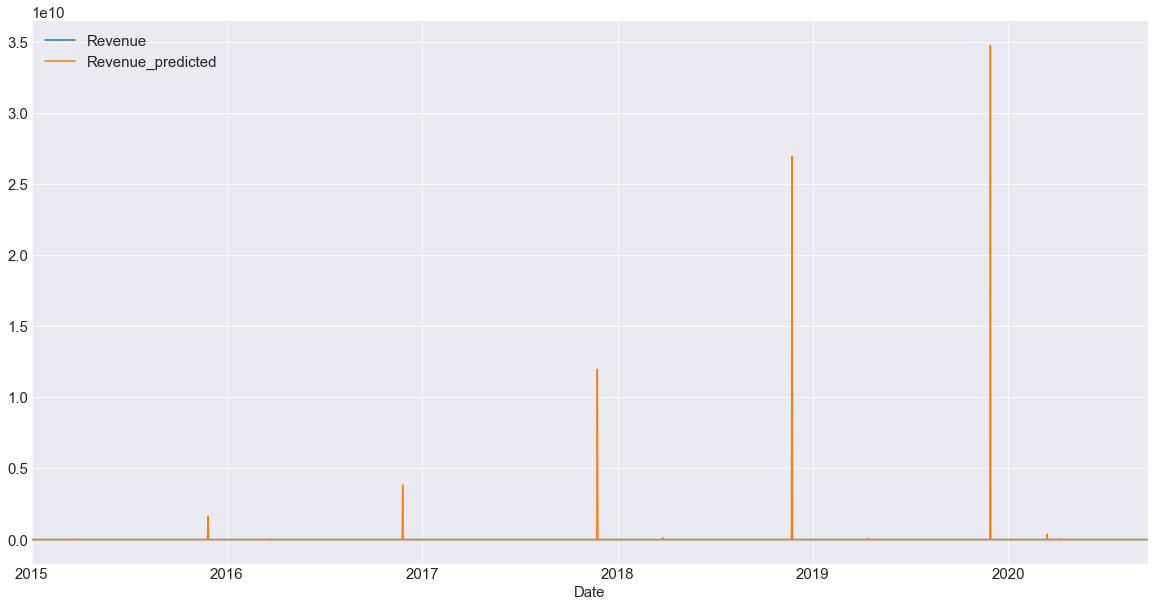

In [64]:
data_train_predict = pd.concat([np.expm1(y_train), np.expm1(mean_forecast)], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

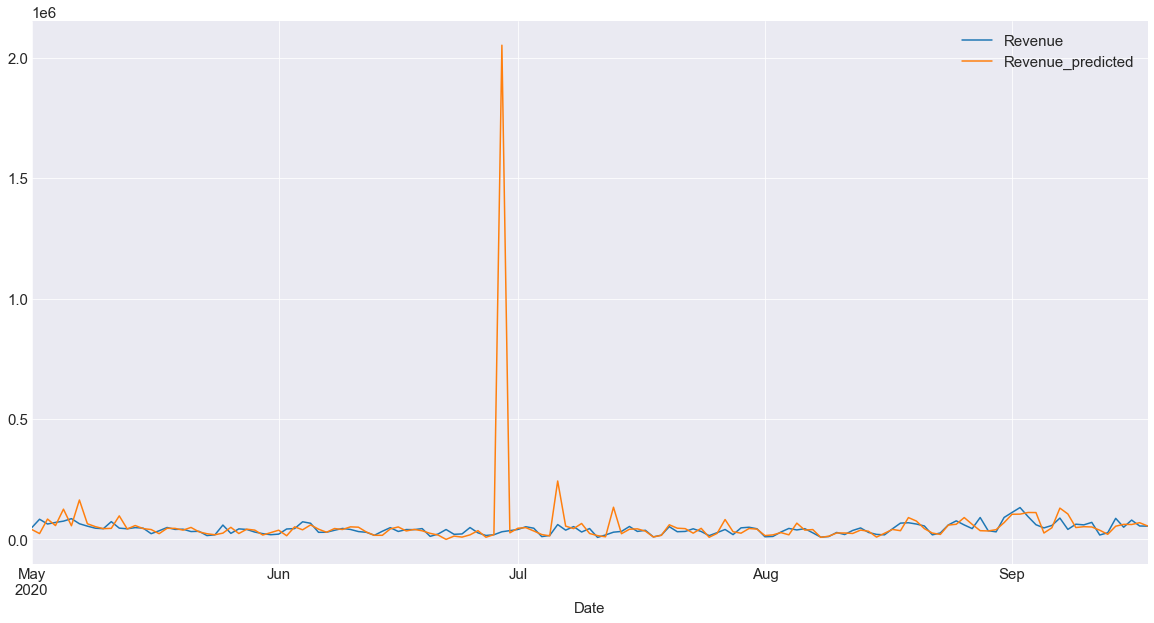

In [65]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [66]:
metric_rmse(data_train_predict, 'Revenue')

1001140277.9398998

Residuals
count  2.088000e+03
mean  -3.827611e+07
std    1.000648e+09
min   -3.473672e+10
25%   -6.484333e+03
50%    3.172056e+02
75%    6.002982e+03
max    8.763761e+04

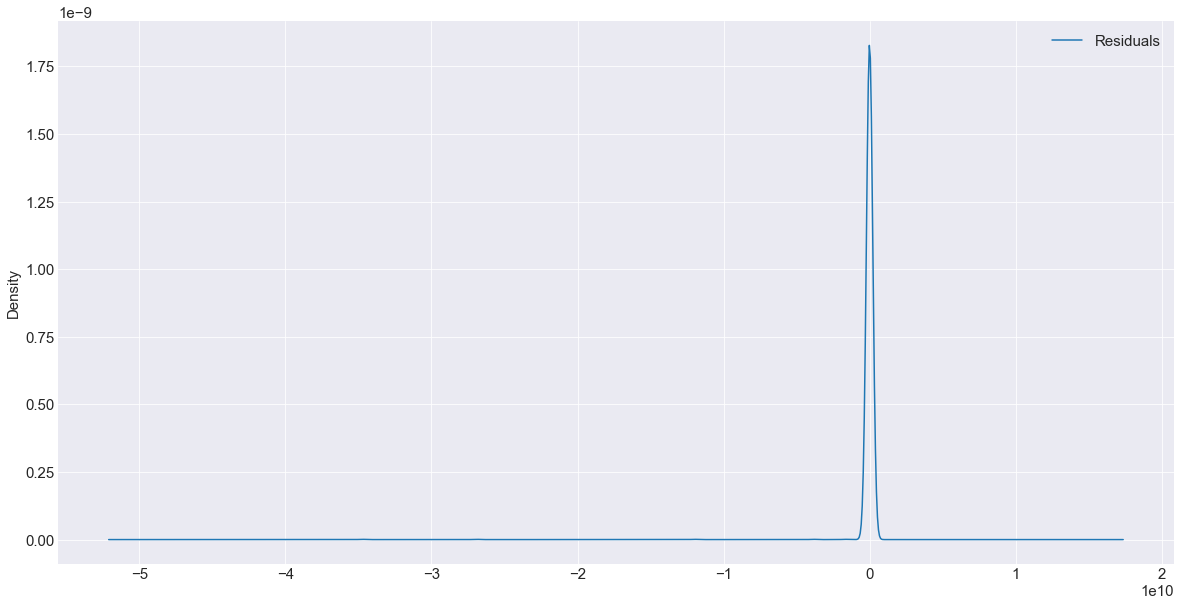

In [75]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

In [302]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

NameError: name 'result' is not defined

In [70]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -12.141693292212285 < Confidence Interval[1%]: -3.433526838083527 - Result: Stationary
T-test: -12.141693292212285 < Confidence Interval[5%]: -2.8629433788300744 - Result: Stationary
T-test: -12.141693292212285 < Confidence Interval[10%]: -2.567517095065801 - Result: Stationary

P-Value: 1.6453953648076815e-22 < 0.05 - Result: Stationary


In [71]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    10.005896
2020-09-20    10.241901
2020-09-21    11.100572
2020-09-22    10.706082
2020-09-23    11.025286
                ...    
2021-05-05     3.345079
2021-05-06     3.211531
2021-05-07     3.191354
2021-05-08     2.748687
2021-05-09     2.839319
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

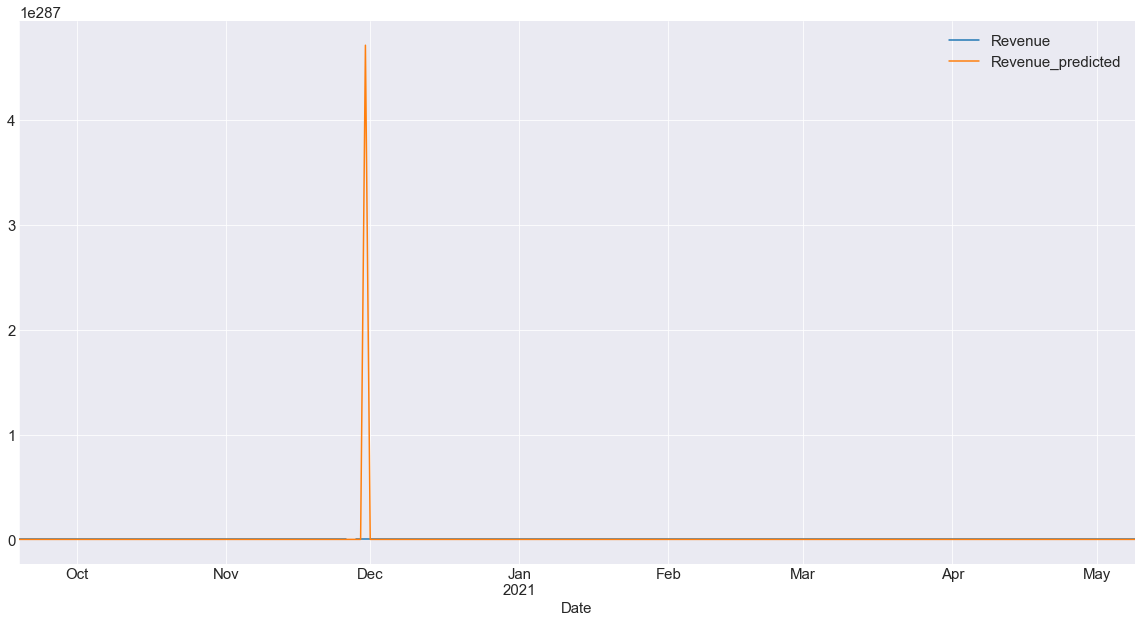

In [101]:
#Let's see how this model predict
data_test_predict = pd.concat([np.expm1(y_test), np.expm1(mean_forecast)], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
confidence_intervals = np.expm1(confidence_intervals)
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [73]:
metric_rmse(data_test_predict, 'Revenue')

85033799.07349415

### Square Time Series Analysis

In [304]:
data_sqrt = data_small.copy()
data_sqrt['Revenue'] = np.sqrt(data_sqrt['Revenue'])

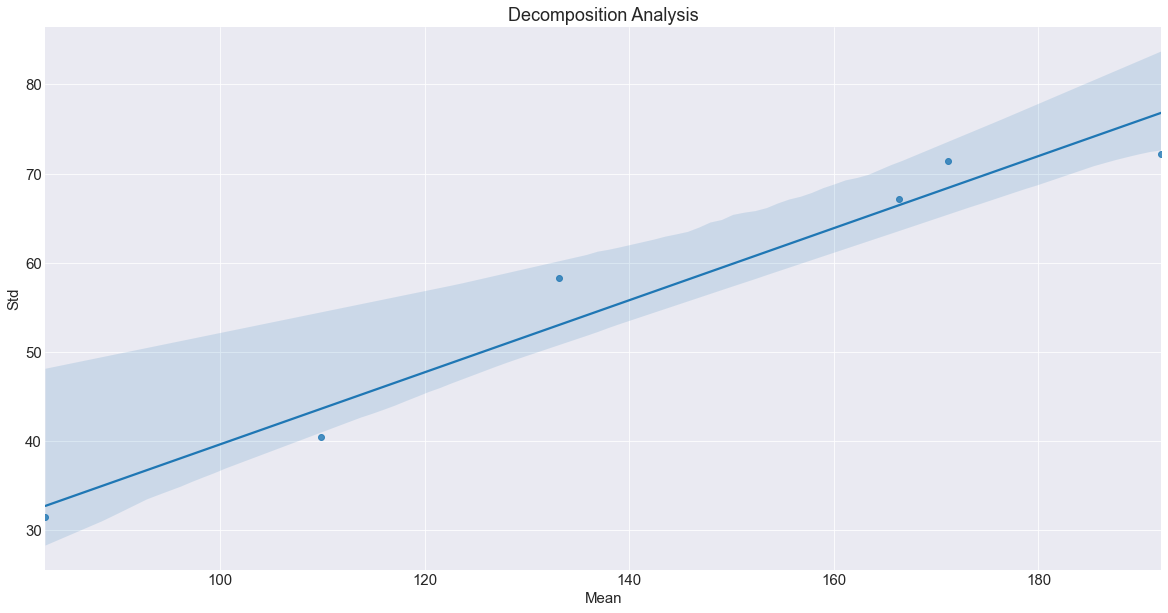

In [305]:
draw_decomposition(data_sqrt);

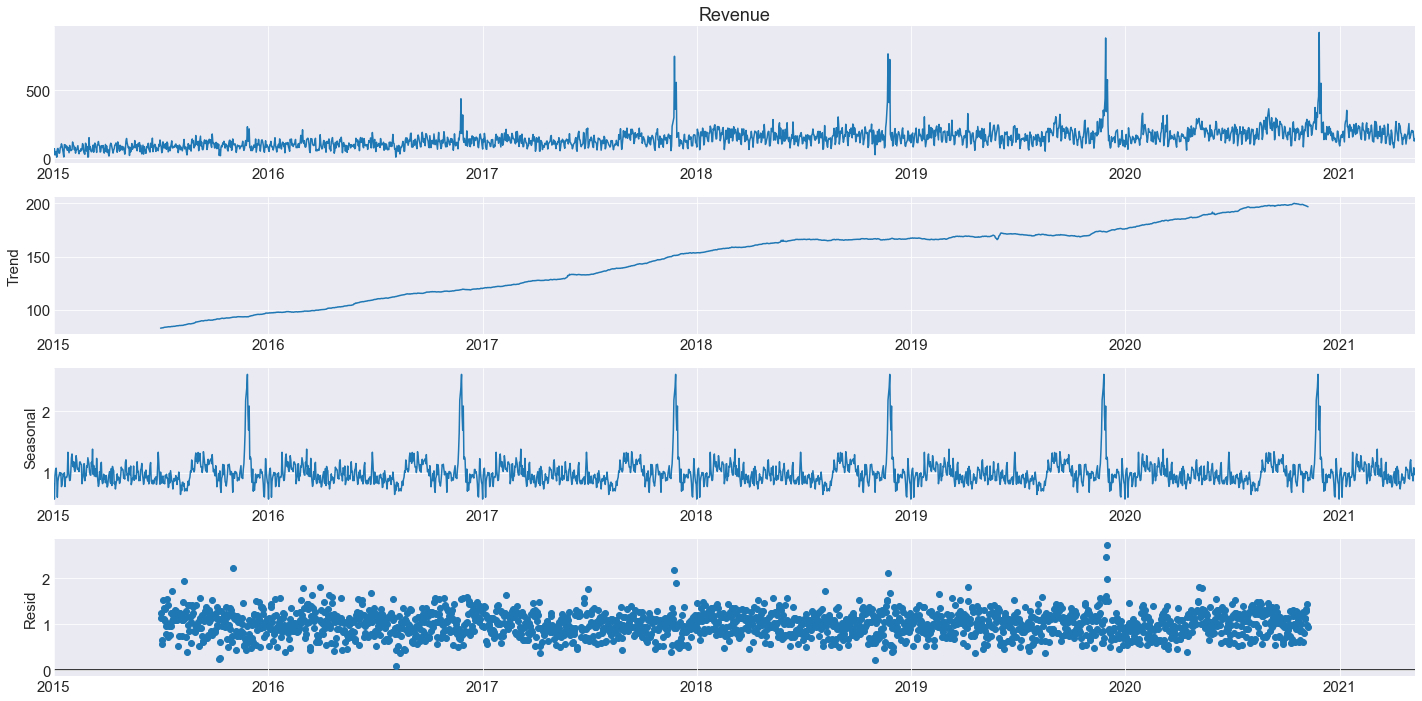

In [78]:
s_d_sqrt = seasonal_decompose(data_sqrt['Revenue'], period= 365, model= 'multiplicative')
s_d_sqrt.plot();

In [79]:
test_adf(data_sqrt, 'Revenue')

** Augmented Dickey-Fuller Test **

T-test: -4.1645727299394535 < Confidence Interval[1%]: -3.4332050526159112 - Result: Stationary
T-test: -4.1645727299394535 < Confidence Interval[5%]: -2.8628012970364574 - Result: Stationary
T-test: -4.1645727299394535 < Confidence Interval[10%]: -2.5674414457185817 - Result: Stationary

P-Value: 0.000756033819549469 < 0.05 - Result: Stationary


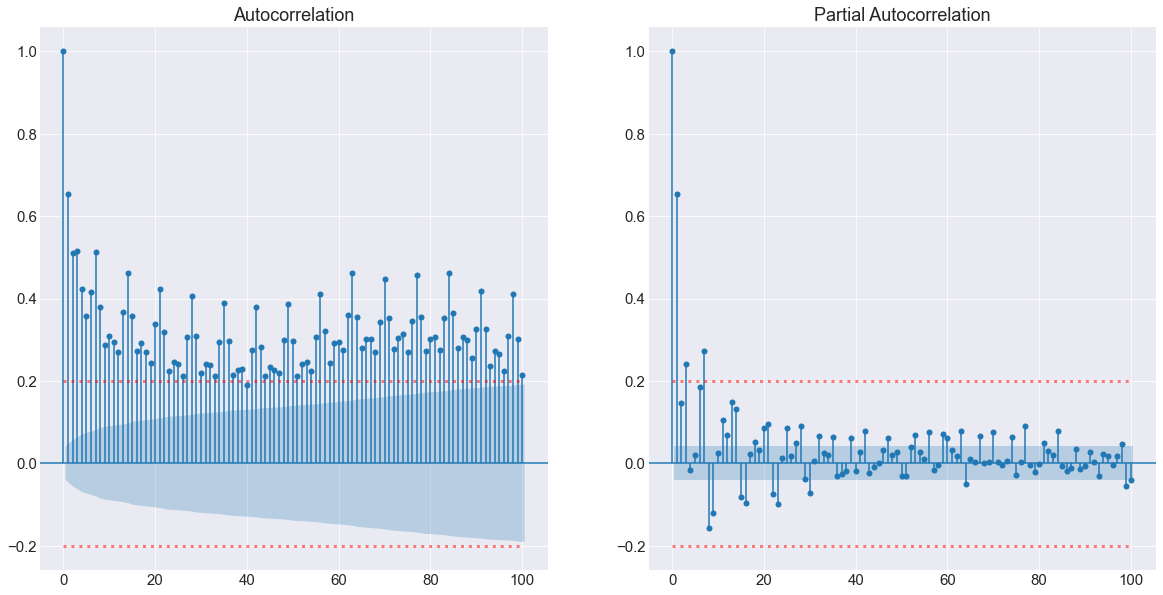

In [306]:
draw_autocorrelation(data_sqrt, 100)

### Sqrt Arima 

In [24]:
#Let's create the new exogenous variables
data_exogenous_sqrt = get_exogenous_features(data_sqrt)

In [138]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.
#ASSUMPTIONS, we would like to test with 365 season but we do not have enough memory
arima_params = {'p': [0, 4],
                'd': [0, 2], #Up to 1
                'q': [0, 4]}

sarima_params = {'P': [0, 4],
                 'D': [0, 2], #Up to 1
                 'Q': [0, 4],
                 'S': [7]}

#t = ['n','c','t','ct']
trend_params = ['c'] #We has test before and this is the best option always

In [25]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_exogenous_sqrt)

In [ ]:
test_aic = gridsearch_sarimax(y_train, X_train[['Black_Friday', 'Easter', 'Covid']], arima_params, 
                             sarima_params, trend_params)

In [119]:
sorted(test_aic.items(), key=lambda x: x[1])

[((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 20716.71392250466),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20716.92141933),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'n'), 20734.259905031497),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'n'), 20736.423939857275),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 20756.70747803355),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 20763.023790883817),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'c'), 20772.97049405372),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'n'), 20804.053614725108),
 ((1, 0, 0, '-', 0, 1, 1, 7, '-', 'n'), 20808.70342985497),
 ((1, 0, 0, '-', 1, 1, 1, 7, '-', 'c'), 20809.66505232566),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'n'), 20834.17159513651),
 ((0, 1, 1, '-', 0, 1, 1, 7, '-', 'n'), 20836.957638968266),
 ((1, 1, 1, '-', 1, 0, 1, 7, '-', 'n'), 20858.498377415446),
 ((1, 1, 1, '-', 1, 1, 1, 7, '-', 'c'), 20865.67815326595),
 ((1, 1, 1, '-', 0, 1, 1, 7, '-', 'c'), 20894.448387451026),
 ((0, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20898.56875778031),
 ((0, 1, 1, '-', 1, 1, 1, 7, '-', 'c

In [20]:
test_aic = pickle_to_object(pickle_file)

In [21]:
sorted(test_aic.items(), key=lambda x: x[1])

[((0, 1, 2, '-', 2, 1, 1, 7, '-', 'c'), 129.7265275818368),
 ((1, 0, 2, '-', 1, 1, 2, 7, '-', 'c'), 20706.73600442587),
 ((1, 0, 3, '-', 2, 1, 2, 7, '-', 'c'), 20709.62117492332),
 ((1, 0, 3, '-', 3, 1, 2, 7, '-', 'c'), 20709.996951281373),
 ((1, 0, 3, '-', 1, 1, 3, 7, '-', 'c'), 20710.348807508264),
 ((1, 0, 3, '-', 3, 1, 3, 7, '-', 'c'), 20711.12423214681),
 ((1, 0, 3, '-', 2, 1, 3, 7, '-', 'c'), 20711.196785933415),
 ((1, 0, 3, '-', 1, 1, 2, 7, '-', 'c'), 20711.43590003671),
 ((1, 0, 1, '-', 0, 1, 1, 7, '-', 'c'), 20716.71392250466),
 ((1, 0, 1, '-', 1, 1, 1, 7, '-', 'c'), 20716.92141933),
 ((1, 0, 1, '-', 1, 1, 2, 7, '-', 'c'), 20717.133011600203),
 ((1, 0, 1, '-', 2, 1, 2, 7, '-', 'c'), 20717.54000169415),
 ((1, 0, 1, '-', 2, 1, 3, 7, '-', 'c'), 20718.61215734003),
 ((1, 0, 1, '-', 0, 1, 3, 7, '-', 'c'), 20719.691497262622),
 ((1, 0, 1, '-', 1, 1, 3, 7, '-', 'c'), 20720.11671068731),
 ((1, 0, 1, '-', 3, 1, 2, 7, '-', 'c'), 20720.45145494505),
 ((1, 0, 1, '-', 3, 1, 3, 7, '-', 'c')

In [26]:
#Fit considering best hyperparameters
model = SARIMAX(endog= y_train, exog= X_train[['Black_Friday', 'Easter', 'Covid']],
                order= (1, 0, 2), seasonal_order= (1, 1, 2, 7), trend= 'c')
result = model.fit()

In [27]:
#Predict taking full Train
forecast = result.get_prediction(start= '2015-01-01', end= '2020-09-18', 
                                 exog= X_train.loc['2015-01-01':'2020-09-18'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01      0.383327
2015-01-02      0.439084
2015-01-03      0.479207
2015-01-04      0.459059
2015-01-05      0.456926
                 ...    
2020-09-14    229.957211
2020-09-15    245.924583
2020-09-16    230.615159
2020-09-17    258.166237
2020-09-18    234.922997
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

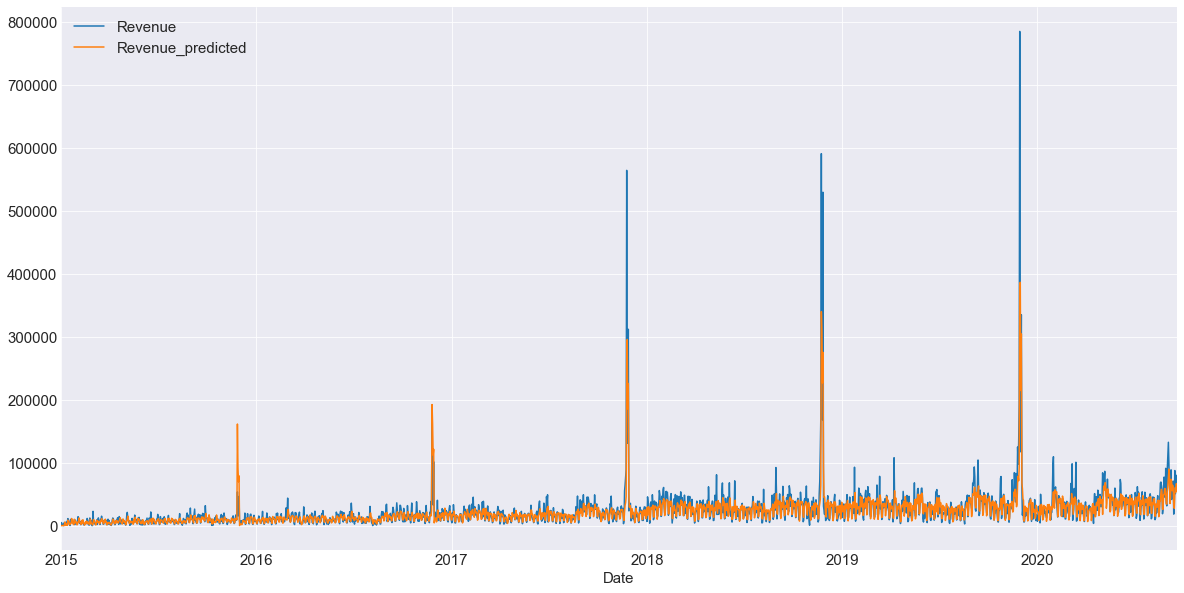

In [28]:
data_train_predict = pd.concat([pd.DataFrame(y_train).apply(lambda x: x ** 2), 
                                pd.DataFrame(mean_forecast).apply(lambda x: x ** 2)], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

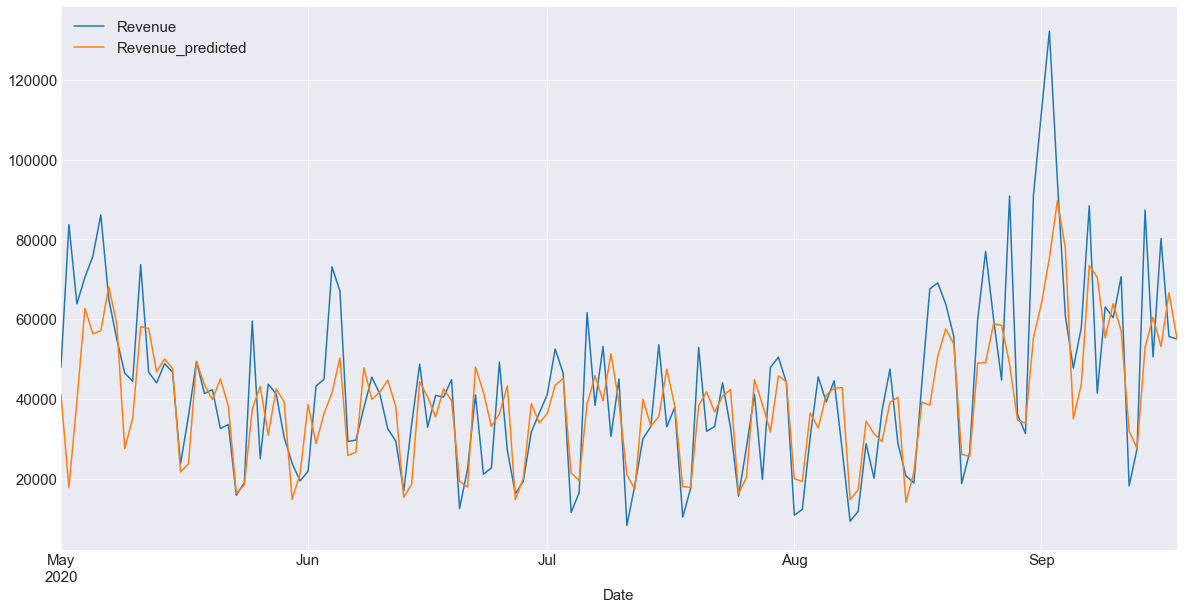

In [29]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [30]:
metric_rmse(data_train_predict, 'Revenue')

19621.188643040987

Residuals
count    2088.000000
mean     1232.522989
std     19587.130315
min   -269009.237043
25%     -4103.613928
50%       -71.370170
75%      4893.141589
max    404720.121675

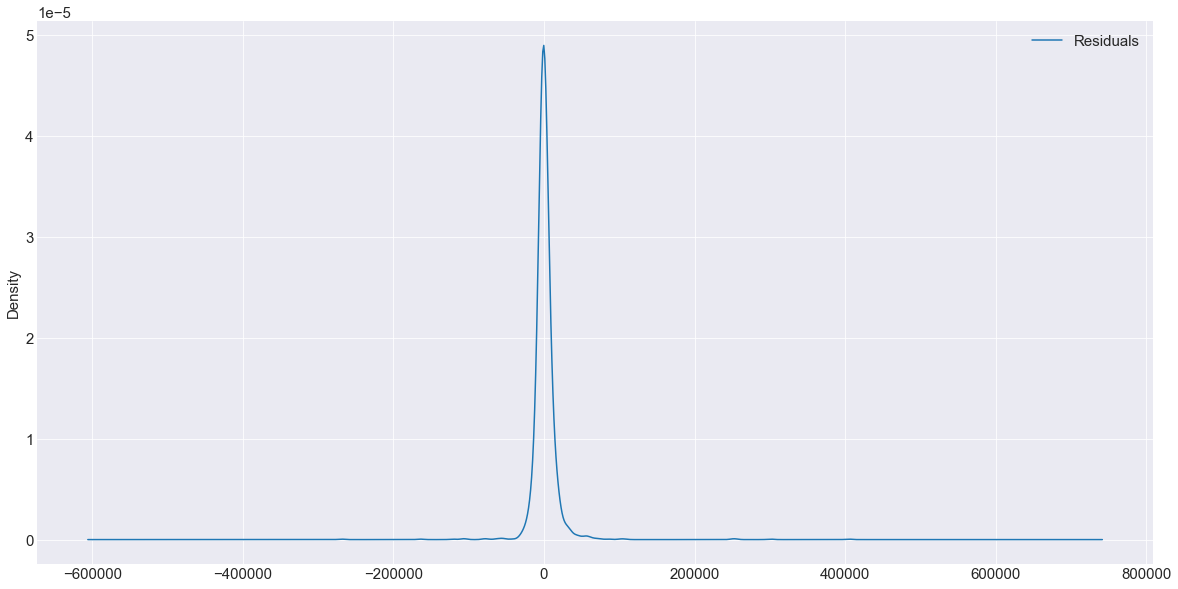

In [31]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

In [307]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

NameError: name 'result' is not defined

In [34]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -45.69568884529083 < Confidence Interval[1%]: -3.4334872119603324 - Result: Stationary
T-test: -45.69568884529083 < Confidence Interval[5%]: -2.862925883058088 - Result: Stationary
T-test: -45.69568884529083 < Confidence Interval[10%]: -2.567507779564507 - Result: Stationary

P-Value: 0.0 < 0.05 - Result: Stationary


In [35]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.get_prediction(start= '2020-09-19', end= '2021-05-09', 
                                 exog= X_test.loc['2020-09-19':'2021-05-09'][['Black_Friday', 'Easter', 'Covid']])
mean_forecast = forecast.predicted_mean
#Rename mean_forecast column name
mean_forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    164.428558
2020-09-20    174.045927
2020-09-21    234.360490
2020-09-22    223.314736
2020-09-23    228.726663
                 ...    
2021-05-05    230.972416
2021-05-06    235.562066
2021-05-07    231.545778
2021-05-08    160.948584
2021-05-09    172.645094
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

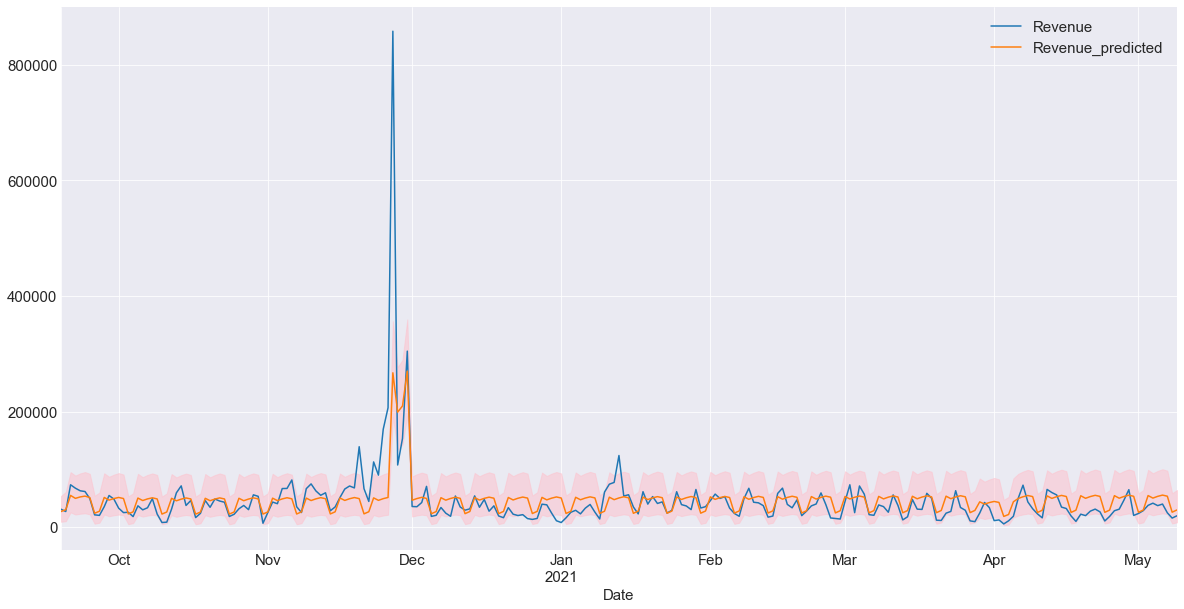

In [36]:
#Let's see how this model predict
data_test_predict = pd.concat([pd.DataFrame(y_test).apply(lambda x: x ** 2), 
                               pd.DataFrame(mean_forecast).apply(lambda x: x ** 2)], axis= 1)
data_test_predict.plot()

confidence_intervals = forecast.conf_int()
confidence_intervals = confidence_intervals.apply(lambda x: x ** 2)
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[0]],
                 confidence_intervals[confidence_intervals.columns[1]], color='pink', alpha=0.5)

In [37]:
metric_rmse(data_test_predict, 'Revenue')

45356.557148849846

### Triple Exponential Smoothing

Now, we are going to apply another classical Time Series Forecast method called Triple Exponential Smoothing

In [68]:
#We have create a GridSearch in order to chose the better hyperparameters
#IMPORTANT, this task is quite intensive so we are saving a pickle for multiple iterations.

#Parameters for fit
trend_params = ['add','mul']
damped_params = [True, False]
seasonal_params = ['add','mul']
period_params = [49]
#Parameters for prediction
box_cox = [True, False]
bias_params = [True, False]

In [66]:
X_train, y_train, X_test, y_test = sarimax_preparation_split(data_small)

In [69]:
test_rmse = gridsearch_tes(y_train, trend_params, damped_params, seasonal_params, period_params, box_cox, bias_params)

In [153]:
sorted(test_rmse.items(), key=lambda x: x[1])

[(('mul', False, 'mul', 49, '-', True, True), 26318.88540473293),
 (('add', True, 'mul', 49, '-', True, True), 26319.98468729066),
 (('add', False, 'mul', 49, '-', True, True), 26324.22576135944),
 (('mul', True, 'mul', 49, '-', True, True), 26355.65336118144),
 (('add', False, 'mul', 49, '-', True, False), 26371.676168562444),
 (('add', True, 'mul', 49, '-', True, False), 26373.30689833187),
 (('mul', False, 'mul', 49, '-', True, False), 26382.213201091752),
 (('mul', True, 'mul', 49, '-', True, False), 26407.72175784717),
 (('mul', True, 'add', 49, '-', True, True), 26766.289881068253),
 (('mul', False, 'add', 49, '-', True, True), 26768.168970195256),
 (('add', False, 'add', 49, '-', True, True), 26771.566766244807),
 (('add', True, 'add', 49, '-', True, True), 26773.6037399587),
 (('mul', False, 'mul', 35, '-', True, True), 26784.826834092364),
 (('add', True, 'mul', 35, '-', True, True), 26808.374850540516),
 (('add', False, 'mul', 35, '-', True, True), 26809.621282793334),
 (('mu

In [70]:
#Fit considering best hyperparameters
model = ExponentialSmoothing(endog= y_train, trend= 'mul', damped= False, seasonal= 'mul', seasonal_periods= 49)
result = model.fit(optimized= True, use_boxcox= True, remove_bias= True)

In [71]:
#Predict taking full Train
forecast = result.predict(start= '2015-01-01', end= '2020-09-18')
forecast.rename(f'{y_train.name}_predicted', inplace= True)

Date
2015-01-01     5003.598206
2015-01-02     4676.751201
2015-01-03     3378.231495
2015-01-04     3094.066773
2015-01-05     4231.473709
                  ...     
2020-09-14    67871.585224
2020-09-15    65054.557271
2020-09-16    58179.091239
2020-09-17    74981.072375
2020-09-18    70012.312567
Freq: D, Name: Revenue_predicted, Length: 2088, dtype: float64

<AxesSubplot:xlabel='Date'>

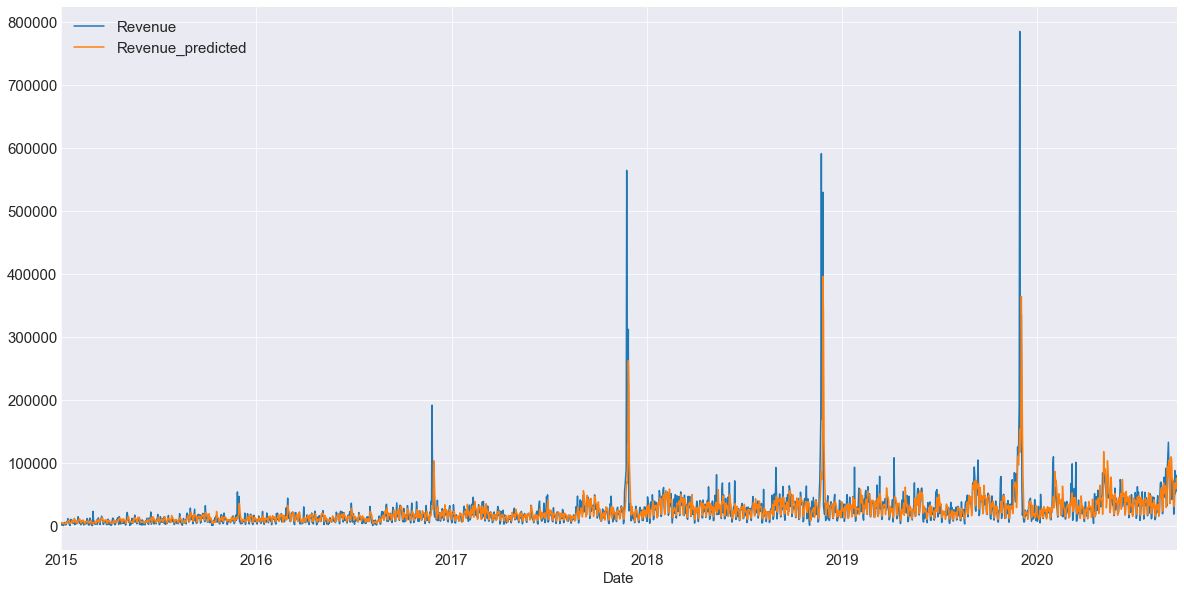

In [72]:
data_train_predict = pd.concat([y_train, forecast], axis= 1)
data_train_predict.plot()

<AxesSubplot:xlabel='Date'>

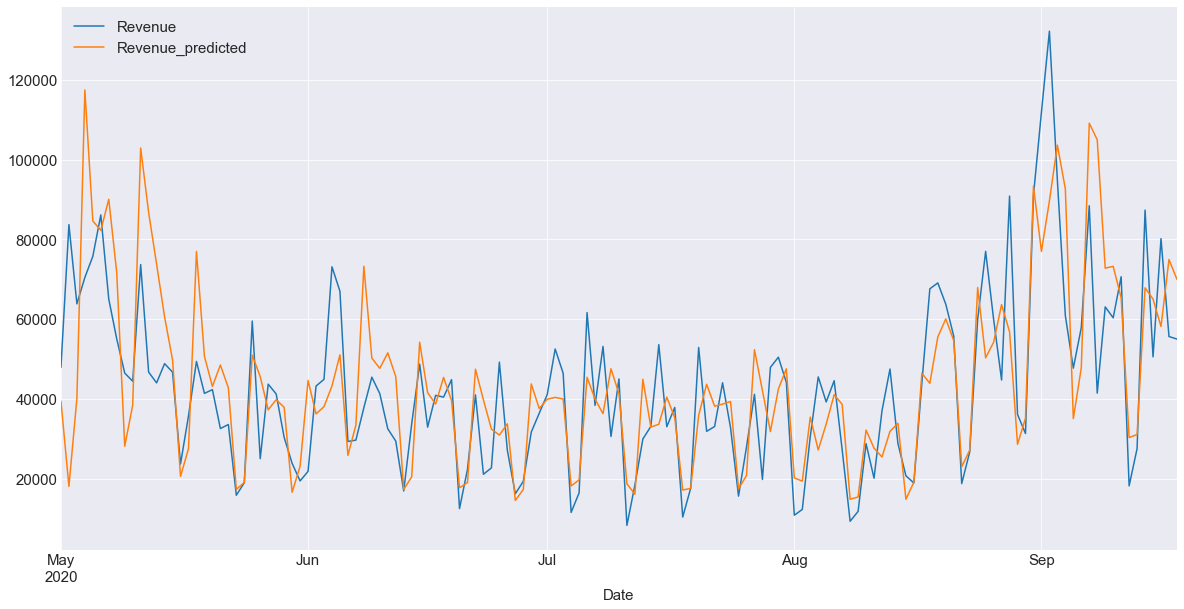

In [73]:
#Let's see a subset of the Time Series
data_train_predict.loc['2020-05-01':'2020-09-18'].plot()

In [74]:
metric_rmse(data_train_predict, 'Revenue')

26318.88540473293

Residuals
count  2.088000e+03
mean   1.299776e-12
std    2.632519e+04
min   -3.023694e+05
25%   -5.560762e+03
50%   -1.477460e+03
75%    3.426474e+03
max    6.311469e+05

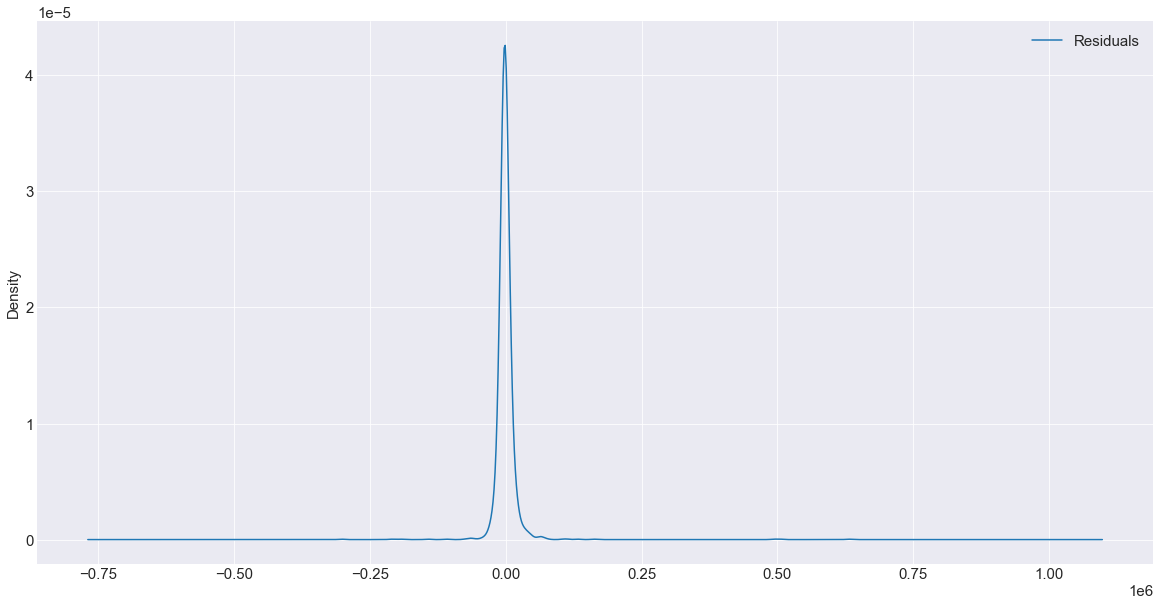

In [75]:
#Residual Analysis
data_residual = pd.DataFrame()
#Real - Predict
data_residual['Residuals'] = \
    data_train_predict[data_train_predict.columns[0]] - data_train_predict[data_train_predict.columns[1]]
data_residual.plot(kind='kde')

#Let's see the mean if it is in the center or show kind of skew
data_residual.describe()

In [308]:
draw_autocorrelation(pd.DataFrame(result.resid), 30)

NameError: name 'result' is not defined

In [76]:
#Augmented Dickey-Fuller test
residual = pd.DataFrame(result.resid)
residual.dropna(inplace= True)
test_adf(residual, residual.columns[0])

** Augmented Dickey-Fuller Test **

T-test: -19.180829942143056 < Confidence Interval[1%]: -3.433499298918619 - Result: Stationary
T-test: -19.180829942143056 < Confidence Interval[5%]: -2.8629312197305192 - Result: Stationary
T-test: -19.180829942143056 < Confidence Interval[10%]: -2.56751062103432 - Result: Stationary

P-Value: 0.0 < 0.05 - Result: Stationary


In [77]:
#Forecast vs. Test

#Predict taking full Test
forecast = result.predict(start= '2020-09-19', end= '2021-05-09')
forecast.rename(f'{y_train.name}_predicted', inplace= True)

2020-09-19    27131.535950
2020-09-20    31408.909655
2020-09-21    68021.872054
2020-09-22    53342.780134
2020-09-23    53206.552635
                  ...     
2021-05-05    30474.248053
2021-05-06    30119.693288
2021-05-07    27864.347976
2021-05-08    13316.307160
2021-05-09    15502.747089
Freq: D, Name: Revenue_predicted, Length: 233, dtype: float64

<AxesSubplot:xlabel='Date'>

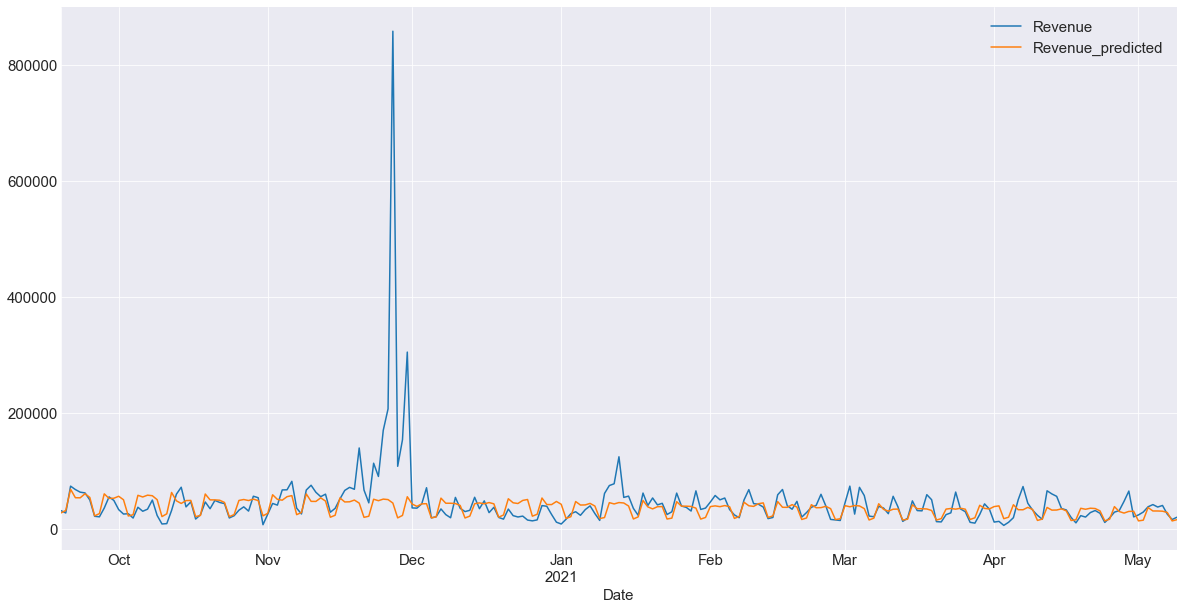

In [78]:
#Let's see how this model predict
data_test_predict = pd.concat([y_test, forecast], axis= 1)
data_test_predict.plot()

In [79]:
metric_rmse(data_test_predict, 'Revenue')

60830.33415477514

## Machine Learning Models for Time Series

In [23]:
#Create the lag features
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_lag = get_lag_features(data_small, 'Revenue', lags)

In [24]:
#Temporary DataFrame for checking correlation
data_temp = data_lag.copy()
data_temp['Revenue'] = data_small['Revenue']

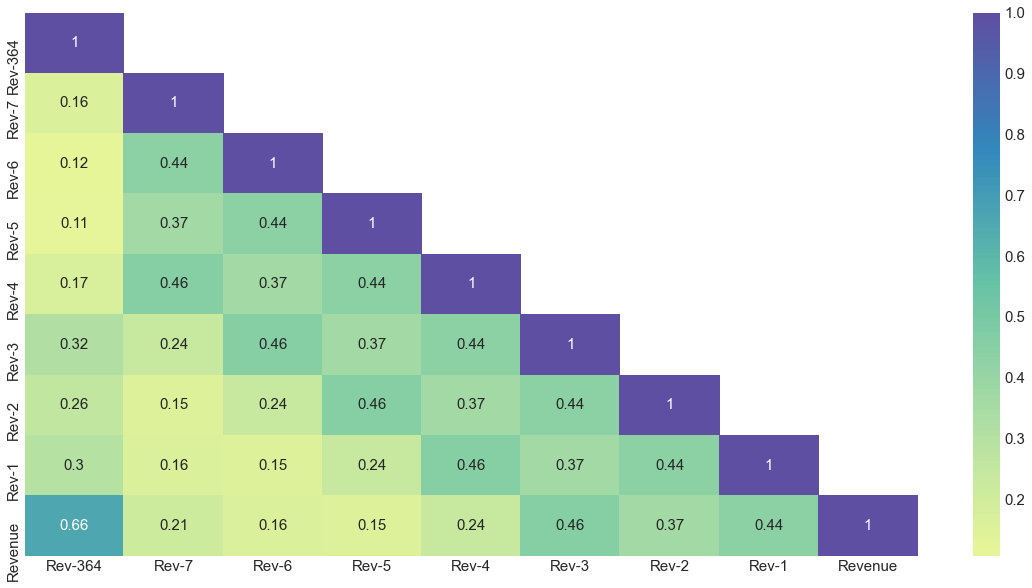

In [25]:
#Let's check the correlation
corr_matrix(data_temp)

In [26]:
#Create Seasonal Features - I am transforming as if they were non-numeric variables
data_seasonal = pd.get_dummies(data_small[['Year', 'Month', 'Day']].astype('str'))
#Create Exogenus Features
data_exogenous = get_exogenous_features(data_small)[['Black_Friday', 'Easter', 'Covid']]
#Create the model to Train and Test with the different Machine Learning models
data_model = pd.concat([data_seasonal, data_exogenous, data_lag, data_small['Revenue']], axis= 1)
data_model.dropna(inplace= True)

### Variance Analysis
It is important to see if we have features with variance close to 0 in that case, we should remove them. This only applies to quantitative variables.

In [22]:
non_zero_variance(data_model, data_model.iloc[:,0:-1])

Day_24 feature: has non-zero variance - Std:0.18
Month_2 feature: has non-zero variance - Std:0.28
Month_3 feature: has non-zero variance - Std:0.29
Day_30 feature: has non-zero variance - Std:0.17
Day_8 feature: has non-zero variance - Std:0.18
Rev-6 feature: has non-zero variance - Std:41024.65
Year_2019 feature: has non-zero variance - Std:0.39
Day_19 feature: has non-zero variance - Std:0.18
Day_1 feature: has non-zero variance - Std:0.18
Day_25 feature: has non-zero variance - Std:0.18
Day_31 feature: has non-zero variance - Std:0.14
Rev-2 feature: has non-zero variance - Std:41014.23
Day_3 feature: has non-zero variance - Std:0.18
Day_14 feature: has non-zero variance - Std:0.18
Year_2016 feature: has non-zero variance - Std:0.39
Day_22 feature: has non-zero variance - Std:0.18
Month_9 feature: has non-zero variance - Std:0.27
Year_2020 feature: has non-zero variance - Std:0.39
Rev-3 feature: has non-zero variance - Std:41015.14
Day_5 feature: has non-zero variance - Std:0.18
Day

### Train/Test Split
Let's prepare the X_train, X_test, y_train and y_test data and scale these features with Robust scaler

A prepare the full time series adding the validation data

In [23]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [184]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

### Data Validation and Data Forecasting
We are going to concatenate the current Time Series Data with a longer file with more reals values and use this bigger model for checking how good or bad is woking the model

Moreover, we are going to create the last Data Set for Forecasting purposes. The idea is forecasting up to 14 days in advance.
We are going to add to the Data Validation Data Set a new one with the lagged, seasonal and exogenous features in order to try to estimate what will be the sales.

Some important assumptions. We need to trained 14 models for each forecast:
* model_trained_1: This will forecast T+1
* model_trained_2: This will forecast T+2
* And so on...

In [264]:
data_full = pd.concat([data_small, data_validation])

In [265]:
#Create the lag features for data validation
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_lag_full = get_lag_features(data_full, 'Revenue', lags)

In [35]:
#Create Seasonal Features - I am transforming as if they were non-numeric variables
data_seasonal_full = pd.get_dummies(data_full[['Year', 'Month', 'Day']].astype('str'))
#Create Exogenus Features
data_exogenous_full = get_exogenous_features(data_full)[['Black_Friday', 'Easter', 'Covid']]
#Create the model to Train and Test with the different Machine Learning models
data_model_full = pd.concat([data_seasonal_full, data_exogenous_full, data_lag_full, 
                                   data_full['Revenue']], axis= 1)
data_model_full.dropna(inplace= True)

### Linear Regression Example

Let's check a simple Linear Regression for this data

In [98]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [99]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

In [100]:
#Linear Regression()
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [101]:
#Let's predict this model with Train Data
y_predict_train = model.predict(X_train_scaled)
y_predict_train = pd.Series(y_predict_train, index= y_train.index)
y_predict_train = y_predict_train.rename(f'{y_train.name}_predicted')
#Create the new DataFrame with the Train y values and Train predict values
forecast_train = pd.DataFrame([y_train, y_predict_train]).T

In [102]:
#Calculate the RMSE
metric_rmse(forecast_train, 'Revenue')

14578.265520365843

<AxesSubplot:xlabel='Date'>

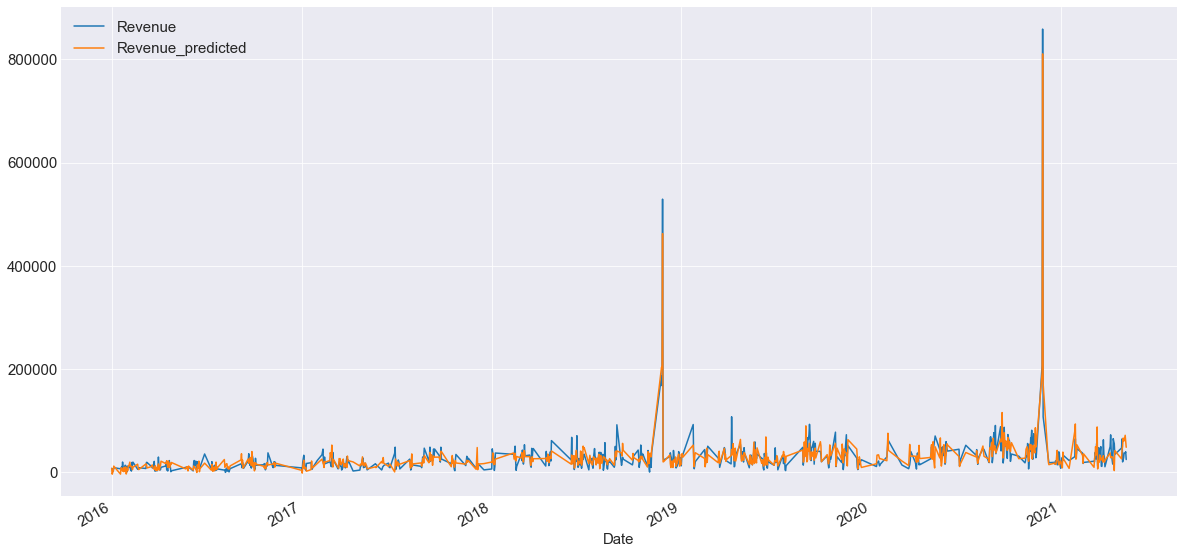

In [103]:
#Let's see the forecast
forecast_train.plot()

#### Residual Analysis 

In [104]:
forecast_train['Residuals'] = forecast_train['Revenue'] - forecast_train['Revenue_predicted']

<AxesSubplot:xlabel='Date'>

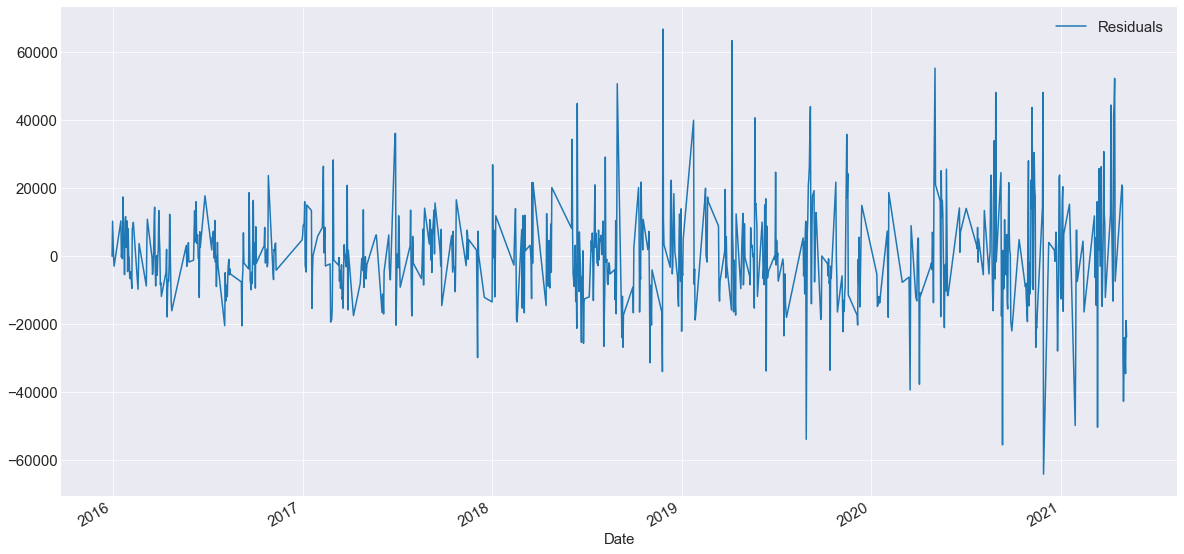

In [105]:
forecast_train[['Residuals']].plot()

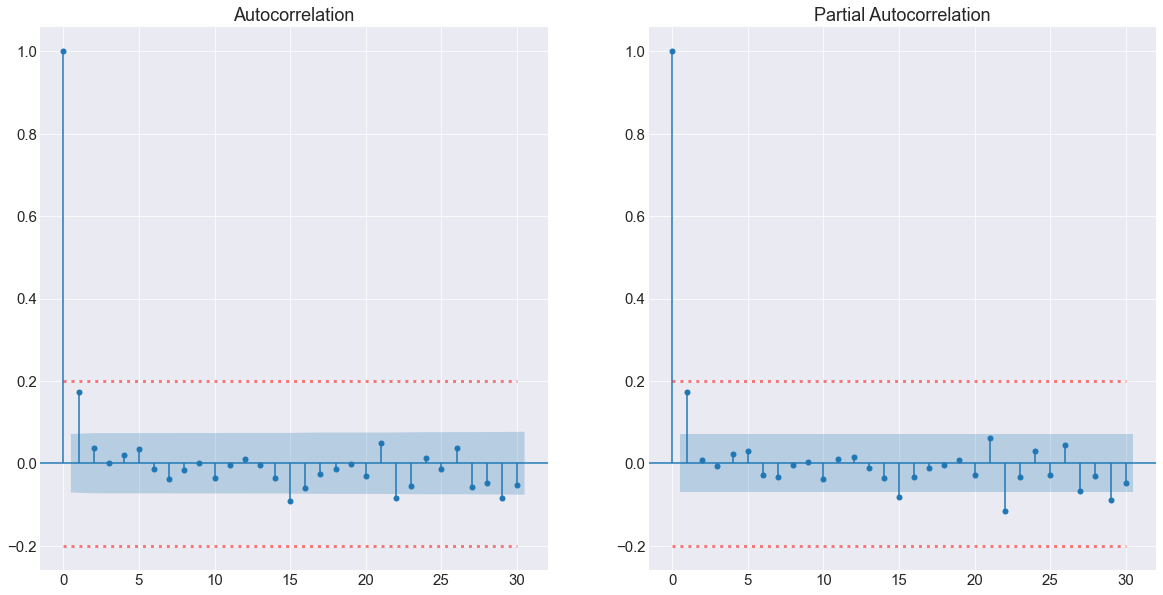

In [286]:
draw_autocorrelation(forecast_train[['Residuals']], 30)

In [108]:
test_adf(forecast_train, 'Residuals')

** Augmented Dickey-Fuller Test **

T-test: -23.105127741667594 < Confidence Interval[1%]: -3.4389722010249386 - Result: Stationary
T-test: -23.105127741667594 < Confidence Interval[5%]: -2.8653454308425705 - Result: Stationary
T-test: -23.105127741667594 < Confidence Interval[10%]: -2.5687964010457227 - Result: Stationary

P-Value: 0.0 < 0.05 - Result: Stationary


In [109]:
#R²
r2_score(forecast_train['Revenue'], forecast_train['Revenue_predicted'])

0.8716276577424926

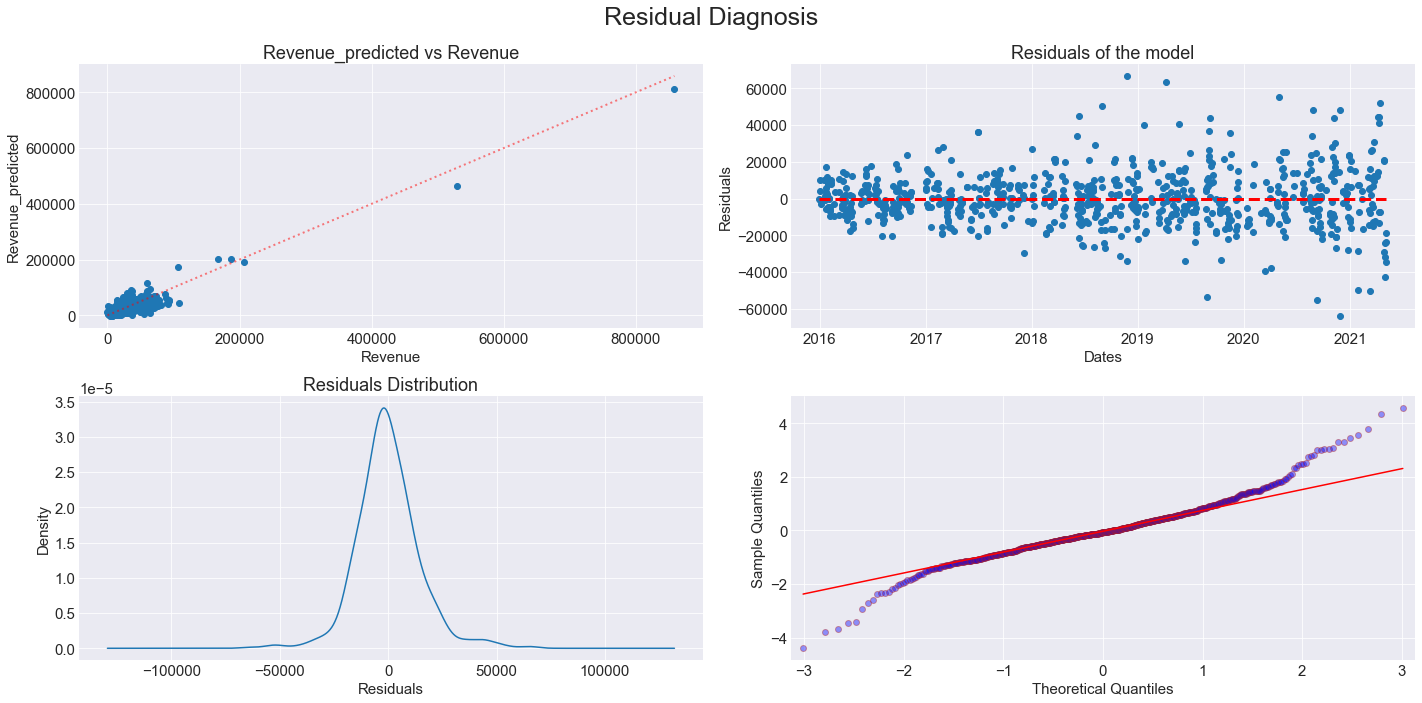

In [110]:
#Residual Analysis
draw_residuals_diagnosis(forecast_train, ['Revenue', 'Revenue_predicted', 'Residuals'])

#### Predict 

In [111]:
#Now how this perform with the Test Data
y_predict_test = model.predict(X_test_scaled)
y_predict_test = pd.Series(y_predict_test, index= y_test.index)
y_predict_test = y_predict_test.rename(f'{y_test.name}_predicted')
#Create the new DataFrame with the Test y values and Test predict values
forecast_test = pd.DataFrame([y_test, y_predict_test]).T

In [112]:
metric_rmse(forecast_test, 'Revenue')

29519.2466327241

<AxesSubplot:xlabel='Date'>

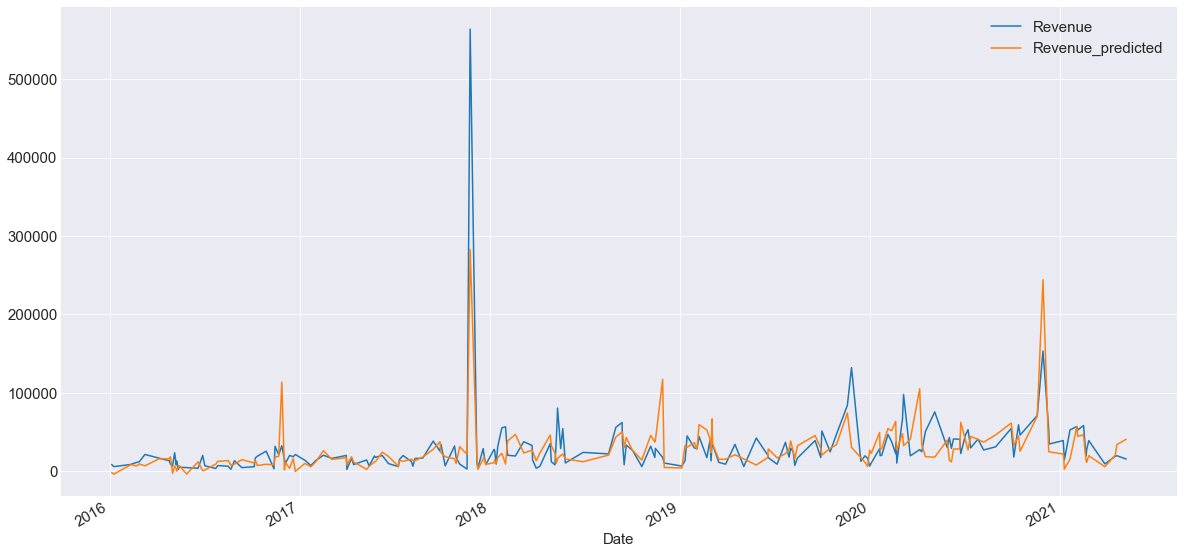

In [113]:
#Let's see the forecast
forecast_test.plot()

In [114]:
#R²
r2_score(forecast_test['Revenue'], forecast_test['Revenue_predicted'])

0.5450427846104638

<AxesSubplot:>

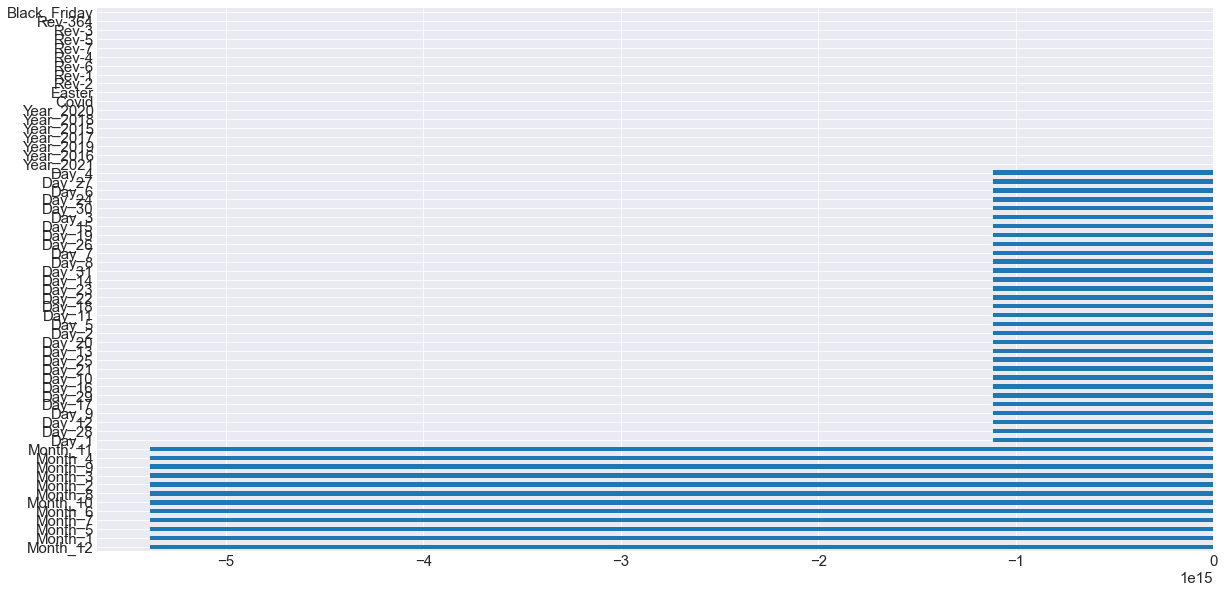

In [115]:
#Features Importance
pd.Series(model.coef_, data_model.columns[0:-1]).sort_values(ascending = True).plot(kind = 'barh')

### Test Machine Learning Models

Assumptions, we are going to fit and predict for forecasting just one day. Then we will chose the best model and create a new dataset for predicting the day after and so on. In total seven different Dataframes.

We are going to test different ML Regression models:
* Ridge
* Elastic Net
* KNeighborsRegressor
* RandomForestRegressor
* GradientBoostingRegressor
* XGBRegressor
* LGBMRegressor

First of all, get the right hyperparameters via GridSearch

##### Constants for GridSearch Time Series

In [34]:
ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
    }

elastic_net_params = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 0.9, 0.99, 0.999],
    'l1_ratios': np.linspace(0, 1, 20),
    'fit_intercept': [True, False]
    }

k_neighbors_params = {
    'n_neighbors': np.linspace(5, 100, 20, dtype= int),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
    }

random_forest_params = {  
    'n_estimators': np.linspace(100, 1000, 3, dtype= int),
    'max_depth': [30, 40, 50],
    'min_samples_split': np.linspace(2, 10, 3, dtype= int),
    'min_samples_leaf': np.linspace(1, 10, 10, dtype= int),
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    }

gradient_boosting_params = {
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators': np.linspace(100, 1000, 3, dtype= int),
    'min_samples_split': np.linspace(2, 10, 3, dtype= int),
    'min_samples_leaf': np.linspace(1, 10, 10, dtype= int),
    'max_depth': [3, 4, 5],
    'max_features': ['auto', 'sqrt']
    }

xgb_params = {
    'n_estimators': np.linspace(100, 1000, 4, dtype= int),
    'max_depth': np.linspace(3, 20, 6, dtype= int),
    'booster': ['gbtree', 'gblinear', 'dart']
    }

lgbm_params = {
    'num_leaves': np.linspace(31, 2000, 6, dtype= int),
    'n_estimators': np.linspace(50, 1000, 6, dtype= int)
    }

#### Ridge 

In [80]:
#GridSearch Ridge
models_list_ridge, metrics_list_ridge, forecasts_list_ridge = \
    grid_search_times_series('ridge', ridge_params, data_model, 'Revenue', lags, 10, 'rmse')

In [106]:
best_model_metric(models_list_ridge, metrics_list_ridge)

(26847.66211027263, Ridge(alpha=0.001, fit_intercept=False, solver='sag'))

#### Elastic Net

In [81]:
#GridSearch Elastic Net
models_list_elastic, metrics_list_elastic, forecasts_list_elastic = \
    grid_search_times_series('elastic', elastic_net_params, data_model, 'Revenue', lags, 10, 'rmse')

In [108]:
best_model_metric(models_list_elastic, metrics_list_elastic)

(24270.631929236923, ElasticNet(alpha=0.9, l1_ratio=0.3684210526315789))

#### K-Neighbors 

In [91]:
#GridSearch K-neighbors
models_list_kn, metrics_list_kn, forecasts_list_kn = \
    grid_search_times_series('kneighbors', k_neighbors_params, data_model, 'Revenue', lags, 10, 'rmse')

In [109]:
best_model_metric(models_list_kn, metrics_list_kn)

(27118.266600226074,
 KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10, weights='distance'))

#### Random Forest

In [26]:
#Random Forest
models_list_random, metrics_list_random, forecasts_list_random = \
    grid_search_times_series('random', random_forest_params, data_model, 'Revenue', lags, 10, 'rmse')

In [27]:
best_model_metric(models_list_random, metrics_list_random)

(25700.928861148837, RandomForestRegressor(max_depth=40))

#### Gradient Boost

In [102]:
#GridSearch Gradient Boost
models_list_gradient, metrics_list_gradient, forecasts_list_gradient = \
    grid_search_times_series('gradient', gradient_boosting_params, data_model, 'Revenue', lags, 10, 'rmse')

In [125]:
best_model_metric(models_list_gradient, metrics_list_gradient)

(22352.736923338736, GradientBoostingRegressor(max_features='auto'))

#### XGB

In [124]:
#XGB
models_list_xgb, metrics_list_xgb, forecasts_list_xgb = \
    grid_search_times_series('xgb', xgb_params, data_model, 'Revenue', lags, 10, 'rmse')

[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:46:56] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:06] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:47:26] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:26] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:47:38] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:48:13] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:49:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:51:57] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:54:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:54:00] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:54:01] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[10:57:31] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:59:52] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:59:52] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:08:07] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:08:08] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:12:03] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:04] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:12:04] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

[11:21:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:21:21] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { max_depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down

In [126]:
best_model_metric(models_list_xgb, metrics_list_xgb)

(25635.222201310367,
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))

#### LGBM

In [36]:
#LGBMRegressor
models_list_lgbm, metrics_list_lgbm, forecasts_list_lgbm = \
    grid_search_times_series('lgbm', lgbm_params, data_model, 'Revenue', lags, 10, 'rmse')

In [37]:
best_model_metric(models_list_lgbm, metrics_list_lgbm)

(28423.544286052154, LGBMRegressor(n_estimators=50))

### Training and Validation 

#### Train/Test Split
Let's prepare the X_train, X_test, y_train and y_test data and scale these features with Robust scaler

A prepare the full time series adding the validation data

In [29]:
#Train and Test Split
X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lags)

In [30]:
#Scale the features
X_train_scaled, X_test_scaled = data_normalization(X_train, X_test, 'robust')

#### Ridge Model

In [31]:
#Ridge Model
model_ridge = Ridge(alpha=0.001, fit_intercept=False, solver='sag')

In [32]:
#Model
model_ridge.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_ridge = predict_model(model_ridge, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_ridge = metric_rmse(forecast_ridge, "Revenue")
r2_ridge = r2_score(forecast_ridge["Revenue"], forecast_ridge["Revenue_predicted"])
print(f'Ridge RMSE_train: {rmse_ridge}')
print(f'R²: {r2_ridge}')

Ridge RMSE_train: 14720.596503067534
R²: 0.7541295872692808


In [33]:
#Test Values
forecast_ridge_test = predict_model(model_ridge, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_ridge_test = metric_rmse(forecast_ridge_test, "Revenue")
r2_ridge_test = r2_score(forecast_ridge_test["Revenue"], forecast_ridge_test["Revenue_predicted"])
print(f'Ridge RMSE_test: {rmse_ridge_test}')
print(f'R²: {r2_ridge_test}')

Ridge RMSE_test: 29436.516417425722
R²: 0.8268722010639824


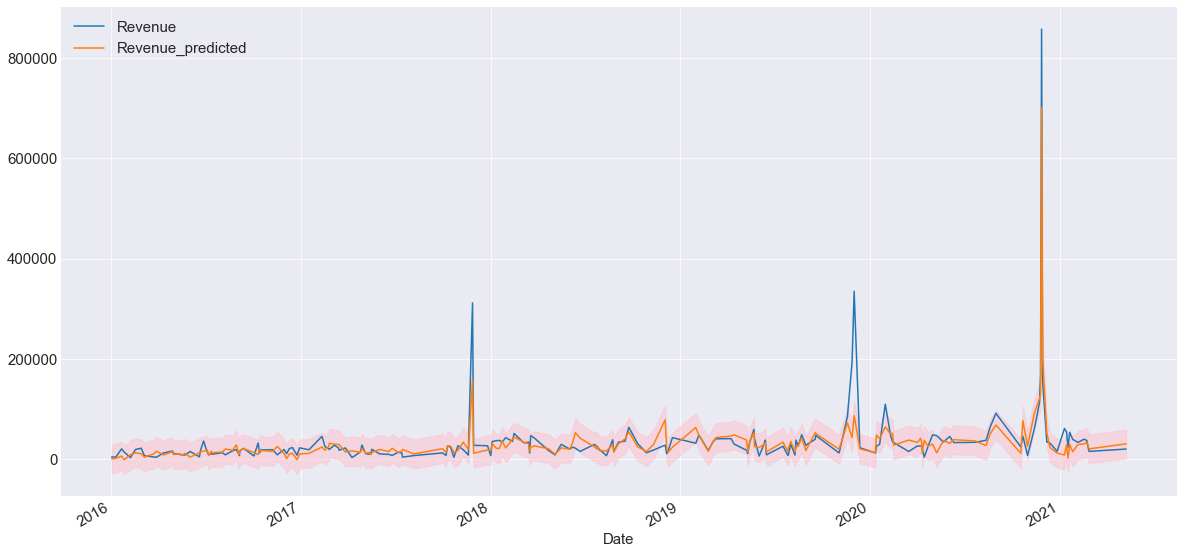

In [34]:
#Let's see the prediction
forecast_ridge_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_ridge, forecast_ridge_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Elastic Net Model

In [35]:
#Elastic Net Model
model_elastic_net = ElasticNet(alpha=0.9, l1_ratio=0.3684210526315789)

In [36]:
#Model
model_elastic_net.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_elastic_net = predict_model(model_elastic_net, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_elastic_net = metric_rmse(forecast_elastic_net, "Revenue")
r2_elastic_net = r2_score(forecast_elastic_net["Revenue"], forecast_elastic_net["Revenue_predicted"])
print(f'Ridge Elastic Net_train: {rmse_elastic_net}')
print(f'R²: {r2_elastic_net}')

Ridge Elastic Net_train: 16820.60225934849
R²: 0.67897523549547


In [37]:
#Test Values
forecast_elastic_net_test = predict_model(model_elastic_net, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_elastic_net_test = metric_rmse(forecast_elastic_net_test, "Revenue")
r2_elastic_net_test = r2_score(forecast_elastic_net_test["Revenue"], forecast_elastic_net_test["Revenue_predicted"])
print(f'Ridge Elastic Net_test: {rmse_elastic_net_test}')
print(f'R²: {r2_elastic_net_test}')

Ridge Elastic Net_test: 35919.17638624443
R²: 0.7422214830568524


#### K-Neighbors Model

In [60]:
#K-Neighbors Model
model_kn = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=10, weights='distance')

In [61]:
#Model
model_kn.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_kn = predict_model(model_kn, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_kn = metric_rmse(forecast_kn, "Revenue")
r2_kn = r2_score(forecast_kn["Revenue"], forecast_kn["Revenue_predicted"])
print(f'K-Neighbors_train: {rmse_kn}')
print(f'R²: {r2_kn}')

K-Neighbors_train: 0.0
R²: 1.0


In [ ]:
#Overfitting?

In [40]:
forecasts_kn = cross_val_time_series(model_kn, data_small, lags, 10, scaler= 'robust')

bias_kn = time_series_score(forecasts_kn, 'Revenue', 'bias')
variance_kn = time_series_score(forecasts_kn, 'Revenue', 'variance')
rmse_kn = time_series_score(forecasts_kn, 'Revenue', 'rmse')

error_kn = pd.DataFrame([rmse_kn, bias_kn, variance_kn], index= ['RMSE', 'Bias', 'Variance']).T

In [41]:
#Total Error
error_kn['Total Error'] = pd.DataFrame(error_kn['Bias'] ** 2 + error_kn['Variance'])

In [42]:
error_kn

RMSE         Bias  Variance   Total Error
0  54177.365839  2830.074081  0.449455  8.009320e+06
1  22367.437858  1062.563893  0.625972  1.129043e+06
2  28420.439242  1285.969271  0.734848  1.653718e+06
3  46799.217478  2625.693085  0.565958  6.894265e+06
4  14924.865950   429.720041  0.737460  1.846601e+05
5  17145.983295   205.990733  0.807908  4.243299e+04
6  15074.429197  -146.079953  0.765343  2.134012e+04
7  29653.323264   430.489600  0.679080  1.853220e+05
8  21026.803454  1234.403828  0.709976  1.523754e+06
9  33476.364929   164.180788  0.611680  2.695594e+04

<AxesSubplot:>

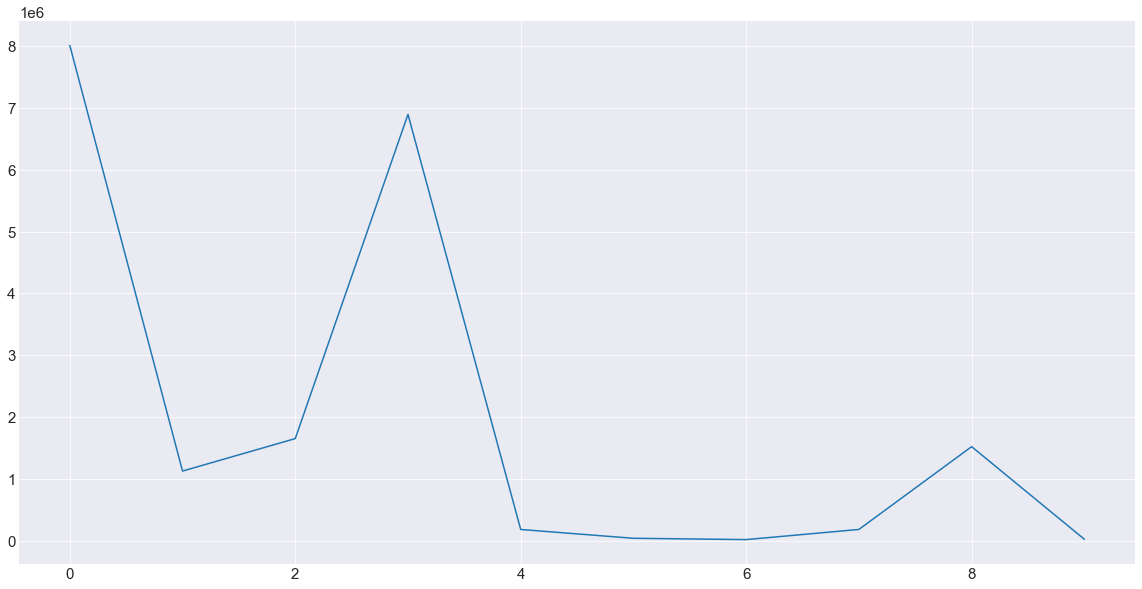

In [63]:
error_kn['Total Error'].plot()

In [82]:
#Model
model_kn.fit(X_train_scaled, y_train)

#Test Values
forecast_kn_test = predict_model(model_kn, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_kn_test = metric_rmse(forecast_kn_test, "Revenue")
r2_kn_test = r2_score(forecast_kn_test["Revenue"], forecast_kn_test["Revenue_predicted"])
print(f'K-Neighbors_test: {rmse_kn_test}')
print(f'R²: {r2_kn_test}')

K-Neighbors_test: 57961.23501768812
R²: 0.3287732708327781


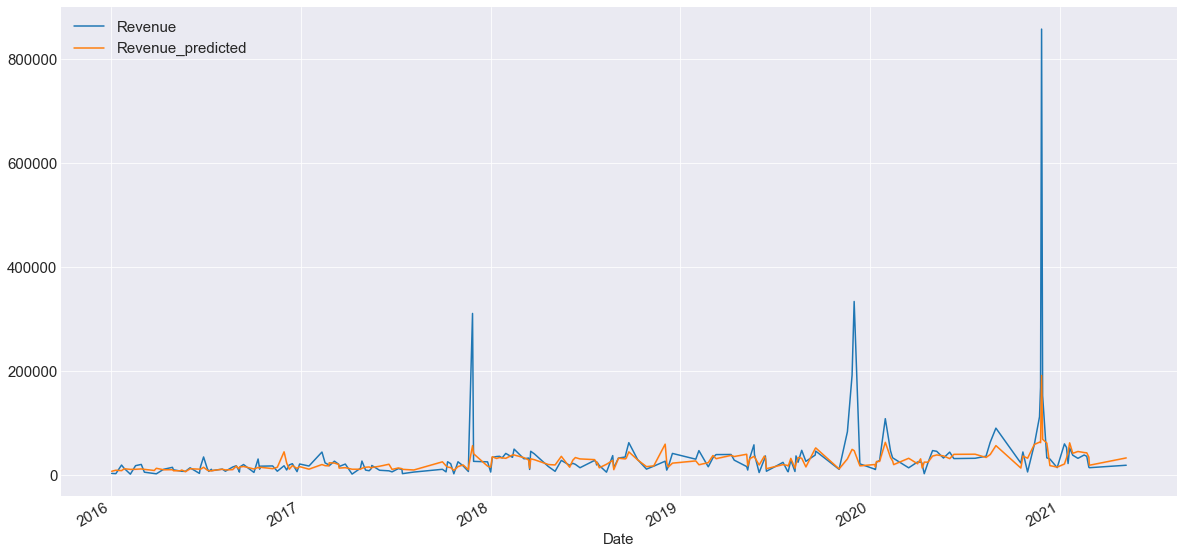

In [64]:
#Let's see the prediction
forecast_kn_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_kn, forecast_kn_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Random Forest Model

In [301]:
#Random Fores Model
model_random = RandomForestRegressor(max_depth=40)

In [302]:
#Model
model_random.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_random = predict_model(model_random, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_random = metric_rmse(forecast_random, "Revenue")
r2_random = r2_score(forecast_random["Revenue"], forecast_random["Revenue_predicted"])
print(f'Random Forest_train: {rmse_random}')
print(f'R²: {r2_random}')

Random Forest_train: 10292.028878448988
R²: 0.9571382650185124


In [307]:
#Test Values
forecast_random_test = predict_model(model_random, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_random_test = metric_rmse(forecast_random_test, "Revenue")
r2_random_test = r2_score(forecast_random_test["Revenue"], forecast_random_test["Revenue_predicted"])
print(f'Random Forest_test: {rmse_random_test}')
print(f'R²: {r2_random_test}')

Random Forest_test: 24230.48015047871
R²: 0.09059919988384357


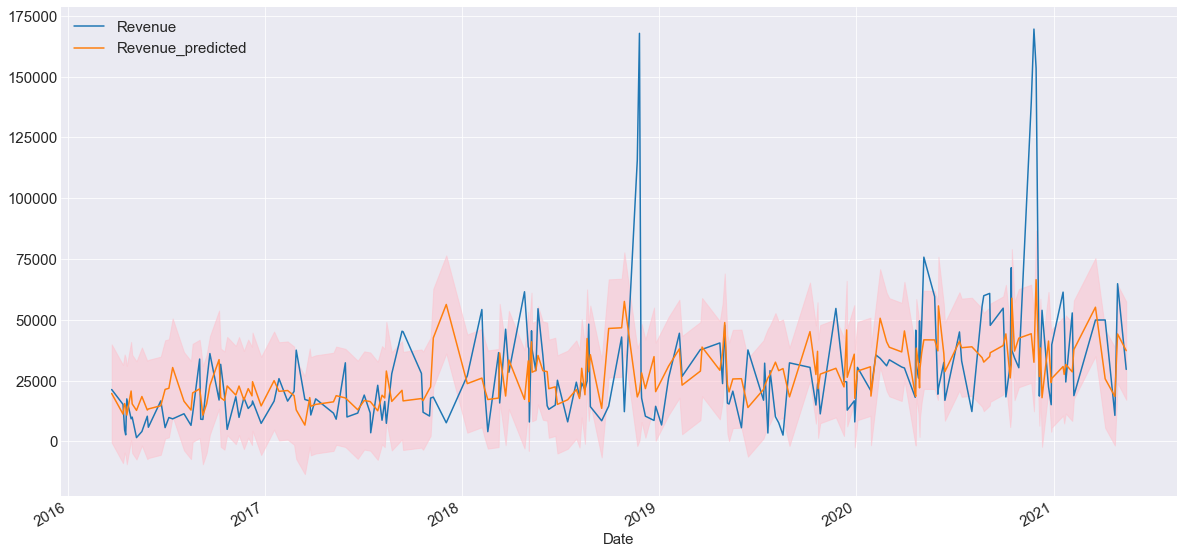

In [308]:
#Let's see the prediction
forecast_random_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_random, forecast_random_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### Gradient Boost

In [69]:
#Gradient Boost
model_boost = GradientBoostingRegressor(max_features='auto')

In [70]:
#Model
model_boost.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_boost = predict_model(model_boost, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_boost = metric_rmse(forecast_boost, "Revenue")
r2_boost = r2_score(forecast_boost["Revenue"], forecast_boost["Revenue_predicted"])
print(f'Gradient Boost_train: {rmse_boost}')
print(f'R²: {r2_boost}')

Gradient Boost_train: 8435.812013737082
R²: 0.9192561898113867


In [71]:
#Test Values
forecast_boost_test = predict_model(model_boost, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_boost_test = metric_rmse(forecast_boost_test, "Revenue")
r2_boost_test = r2_score(forecast_boost_test["Revenue"], forecast_boost_test["Revenue_predicted"])
print(f'Gradient Boost_test: {rmse_boost_test}')
print(f'R²: {r2_boost_test}')

Gradient Boost_test: 33586.51959809855
R²: 0.7746155310784273


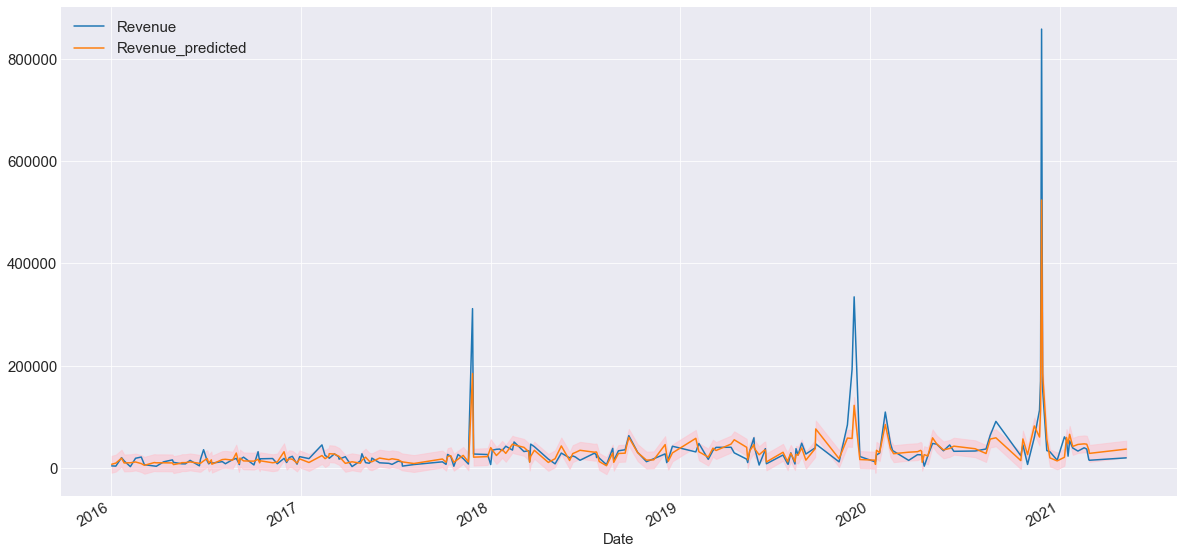

In [72]:
#Let's see the prediction
forecast_boost_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_boost, forecast_boost_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

#### XGB

In [73]:
#XGB
model_xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=13,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
#Model
model_xgb.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_xgb = predict_model(model_xgb, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_xgb = metric_rmse(forecast_xgb, "Revenue")
r2_xgb = r2_score(forecast_xgb["Revenue"], forecast_xgb["Revenue_predicted"])
print(f'XGB_train: {rmse_xgb}')
print(f'R²: {r2_xgb}')

XGB_train: 0.0038001915801838134
R²: 0.9999999999999836


In [ ]:
#Overfitting?

In [75]:
forecasts_xgb = cross_val_time_series(model_xgb, data_small, lags, 10, scaler= 'robust')

bias_xgb = time_series_score(forecasts_xgb, 'Revenue', 'bias')
variance_xgb = time_series_score(forecasts_xgb, 'Revenue', 'variance')
rmse_xgb = time_series_score(forecasts_xgb, 'Revenue', 'rmse')

error_xgb = pd.DataFrame([rmse_xgb, bias_xgb, variance_xgb], index= ['RMSE', 'Bias', 'Variance']).T

In [76]:
#Total Error
error_xgb['Total Error'] = pd.DataFrame(error_xgb['Bias'] ** 2 + error_xgb['Variance'])

In [77]:
error_xgb

RMSE         Bias  Variance   Total Error
0  23757.879136 -2518.133685  0.744409  6.340998e+06
1  31411.396417  2146.013128  0.723188  4.605373e+06
2  21914.148002 -1435.760084  0.843634  2.061408e+06
3  53838.237165  4706.125384  0.659104  2.214762e+07
4  12093.203728    -7.116294  0.835837  5.147748e+01
5  15271.112785  1110.458804  0.768639  1.233120e+06
6  15401.898494  1767.715458  0.665280  3.124819e+06
7  45815.272325  -661.183241  0.656919  4.371639e+05
8  41485.339856 -4620.446098  0.441299  2.134852e+07
9  32964.076389  2680.086905  0.700906  7.182867e+06

<AxesSubplot:>

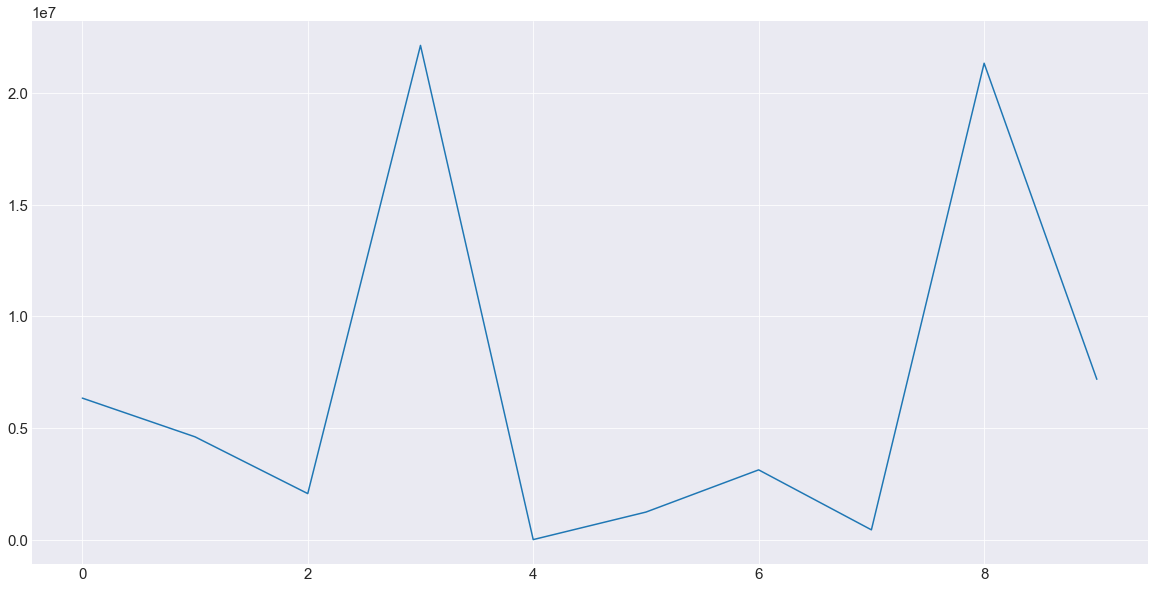

In [78]:
error_xgb['Total Error'].plot()

In [83]:
#Model
model_xgb.fit(X_train_scaled, y_train)

#Test Values
forecast_xgb_test = predict_model(model_xgb, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_xgb_test = metric_rmse(forecast_xgb_test, "Revenue")
r2_xgb_test = r2_score(forecast_xgb_test["Revenue"], forecast_xgb_test["Revenue_predicted"])
print(f'XGB_test: {rmse_xgb_test}')
print(f'R²: {r2_xgb_test}')

XGB_test: 34761.65358455191
R²: 0.7585679980206843


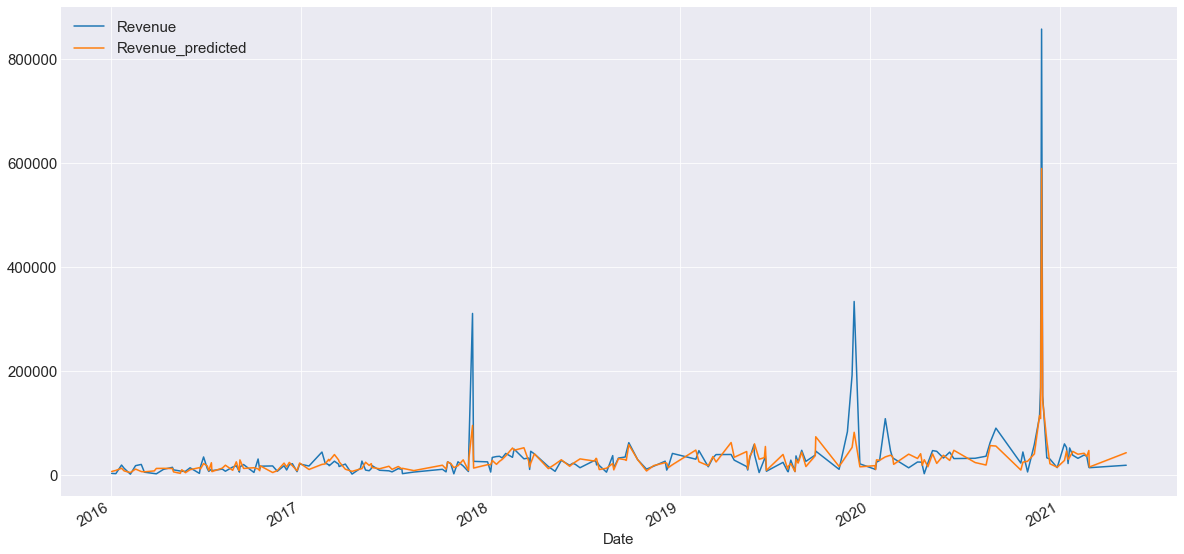

In [84]:
#Let's see the prediction
forecast_xgb_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_xgb, forecast_xgb_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

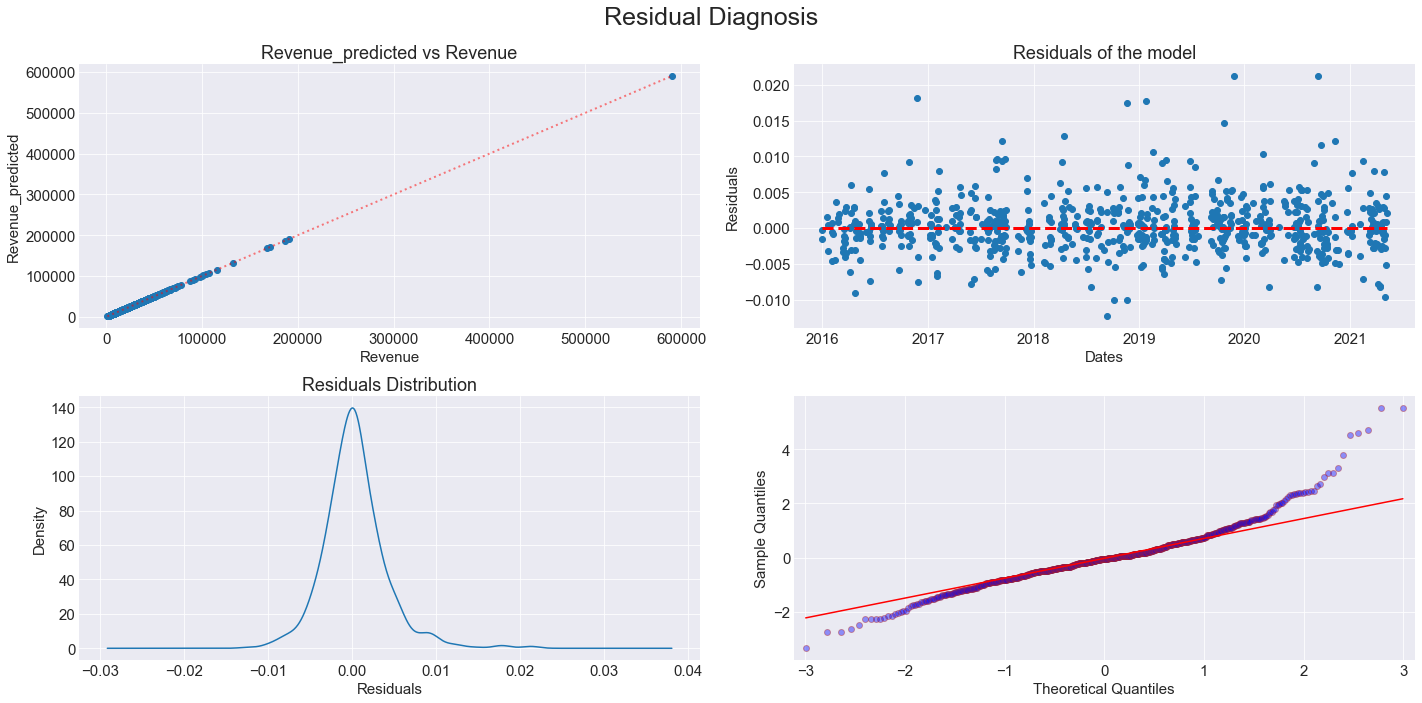

In [85]:
#Residual Analysis
draw_residuals_diagnosis(forecast_xgb, ['Revenue', 'Revenue_predicted', 'Residuals'])

#### LGBM

In [86]:
#LGBM
model_lgbm = LGBMRegressor(n_estimators=50)

In [87]:
#Model
model_lgbm.fit(X_train_scaled, y_train)

#Create the new DataFrame with the Train y values and Train predict values
forecast_lgbm = predict_model(model_lgbm, X_train_scaled, y_train)

#Calculate the RMSE and R²
rmse_lgbm = metric_rmse(forecast_lgbm, "Revenue")
r2_lgbm = r2_score(forecast_lgbm["Revenue"], forecast_lgbm["Revenue_predicted"])
print(f'LGBM_train: {rmse_lgbm}')
print(f'R²: {r2_lgbm}')

LGBM_train: 18327.00947729469
R²: 0.6189002518755717


In [88]:
#Test Values
forecast_lgbm_test = predict_model(model_lgbm, X_test_scaled, y_test)

#Calculate the RMSE and R²
rmse_lgbm_test = metric_rmse(forecast_lgbm_test, "Revenue")
r2_lgbm_test = r2_score(forecast_lgbm_test["Revenue"], forecast_lgbm_test["Revenue_predicted"])
print(f'LGBM_test: {rmse_lgbm_test}')
print(f'R²: {r2_lgbm_test}')

LGBM_test: 57043.87212273375
R²: 0.3498523812073646


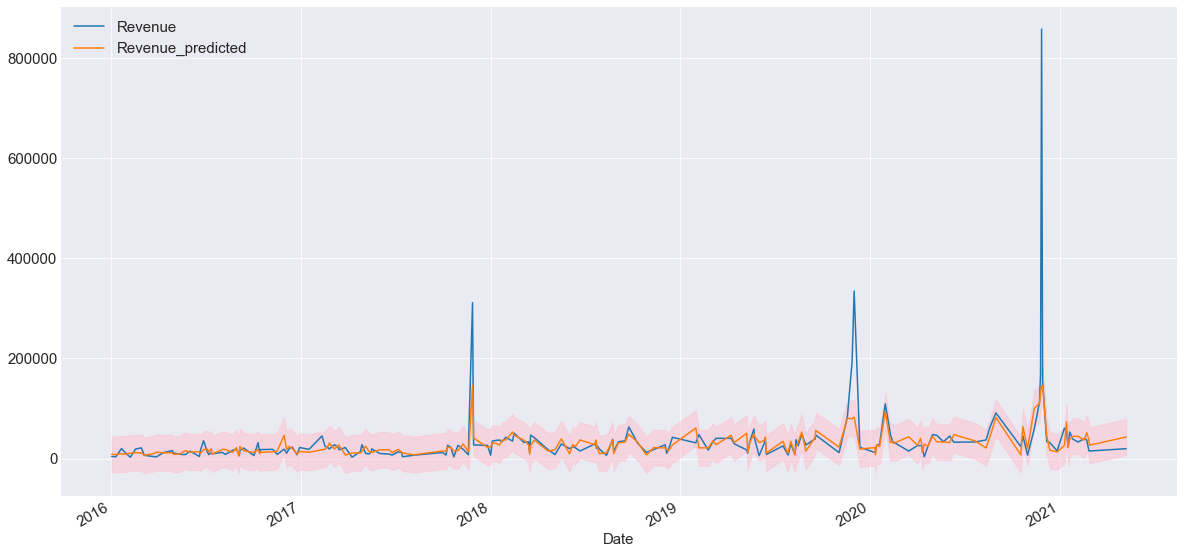

In [89]:
#Let's see the prediction
forecast_lgbm_test[['Revenue', 'Revenue_predicted']].plot()
#Get the confidence intervals
confidence_intervals = get_confidence_intervals(forecast_lgbm, forecast_lgbm_test, 'Revenue', '95%')
plt.fill_between(confidence_intervals.index, confidence_intervals['Revenue_lower'], 
                 confidence_intervals['Revenue_upper'], color= 'pink', alpha= 0.5)

### Models Comparison 

In [90]:
rmse_lgbm
rmse_xgb
rmse_random
rmse_boost
rmse_kn
rmse_elastic_net
rmse_ridge

14720.596503067534

In [194]:
rmse_models = {
    'Ridge': [rmse_ridge, rmse_ridge_test, r2_ridge],
    'Elastic Net': [rmse_elastic_net, rmse_elastic_net_test, r2_elastic_net],
    'K-Neighbors': [rmse_kn, rmse_kn_test, r2_kn],
    'Random Forest': [rmse_random, rmse_random_test, r2_random],
    'Gradient Boost': [rmse_boost, rmse_boost_test, r2_boost],
    'XGB': [rmse_xgb, rmse_xgb_test, r2_xgb],
    'LGBM': [rmse_lgbm, rmse_lgbm_test, r2_lgbm]
}

In [195]:
model_comparison = pd.DataFrame(rmse_models, index= ['RMSE', 'RMSE_Test', 'R2']).T

In [196]:
model_comparison

RMSE     RMSE_Test        R2
Ridge           14720.596503  29436.516417  0.754130
Elastic Net     16820.602259  35919.176386  0.678975
K-Neighbors         0.000000  57961.235018  1.000000
Random Forest    8009.366720  39669.676748  0.927213
Gradient Boost   8435.812014  33586.519598  0.919256
XGB                 0.003800  34761.653585  1.000000
LGBM            18327.009477  57043.872123  0.618900

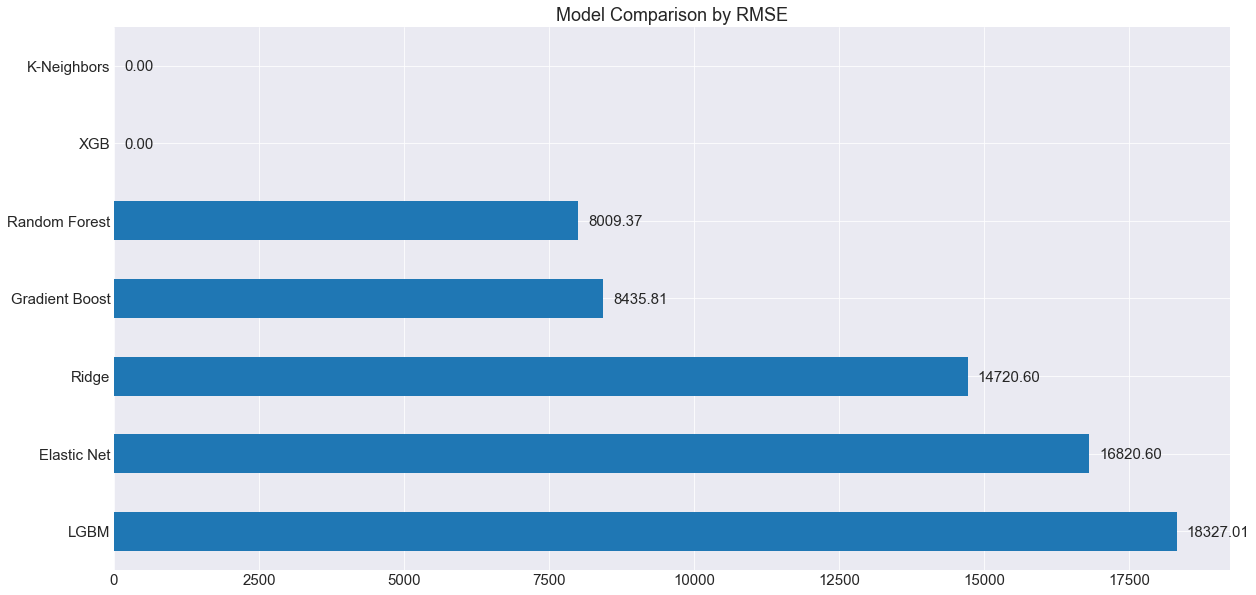

In [245]:
draw_barh(model_comparison, 'RMSE')

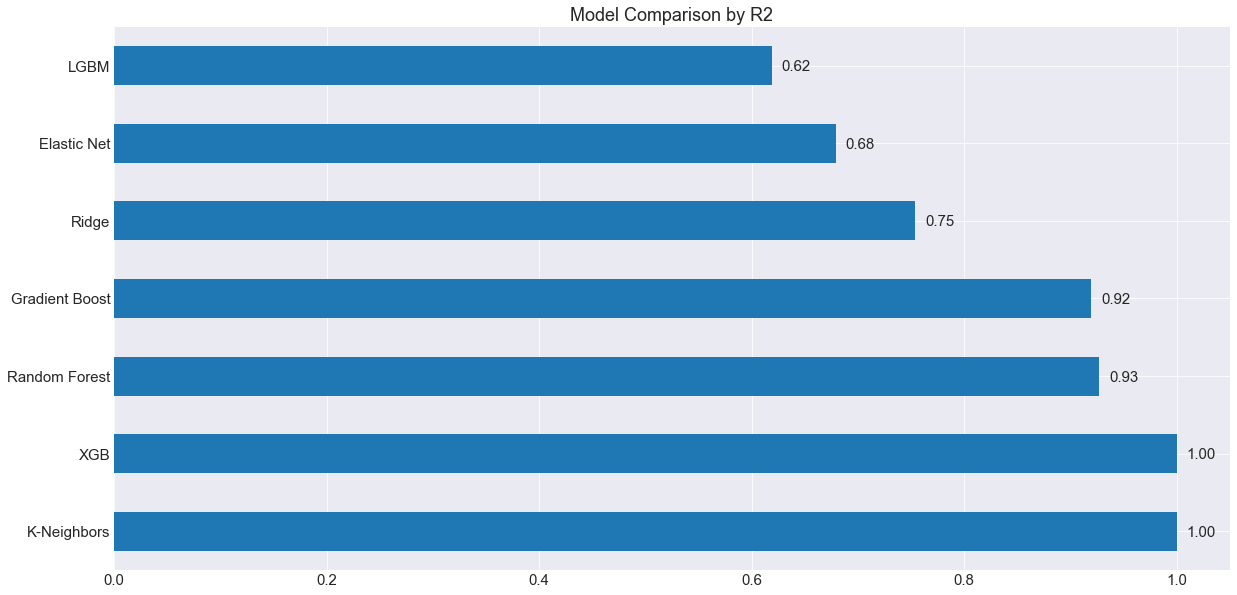

In [247]:
draw_barh(model_comparison, 'R2')

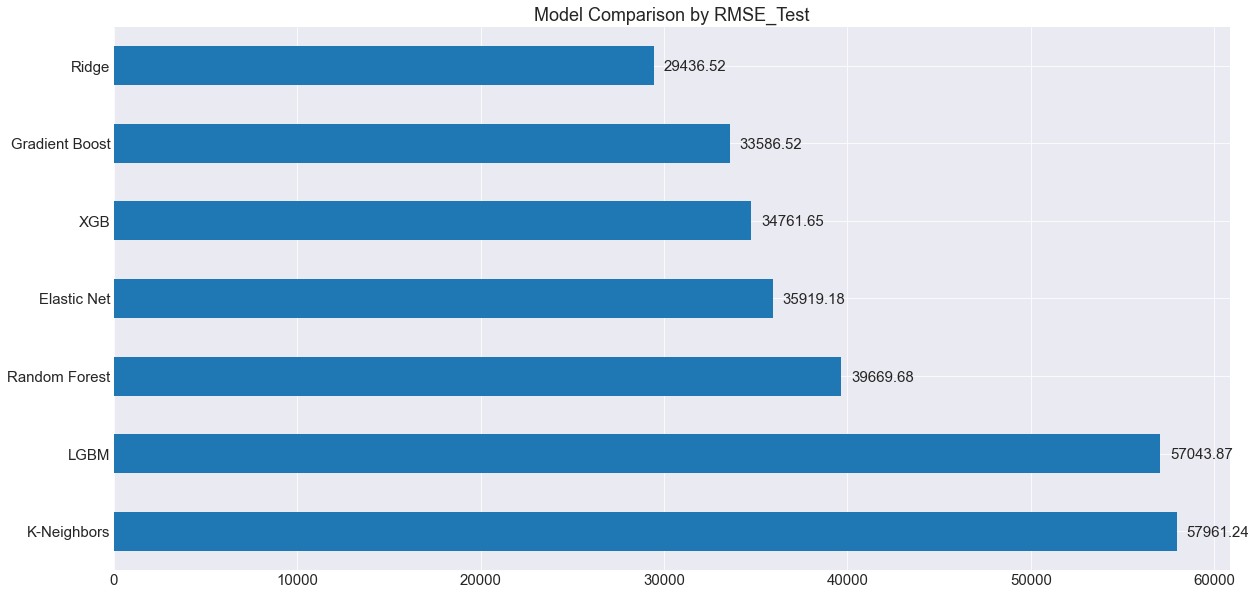

In [246]:
draw_barh(model_comparison, 'RMSE_Test')

In [ ]:
#Finally, let's predict T+1 using using the full set
#NO HAY QUE REVISAR TODOS LOS MODELOS

### Data Validation and Data Forecasting
We are going to concatenate the current Time Series Data with a longer file with more reals values and use this bigger model for checking how good or bad is woking the model

Moreover, we are going to create the last Data Set for Forecasting purposes. The idea is forecasting up to 7 days in advance.
We are going to add to the Data Validation Data Set a new one with the lagged, seasonal and exogenous features in order to try to estimate what will be the sales.

Some important assumptions. We need to trained 14 models for each forecast:
* model_trained_1: This will forecast T+1
* model_trained_2: This will forecast T+2
* And so on...

In [381]:
data_full = pd.concat([data_small, data_validation])

#All lagged features for forecasting - Period 7 days
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_full_forecast = prepare_data_forecast(data_full, 'Revenue', lags, 7)
data_full_forecast

Year_2021  Month_6  Day_14  Day_15  Day_16  Day_17  Day_18  \
2021-06-14          1        1       1       0       0       0       0   
2021-06-15          1        1       0       1       0       0       0   
2021-06-16          1        1       0       0       1       0       0   
2021-06-17          1        1       0       0       0       1       0   
2021-06-18          1        1       0       0       0       0       1   
2021-06-19          1        1       0       0       0       0       0   
2021-06-20          1        1       0       0       0       0       0   

            Day_19  Day_20  Black_Friday  Easter  Covid   Rev-364     Rev-7  \
2021-06-14       0       0             0       0      0  48735.52  44815.98   
2021-06-15       0       0             0       0      0  33745.33  21760.66   
2021-06-16       0       0             0       0      0  16913.21  74427.57   
2021-06-17       0       0             0       0      0  29435.16  47467.41   
2021-06-18       0       0             0       0      0  32517.81  38282.13   
2021-06-19       1       0             0       0      0  41321.59  44696.72   
2021-06-20       0       1             0       0      0  45465.30  55890.10   

               Rev-6     Rev-5     Rev-4     Rev-3     Rev-2     Rev-1  
2021-06-14  46716.35  47649.11  66938.46  53022.54  25079.69  27413.63  
2021-06-15  44815.98  46716.35  47649.11  66938.46  53022.54  25079.69  
2021-06-16  21760.66  44815.98  46716.35  47649.11  66938.46  53022.54  
2021-06-17  74427.57  21760.66  44815.98  46716.35  47649.11  66938.46  
2021-06-18  47467.41  74427.57  21760.66  44815.98  46716.35  47649.11  
2021-06-19  38282.13  47467.41  74427.57  21760.66  44815.98  46716.35  
2021-06-20  44696.72  38282.13  47467.41  74427.57  21760.66  44815.98

In [458]:
forecast_gradient = forecast_predict(data_full, 'Revenue', lags, 7, 'gradient', 'robust', '95%')
forecast_gradient

Revenue_forecast  Revenue_lower  Revenue_upper
2021-06-14      42575.176942   22341.903323   62808.450562
2021-06-15      44375.856671   25837.957310   62913.756031
2021-06-16      38088.173631   20278.863286   55897.483976
2021-06-17      32758.652846    9610.348893   55906.956798
2021-06-18      32081.682901   12819.656532   51343.709271
2021-06-19      28035.805609   10558.298713   45513.312505
2021-06-20      41824.269036   21065.827646   62582.710425

In [470]:
data_full_forecast_gradient = data_full[['Revenue']]
data_full_forecast_gradient = pd.concat([data_full_forecast_gradient, forecast_gradient])

In [471]:
data_full_forecast_gradient['Revenue_forecast'].loc[data_full.index[-1]] = \
data_full_forecast_gradient.loc[data_full.index[-1]]['Revenue']

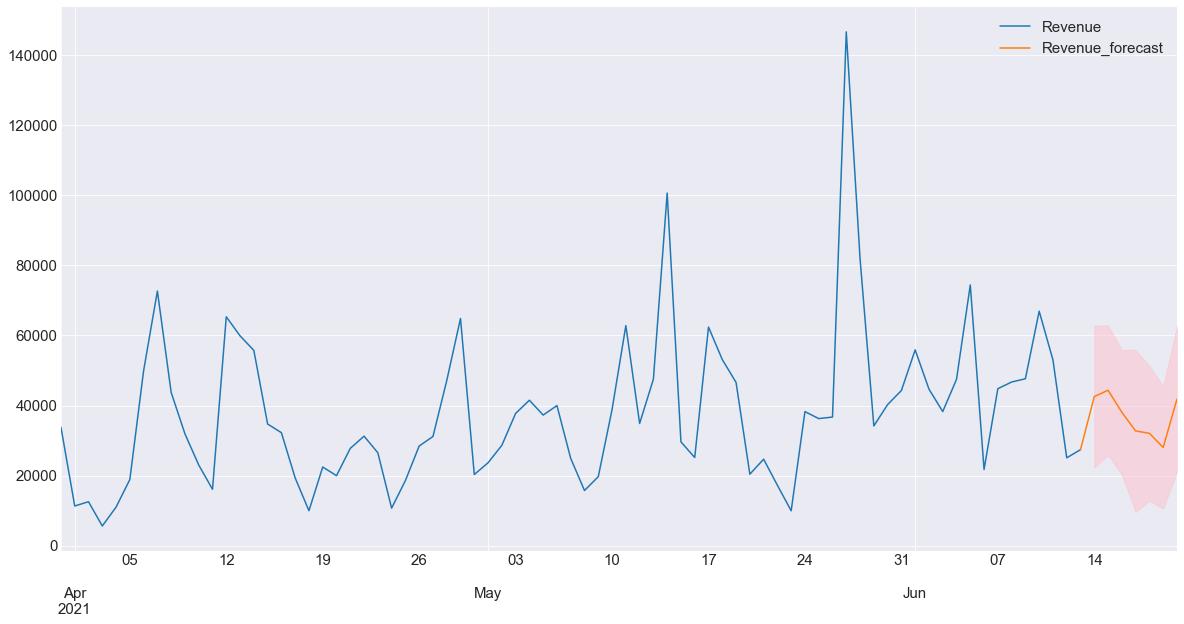

In [475]:
data_full_forecast_gradient.loc['2021-03-31':][['Revenue', 'Revenue_forecast']].plot()
plt.fill_between(data_full_forecast_gradient.index, data_full_forecast_gradient['Revenue_lower'],
                 data_full_forecast_gradient['Revenue_upper'], color='pink', alpha=0.5)

<AxesSubplot:>

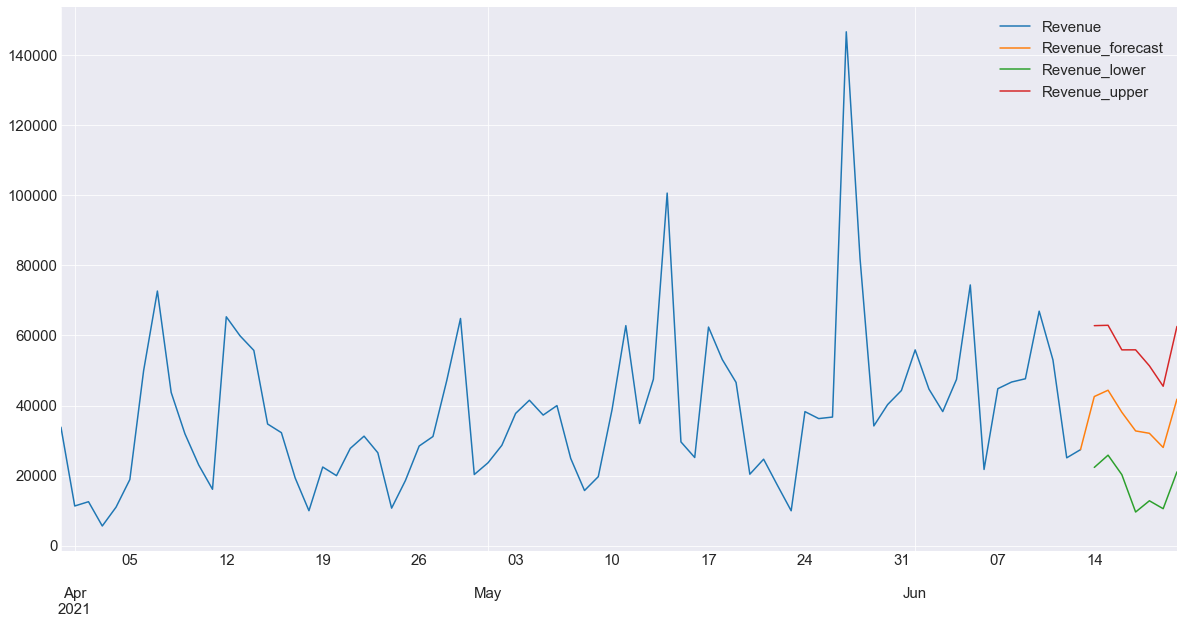

In [ ]:
seasonal_full = prepare_seasonal_data(data_full)
seasonal_full

In [387]:
#We have the data ready for making the forecast
data_forecast_full = pd.concat([seasonal_full, data_full_forecast]).fillna(0, downcast= 'infer')
data_forecast_full

Year_2015  Year_2016  Year_2017  Year_2018  Year_2019  Year_2020  \
2015-01-01          1          0          0          0          0          0   
2015-01-02          1          0          0          0          0          0   
2015-01-03          1          0          0          0          0          0   
2015-01-04          1          0          0          0          0          0   
2015-01-05          1          0          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
2021-06-16          0          0          0          0          0          0   
2021-06-17          0          0          0          0          0          0   
2021-06-18          0          0          0          0          0          0   
2021-06-19          0          0          0          0          0          0   
2021-06-20          0          0          0          0          0          0   

            Year_2021  Month_1  Month_10  Month_11  Month_12  Month_2  \
2015-01-01          0        1         0         0         0        0   
2015-01-02          0        1         0         0         0        0   
2015-01-03          0        1         0         0         0        0   
2015-01-04          0        1         0         0         0        0   
2015-01-05          0        1         0         0         0        0   
...               ...      ...       ...       ...       ...      ...   
2021-06-16          1        0         0         0         0        0   
2021-06-17          1        0         0         0         0        0   
2021-06-18          1        0         0         0         0        0   
2021-06-19          1        0         0         0         0        0   
2021-06-20          1        0         0         0         0        0   

            Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
2015-01-01        0        0        0        0        0        0        0   
2015-01-02        0        0        0        0        0        0        0   
2015-01-03        0        0        0        0        0        0        0   
2015-01-04        0        0        0        0        0        0        0   
2015-01-05        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-06-16        0        0        0        1        0        0        0   
2021-06-17        0        0        0        1        0        0        0   
2021-06-18        0        0        0        1        0        0        0   
2021-06-19        0        0        0        1        0        0        0   
2021-06-20        0        0        0        1        0        0        0   

            Day_1  Day_10  Day_11  Day_12  Day_13  Day_14  Day_15  Day_16  \
2015-01-01      1       0       0       0       0       0       0       0   
2015-01-02      0       0       0       0       0       0       0       0   
2015-01-03      0       0       0       0       0       0       0       0   
2015-01-04      0       0       0       0       0       0       0       0   
2015-01-05      0       0       0       0       0       0       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2021-06-16      0       0       0       0       0       0       0       1   
2021-06-17      0       0       0       0       0       0       0       0   
2021-06-18      0       0       0       0       0       0       0       0   
2021-06-19      0       0       0       0       0       0       0       0   
2021-06-20      0       0       0       0       0       0       0       0   

            Day_17  Day_18  Day_19  Day_2  Day_20  Day_21  Day_22  Day_23  \
2015-01-01       0       0       0      0       0       0       0       0   
2015-01-02       0       0       0      1       0       0       0       0   
2015-01-03       0       0       0      0       0       0       0       0   
2015-01-04      

In [280]:
#Data Set Ready for Forecasting
data_forecast_full = pd.concat([data_model_full, data_forecast]).fillna(0, downcast= 'infer')
data_forecast_full

Year_2015  Year_2016  Year_2017  Year_2018  Year_2019  Year_2020  \
2015-12-31          1          0          0          0          0          0   
2016-01-01          0          1          0          0          0          0   
2016-01-02          0          1          0          0          0          0   
2016-01-03          0          1          0          0          0          0   
2016-01-04          0          1          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
2021-06-16          0          0          0          0          0          0   
2021-06-17          0          0          0          0          0          0   
2021-06-18          0          0          0          0          0          0   
2021-06-19          0          0          0          0          0          0   
2021-06-20          0          0          0          0          0          0   

            Year_2021  Month_1  Month_10  Month_11  Month_12  Month_2  \
2015-12-31          0        0         0         0         1        0   
2016-01-01          0        1         0         0         0        0   
2016-01-02          0        1         0         0         0        0   
2016-01-03          0        1         0         0         0        0   
2016-01-04          0        1         0         0         0        0   
...               ...      ...       ...       ...       ...      ...   
2021-06-16          1        0         0         0         0        0   
2021-06-17          1        0         0         0         0        0   
2021-06-18          1        0         0         0         0        0   
2021-06-19          1        0         0         0         0        0   
2021-06-20          1        0         0         0         0        0   

            Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
2015-12-31        0        0        0        0        0        0        0   
2016-01-01        0        0        0        0        0        0        0   
2016-01-02        0        0        0        0        0        0        0   
2016-01-03        0        0        0        0        0        0        0   
2016-01-04        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-06-16        0        0        0        1        0        0        0   
2021-06-17        0        0        0        1        0        0        0   
2021-06-18        0        0        0        1        0        0        0   
2021-06-19        0        0        0        1        0        0        0   
2021-06-20        0        0        0        1        0        0        0   

            Day_1  Day_10  Day_11  Day_12  Day_13  Day_14  Day_15  Day_16  \
2015-12-31      0       0       0       0       0       0       0       0   
2016-01-01      1       0       0       0       0       0       0       0   
2016-01-02      0       0       0       0       0       0       0       0   
2016-01-03      0       0       0       0       0       0       0       0   
2016-01-04      0       0       0       0       0       0       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2021-06-16      0       0       0       0       0       0       0       1   
2021-06-17      0       0       0       0       0       0       0       0   
2021-06-18      0       0       0       0       0       0       0       0   
2021-06-19      0       0       0       0       0       0       0       0   
2021-06-20      0       0       0       0       0       0       0       0   

            Day_17  Day_18  Day_19  Day_2  Day_20  Day_21  Day_22  Day_23  \
2015-12-31       0       0       0      0       0       0       0       0   
2016-01-01       0       0       0      0       0       0       0       0   
2016-01-02       0       0       0      1       0       0       0       0   
2016-01-03      

In [ ]:
lags = [1, 2, 3, 4, 5, 6, 7, 364]
data_lag_full = get_lag_features(data_full, 'Revenue', lags)
#Create Seasonal Features - I am transforming as if they were non-numeric variables
data_seasonal_full = pd.get_dummies(data_full[['Year', 'Month', 'Day']].astype('str'))
#Create Exogenus Features
data_exogenous_full = get_exogenous_features(data_full)[['Black_Friday', 'Easter', 'Covid']]
#Create the model to Train and Test with the different Machine Learning models
data_model_full = pd.concat([data_seasonal_full, data_exogenous_full, data_lag_full, 
                                   data_full['Revenue']], axis= 1)
data_model_full.dropna(inplace= True)

In [439]:
data= data_full
column = 'Revenue'
period = 7
data_forecast = prepare_data_forecast(data, column, lags, period)
seasonal_forecast = prepare_seasonal_data(data)
#data_forecast = pd.concat([seasonal_forecast, data_forecast, data[column]], axis= 1).fillna(0, downcast= 'infer')

In [451]:
prueba = pd.concat([seasonal_forecast, data_forecast])
prueba = pd.concat([prueba, data[column]], axis= 1).fillna(0, downcast= 'infer')
prueba

Year_2015  Year_2016  Year_2017  Year_2018  Year_2019  Year_2020  \
2015-01-01          1          0          0          0          0          0   
2015-01-02          1          0          0          0          0          0   
2015-01-03          1          0          0          0          0          0   
2015-01-04          1          0          0          0          0          0   
2015-01-05          1          0          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
2021-06-16          0          0          0          0          0          0   
2021-06-17          0          0          0          0          0          0   
2021-06-18          0          0          0          0          0          0   
2021-06-19          0          0          0          0          0          0   
2021-06-20          0          0          0          0          0          0   

            Year_2021  Month_1  Month_10  Month_11  Month_12  Month_2  \
2015-01-01          0        1         0         0         0        0   
2015-01-02          0        1         0         0         0        0   
2015-01-03          0        1         0         0         0        0   
2015-01-04          0        1         0         0         0        0   
2015-01-05          0        1         0         0         0        0   
...               ...      ...       ...       ...       ...      ...   
2021-06-16          1        0         0         0         0        0   
2021-06-17          1        0         0         0         0        0   
2021-06-18          1        0         0         0         0        0   
2021-06-19          1        0         0         0         0        0   
2021-06-20          1        0         0         0         0        0   

            Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
2015-01-01        0        0        0        0        0        0        0   
2015-01-02        0        0        0        0        0        0        0   
2015-01-03        0        0        0        0        0        0        0   
2015-01-04        0        0        0        0        0        0        0   
2015-01-05        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-06-16        0        0        0        1        0        0        0   
2021-06-17        0        0        0        1        0        0        0   
2021-06-18        0        0        0        1        0        0        0   
2021-06-19        0        0        0        1        0        0        0   
2021-06-20        0        0        0        1        0        0        0   

            Day_1  Day_10  Day_11  Day_12  Day_13  Day_14  Day_15  Day_16  \
2015-01-01      1       0       0       0       0       0       0       0   
2015-01-02      0       0       0       0       0       0       0       0   
2015-01-03      0       0       0       0       0       0       0       0   
2015-01-04      0       0       0       0       0       0       0       0   
2015-01-05      0       0       0       0       0       0       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2021-06-16      0       0       0       0       0       0       0       1   
2021-06-17      0       0       0       0       0       0       0       0   
2021-06-18      0       0       0       0       0       0       0       0   
2021-06-19      0       0       0       0       0       0       0       0   
2021-06-20      0       0       0       0       0       0       0       0   

            Day_17  Day_18  Day_19  Day_2  Day_20  Day_21  Day_22  Day_23  \
2015-01-01       0       0       0      0       0       0       0       0   
2015-01-02       0       0       0      1       0       0       0       0   
2015-01-03       0       0       0      0       0       0       0       0   
2015-01-04      

In [428]:
data_model_full

Year_2015  Year_2016  Year_2017  Year_2018  Year_2019  Year_2020  \
Date                                                                           
2015-12-31          1          0          0          0          0          0   
2016-01-01          0          1          0          0          0          0   
2016-01-02          0          1          0          0          0          0   
2016-01-03          0          1          0          0          0          0   
2016-01-04          0          1          0          0          0          0   
...               ...        ...        ...        ...        ...        ...   
2021-06-09          0          0          0          0          0          0   
2021-06-10          0          0          0          0          0          0   
2021-06-11          0          0          0          0          0          0   
2021-06-12          0          0          0          0          0          0   
2021-06-13          0          0          0          0          0          0   

            Year_2021  Month_1  Month_10  Month_11  Month_12  Month_2  \
Date                                                                    
2015-12-31          0        0         0         0         1        0   
2016-01-01          0        1         0         0         0        0   
2016-01-02          0        1         0         0         0        0   
2016-01-03          0        1         0         0         0        0   
2016-01-04          0        1         0         0         0        0   
...               ...      ...       ...       ...       ...      ...   
2021-06-09          1        0         0         0         0        0   
2021-06-10          1        0         0         0         0        0   
2021-06-11          1        0         0         0         0        0   
2021-06-12          1        0         0         0         0        0   
2021-06-13          1        0         0         0         0        0   

            Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  Month_9  \
Date                                                                        
2015-12-31        0        0        0        0        0        0        0   
2016-01-01        0        0        0        0        0        0        0   
2016-01-02        0        0        0        0        0        0        0   
2016-01-03        0        0        0        0        0        0        0   
2016-01-04        0        0        0        0        0        0        0   
...             ...      ...      ...      ...      ...      ...      ...   
2021-06-09        0        0        0        1        0        0        0   
2021-06-10        0        0        0        1        0        0        0   
2021-06-11        0        0        0        1        0        0        0   
2021-06-12        0        0        0        1        0        0        0   
2021-06-13        0        0        0        1        0        0        0   

            Day_1  Day_10  Day_11  Day_12  Day_13  Day_14  Day_15  Day_16  \
Date                                                                        
2015-12-31      0       0       0       0       0       0       0       0   
2016-01-01      1       0       0       0       0       0       0       0   
2016-01-02      0       0       0       0       0       0       0       0   
2016-01-03      0       0       0       0       0       0       0       0   
2016-01-04      0       0       0       0       0       0       0       0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2021-06-09      0       0       0       0       0       0       0       0   
2021-06-10      0       1       0       0       0       0       0       0   
2021-06-11      0       0       1       0       0       0       0       0   
2021-06-12      0       0       0       1       0       0       0       0   
2021-06-13      0       0       0       0       1       0       0       0   

            Day_1

In [378]:
def prepare_data_forecast(data, column, lags, period):
    
    #All lagged features for forecasting - Period ?
    data_lag_forecast = get_lag_features_forecast(data, 'Revenue', lags, period)
    
    #All new season features needed also for exogenous calculation
    seasonal_forecast = get_dataindex_forecast(data, period)
    #All new season features needed also for exogenous calculation
    data_se_forecast = prepare_seasonal_data(seasonal_forecast)
    
    #Data Set Ready for Forecasting
    data_forecast = pd.concat([data_se_forecast, data_lag_forecast], axis= 1)
    
    return data_forecast

In [358]:
def prepare_seasonal_data(seasonal):

    #Create Seasonal Features - I am transforming as if they were non-numeric variables
    data_seasonal = pd.get_dummies(seasonal[['Year', 'Month', 'Day']].astype('str'))
    #Create Exogenus Features
    data_exogenous = get_exogenous_features(seasonal)[['Black_Friday', 'Easter', 'Covid']]
    #Create the model to Train and Test with the different Machine Learning models
    data_se = pd.concat([data_seasonal, data_exogenous], axis= 1)
    
    return data_se

In [357]:
def prepare_data(data, column, lags):
    
    #All lagged features
    data_lag = get_lag_features(data, column, lags)
    
    #All new season features needed also for exogenous calculation
    data_se = prepare_seasonal_data(data)
    
    data_model = pd.concat([data_se, data_lag, data[column]], axis= 1)
    data_model.dropna(inplace= True)
    
    return data_model

In [392]:
data_full.iloc[:,-1]

Date
2015-01-01     3244.55
2015-01-02     4791.64
2015-01-03      534.93
2015-01-04      848.43
2015-01-05     2393.52
                ...   
2021-06-09    47649.11
2021-06-10    66938.46
2021-06-11    53022.54
2021-06-12    25079.69
2021-06-13    27413.63
Freq: D, Name: Revenue, Length: 2356, dtype: float64

In [476]:
#Predict the future base on previous data
def forecast_predict(data, column, lags, period, ml_model, scale_param= 'robust', confidence= '95%'):
    """
    DESCRIPTION
      This returns the a forecast and the intervals of confidence based on a period
    ARGUMENTS
      regressor: This is the estimator to fit the data
      regressor_params: All the hyperparameters to try for a specific model
      data: DataFrame with the original Time Series
      data_forecast:
      column: Target column name
      lags: List with the lagged features
      fold: Number of splits, minumun 2. By default we are picking the 90%/10% which is fold= 10
      metric: It could be 'rmse', 'bias', 'variance'
      scaler: Type of normalization - By default RobustScaler
       'norm': StandarScaler
       'robust': RobustScaler
       'power': PowerTransformer
    RETURN
      models_list: A list with the model with all tested parameters
      metrics_list: A list with all different metric values per model tested
      forecasts_list: A list with the trained model with the target and predicted value in case we want to check Residuals
    """
    
    #Convert list lags into arrays lags for manipulation
    lags_a = np.array(lags)
    #Prepare the scaler
    scaler = get_scaler(scale_param)
    #Forecast to return
    forecast = pd.DataFrame()
    #Confidence intervals
    intervals = pd.DataFrame()
    #Get the machine learning to train and use for forecasting
    model = get_ml_model(ml_model)
    #Index for the forecast - period would be same as lags
    index_range = create_date_range([data.index[-1] + pd.to_timedelta(1, 'D')], 'D', period)
    
    #Need to prepare the data for forecasting. We need to merge the set for prediction because there are
    #Some dummies which are not available. Mainly the seasonal and exogenous features
    data_forecast = prepare_data_forecast(data, column, lags, period)
    seasonal_forecast = prepare_seasonal_data(data)
    #Need to concatenate by rows and then by columns
    temp_forecast = pd.concat([seasonal_forecast, data_forecast])
    data_forecast = pd.concat([temp_forecast, data[column]], axis= 1).fillna(0, downcast= 'infer')
    
    #Therefore, we will have the forecast with all features needed otherwise, there will be missing some
    #due to we use categorical ones for dates
    
    #For each lag, we need to create a new model with the new lagged features
    for i in range(period):
        #Let's start from i=0 means lag T-lags list -1, -2, and so on
        #from i=1 means lag T-lags array -1-1=T-2, -2-1=T-3 and so on 
        lag = lags_a + i
        
        #--Begin Training the model
        #Prepare the data for training
        data_model = prepare_data(data, column, lag)
        
        #Train and Test Split. However, we are not going to use Test
        X_train, X_test, y_train, y_test = time_series_train_test_split(data_model, lag)
        
        #Train the scaler with the X_train data
        scaler.fit(X_train)
        #Scale just Train
        X_train_scaled = scaler.transform(X_train)
        
        #Apply the fit to regressor
        model.fit(X_train_scaled, y_train)
        
        #Revenue, Predicted and Residuals. This is for creating the Confidence Intervals
        predict_train = predict_model(model, X_train_scaled, y_train)
        #Calculate the Standard Deviation
        std = predict_train['Residuals'].std()
        ##--End Training the model
        
        #Start with the prediction
        #Pick the <i> position value to forecast and so on and apply the scaler
        X_forecast = data_forecast.loc[index_range[0][i]][:-1]
        X_forecast = np.array(X_forecast).reshape(1, -1)
        X_forecast_scaled = scaler.transform(X_forecast)
        #Predict
        y_forecast = model.predict(X_forecast_scaled)
        
        #Prepare the Series with the Index=Date and Column=Revenue_forecast
        #y_forecast[0] because it is an array
        y_forecast_serie = pd.Series(y_forecast[0], index= [index_range[0][i]])
        y_forecast_serie = y_forecast_serie.rename(f'{column}_forecast')
        
        #Now prepare the Confidence Intervals
        lower = y_forecast - get_confidence(confidence) * std
        upper = y_forecast + get_confidence(confidence) * std
        
        y_lower_serie = pd.Series(lower, index= [index_range[0][i]])
        y_lower_serie = y_lower_serie.rename(f'{column}_lower')
        
        y_upper_serie = pd.Series(upper, index= [index_range[0][i]])
        y_upper_serie = y_upper_serie.rename(f'{column}_upper')
        
        #Add the Series to the final Forecast DataFrame
        forecast = pd.concat([forecast, y_forecast_serie.to_frame()])
        #Add the Confidence Intervals
        intervals = pd.concat([intervals, pd.concat([y_lower_serie.to_frame(), y_upper_serie.to_frame()], axis= 1)])
    
    
    #Return the final DataFrame
    return pd.concat([forecast, intervals], axis= 1)

In [158]:
lower = list()
upper = list()
for i in range(len(model_boost_train_list)):
    std = model_boost_train_list[i]['Residuals'].std()
    value = final.iloc[i]['Revenue_forecast']
    lower.append(value - 1.96 * std)
    upper.append(value + 1.96 * std)

In [159]:
lower = pd.DataFrame(lower, index= final.index, columns= ['Revenue_lower'])
upper = pd.DataFrame(upper, index= final.index, columns= ['Revenue_upper'])

In [163]:
confidence_intervals = pd.concat([final, lower, upper], axis= 1)

In [168]:
final

Revenue_forecast
2021-06-14      24890.307869
2021-06-15      38128.592662
2021-06-16      30314.220988
2021-06-17      27857.595682
2021-06-18      30578.352667
2021-06-19      24872.526767
2021-06-20      32873.265773

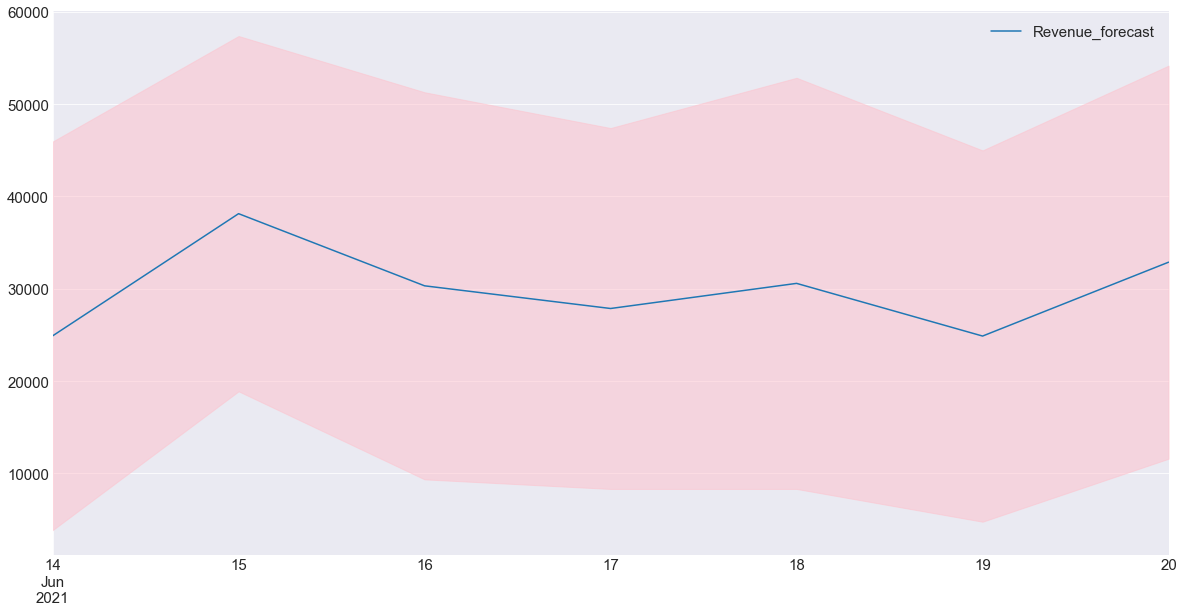

In [294]:
confidence_intervals[['Revenue_forecast']].plot()
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[1]],
                 confidence_intervals[confidence_intervals.columns[2]], color='pink', alpha=0.5)

In [119]:
final

Revenue_forecast
2021-06-14      24890.307869
2021-06-15      38128.592662
2021-06-16      30314.220988
2021-06-17      27857.595682
2021-06-18      30578.352667
2021-06-19      24872.526767
2021-06-20      32873.265773

In [93]:
model_boost_train_list[0]['Residuals'].std()

10493.350696754278

In [97]:
final['Revenue_lower'] = final['Revenue_forecast'] - 1.96 * model_boost_train_list[0]['Residuals'].std()

In [ ]:
    #Let's copy the model with the target and predict columns
    intervals = forecast_test.copy()
    #Get the 95% confidence interval - https://otexts.com/fpp2/prediction-intervals.html
    #From train model, calculate the std of the residuals
    intervals['Residuals_std'] = confidence[ratio] * forecast_train['Residuals'].std()
    #Calculate the lower and upper range
    intervals[f'{column}_lower'] = intervals[f'{column}_predicted'] - intervals['Residuals_std']
    intervals[f'{column}_upper'] = intervals[f'{column}_predicted'] + intervals['Residuals_std']

In [98]:
final

Revenue_forecast  Revenue_lower
2021-06-14      33598.540313   13031.572947
2021-06-15      37704.696978   17137.729612
2021-06-16      31060.129381   10493.162015
2021-06-17      32205.522752   11638.555386
2021-06-18      33350.345632   12783.378267
2021-06-19      35303.931248   14736.963882
2021-06-20      37422.469095   16855.501730

In [62]:
data_full_new = data_full[['Revenue']]

In [63]:
data_full_new = pd.concat([data_full_new, final])

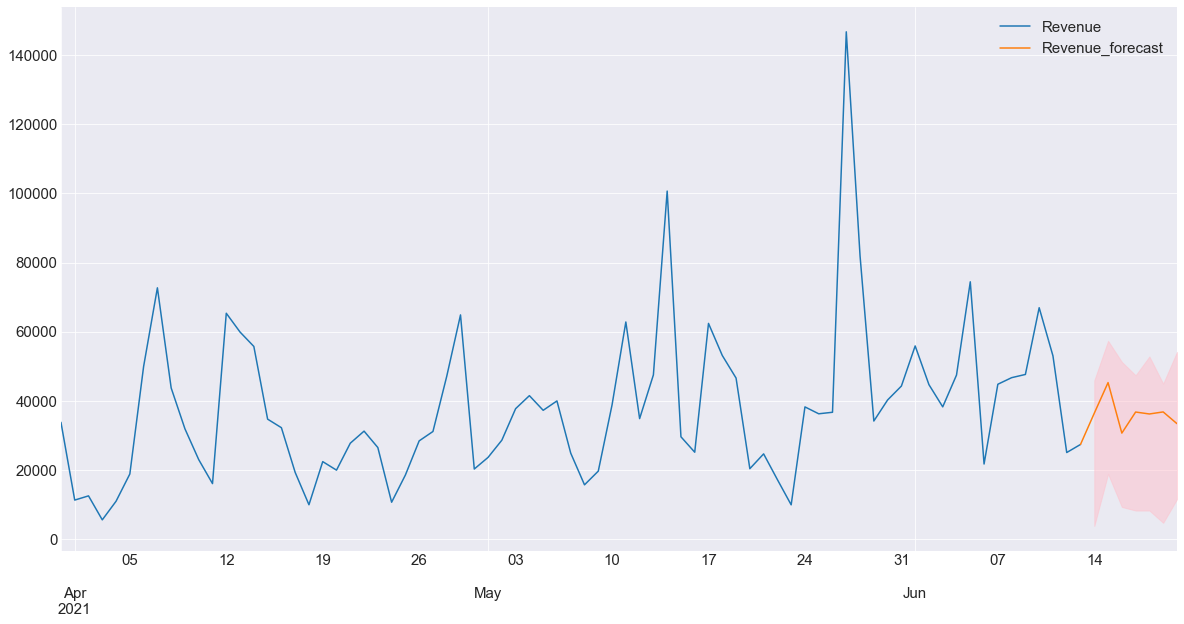

In [173]:
data_full_new.loc['2021-03-31':].plot()
plt.fill_between(confidence_intervals.index, confidence_intervals[confidence_intervals.columns[1]],
                 confidence_intervals[confidence_intervals.columns[2]], color='pink', alpha=0.5)

In [74]:
data_full_new = data_full[['Revenue']]

In [ ]:
data_full_new = pd.concat([data_full_new, final])

In [83]:
data_full_new['Revenue_forecast'].loc['2021-06-13'] = data_full_new['Revenue'].loc['2021-06-13']

In [84]:
data_full_new.tail(20)

Revenue  Revenue_forecast
2021-06-01  55890.10               NaN
2021-06-02  44696.72               NaN
2021-06-03  38282.13               NaN
2021-06-04  47467.41               NaN
2021-06-05  74427.57               NaN
2021-06-06  21760.66               NaN
2021-06-07  44815.98               NaN
2021-06-08  46716.35               NaN
2021-06-09  47649.11               NaN
2021-06-10  66938.46               NaN
2021-06-11  53022.54               NaN
2021-06-12  25079.69               NaN
2021-06-13  27413.63      27413.630000
2021-06-14       NaN      36448.303508
2021-06-15       NaN      45299.183420
2021-06-16       NaN      30695.032586
2021-06-17       NaN      36785.097945
2021-06-18       NaN      36224.180054
2021-06-19       NaN      36817.178859
2021-06-20       NaN      33429.966347

<AxesSubplot:>

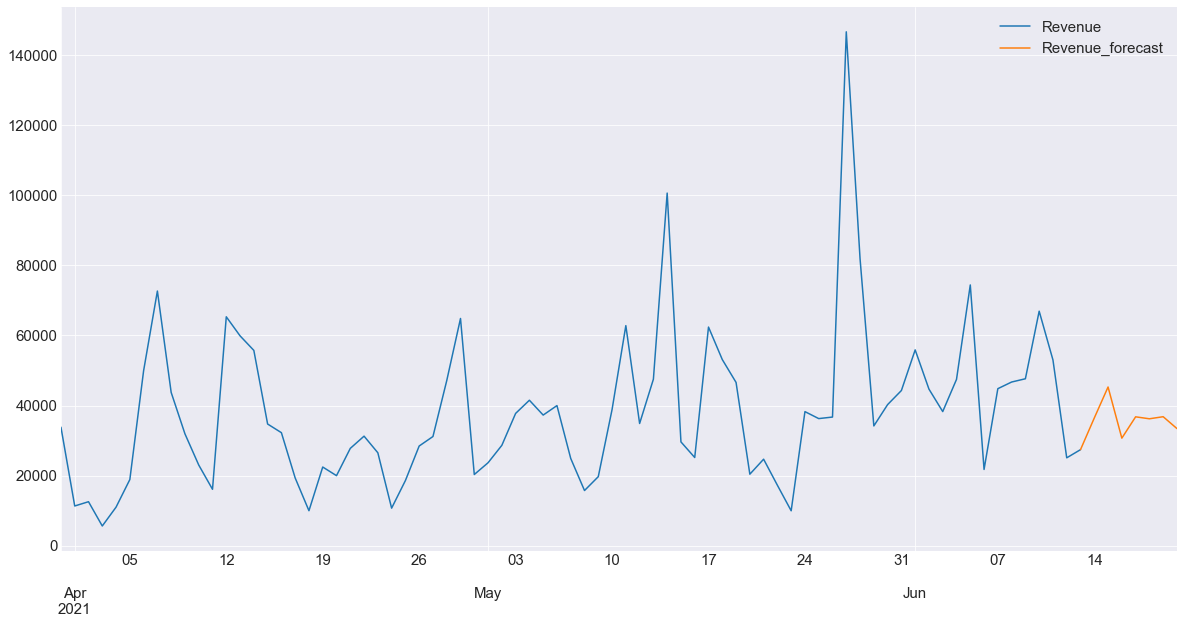

In [85]:
data_full_new.loc['2021-03-31':].plot()

In [375]:
data_full_new.tail(20)

Revenue  Revenue_forecast
2021-06-01  55890.10               NaN
2021-06-02  44696.72               NaN
2021-06-03  38282.13               NaN
2021-06-04  47467.41               NaN
2021-06-05  74427.57               NaN
2021-06-06  21760.66               NaN
2021-06-07  44815.98               NaN
2021-06-08  46716.35               NaN
2021-06-09  47649.11               NaN
2021-06-10  66938.46               NaN
2021-06-11  53022.54               NaN
2021-06-12  25079.69               NaN
2021-06-13  27413.63               NaN
2021-06-14       NaN      37417.005653
2021-06-15       NaN      30923.186942
2021-06-16       NaN      34503.034758
2021-06-17       NaN      29595.291510
2021-06-18       NaN      22777.242077
2021-06-19       NaN      33329.908120
2021-06-20       NaN      35289.739793

In [329]:
ww = pd.Series(forecast_predict[0], index= [index_range[0][0]])
ww = ww.rename('Revenue')

In [324]:
qq = pd.DataFrame()


In [330]:
pd.DataFrame(ww)

Revenue
2021-06-14  34671.232379

In [313]:
forecast_predict[0]

34671.2323793546

In [314]:
index_range[0][0]

Timestamp('2021-06-14 00:00:00')

In [308]:
forecast_predict

[34671.2323793546,
 37771.48403562846,
 44216.05204702566,
 37774.3520951329,
 39306.634380720076,
 38682.699108704066,
 38404.01445619649]

In [306]:
index_range = create_date_range([data_full.index[-1] + pd.to_timedelta(1, 'D')], 'D', 7)

for i in index_range[0]:
    X_forecast = data_forecast_full.loc[index_range[0][0]][:-1]
    
    X_forecast = np.array(X_forecast).reshape(1, -1)
    
    X_forecast_scaled = scaler.transform(X_forecast)

    y_forecast_predict = trained_model_list[0].predict(X_forecast_scaled)

2021-06-14 00:00:00
2021-06-15 00:00:00
2021-06-16 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-19 00:00:00
2021-06-20 00:00:00


In [268]:
index_range = create_date_range([data_full.index[-1] + pd.to_timedelta(1, 'D')], 'D', 7)

In [273]:
data_forecast_full.loc[index_range[0][0]][:-1]

Year_2015           0.00
Year_2016           0.00
Year_2017           0.00
Year_2018           0.00
Year_2019           0.00
Year_2020           0.00
Year_2021           1.00
Month_1             0.00
Month_10            0.00
Month_11            0.00
Month_12            0.00
Month_2             0.00
Month_3             0.00
Month_4             0.00
Month_5             0.00
Month_6             1.00
Month_7             0.00
Month_8             0.00
Month_9             0.00
Day_1               0.00
Day_10              0.00
Day_11              0.00
Day_12              0.00
Day_13              0.00
Day_14              1.00
Day_15              0.00
Day_16              0.00
Day_17              0.00
Day_18              0.00
Day_19              0.00
Day_2               0.00
Day_20              0.00
Day_21              0.00
Day_22              0.00
Day_23              0.00
Day_24              0.00
Day_25              0.00
Day_26              0.00
Day_27              0.00
Day_28              0.00


In [289]:
X_forecast = data_forecast_full.loc[index_range[0][0]][:-1]

In [293]:
X_forecast = np.array(X_forecast).reshape(1, -1)

In [295]:
X_forecast_scaled = scaler.transform(X_forecast)
y_train = 0

In [300]:
y_predict = trained_model_list[0].predict(X_forecast_scaled)

In [304]:
y_predict[0]

35110.64162195876

In [297]:
#Create the new DataFrame with the Train y values and Train predict values
forecast_boost = predict_model(trained_model_list[0], X_forecast_scaled, y_train)

ValueError: Length of passed values is 1, index implies 750.

In [28]:
#Lets see the data. We are not going to work with all Programs
#Just SEO, Direct, SEM, Display, Affiliate and Email
#We are going to sum in the Display bucket Paid Social, Organic Social, Lenovo Social, Social
#And the rest will go to the Direct bucket
data.groupby(['Program'])['Visits'].sum().reset_index().sort_values('Visits', ascending=False)

Program    Visits
14                SEO  10123792
5              Direct   9447233
13                SEM   6433696
6             Display   1754140
1           Affiliate   1145913
11        Paid Social    840522
7               Email    615732
9      Organic Social    108568
4      Company Social     71203
2                Apps     67551
0     ::unspecified::     23101
12            Preload     20110
10              Other      3990
17                cse       334
3                 CSE        80
15             Social         5
8           Microsite         1
16  Video Advertising         1

In [29]:
#Let's grouped by Week and expand the Program Features but also this is going to be a subset
#Additionally, we have add to Categorical Variables which explain when Black Friday and Cyber Monday takes placed
data_big = dataframe_preparation(data)
data_big.head(10)

Year  Week  Black_Friday  Cyber_Monday  Direct    SEO    SEM  Affiliate  \
0  2015     1             0             0    4744  15758      0         24   
1  2015     2             0             0   11897  37887   7431         35   
2  2015     3             0             0    9395  32474   9271         25   
3  2015     4             0             0   12259  32102   8621         18   
4  2015     5             0             0   11119  30395   8080         40   
5  2015     6             0             0   10037  27749   7367         18   
6  2015     7             0             0   10552  24753   8867         18   
7  2015     8             0             0    9970  26377   8568         12   
8  2015     9             0             0    9476  27482   7849         14   
9  2015    10             0             0   10750  29514  10458         17   

   Email  Display    Revenue  
0    106        0   9419.550  
1    255        0  17426.790  
2   2805        0  37874.740  
3    369        0  51082.540  
4    220        0  28035.240  
5   1087       62  47267.600  
6   1355       59  27090.700  
7    173       74  35141.470  
8    108       93  33240.480  
9   1465      521  47631.545

In [30]:
data_big.iloc[:,3:]

Cyber_Monday  Direct    SEO    SEM  Affiliate  Email  Display    Revenue
0               0    4744  15758      0         24    106        0    9419.55
1               0   11897  37887   7431         35    255        0   17426.79
2               0    9395  32474   9271         25   2805        0   37874.74
3               0   12259  32102   8621         18    369        0   51082.54
4               0   11119  30395   8080         40    220        0   28035.24
..            ...     ...    ...    ...        ...    ...      ...        ...
323             0  105709  25314  23073       9265   2071    30613  223881.90
324             0  123170  25257  19056       5397   1635    34727  242093.55
325             0  158957  24952  16681       5415   1496    33306  198312.41
326             0  107864  20554  14285       2863   1910    15761  141608.06
327             0  101848  22519  17518       3731   1685     5505  256322.15

[328 rows x 8 columns]

In [40]:
data_predict = dataframe_preparation(data_predict)
data_predict.head(10)

Year  Week  Black_Friday  Cyber_Monday  Direct    SEO    SEM  Affiliate  \
0  2021    15             0             0  101202  23086  21137       3261   
1  2021    16             0             0   68401  22761  27275       3146   
2  2021    17             0             0   39055  23616  28314       3832   
3  2021    18             0             0   31535  21298  20369       3597   

   Email  Display    Revenue  
0   1658    12494  277288.61  
1   2127    22512  157303.90  
2   2196    21476  244209.96  
3   2197    17004  216899.81

In [43]:
data_full = pd.concat([data_big, data_predict], ignore_index = True)
data_full.head(10)

Year  Week  Black_Friday  Cyber_Monday  Direct    SEO    SEM  Affiliate  \
0  2015     1             0             0    4744  15758      0         24   
1  2015     2             0             0   11897  37887   7431         35   
2  2015     3             0             0    9395  32474   9271         25   
3  2015     4             0             0   12259  32102   8621         18   
4  2015     5             0             0   11119  30395   8080         40   
5  2015     6             0             0   10037  27749   7367         18   
6  2015     7             0             0   10552  24753   8867         18   
7  2015     8             0             0    9970  26377   8568         12   
8  2015     9             0             0    9476  27482   7849         14   
9  2015    10             0             0   10750  29514  10458         17   

   Email  Display   Revenue  
0    106        0   9419.55  
1    255        0  17426.79  
2   2805        0  37874.74  
3    369        0  51082.54  
4    220        0  28035.24  
5   1087       62  47267.60  
6   1355       59  27090.70  
7    173       74  35141.47  
8    108       93  33240.48  
9   1465      521  41893.22

LinearRegression | Predict MAE: 55498.1839
LinearRegression | Predict RMSE: 65743.6040
LinearRegression | Predict R2: -1.2317
RandomForestRegressor | Predict MAE: 44151.6723
RandomForestRegressor | Predict RMSE: 46977.3018
RandomForestRegressor | Predict R2: -0.1395
XGBRegressor | Predict MAE: 57583.6434
XGBRegressor | Predict RMSE: 69794.2914
XGBRegressor | Predict R2: -1.5152
LGBMRegressor | Predict MAE: 49326.6867
LGBMRegressor | Predict RMSE: 60300.0933
LGBMRegressor | Predict R2: -0.8775


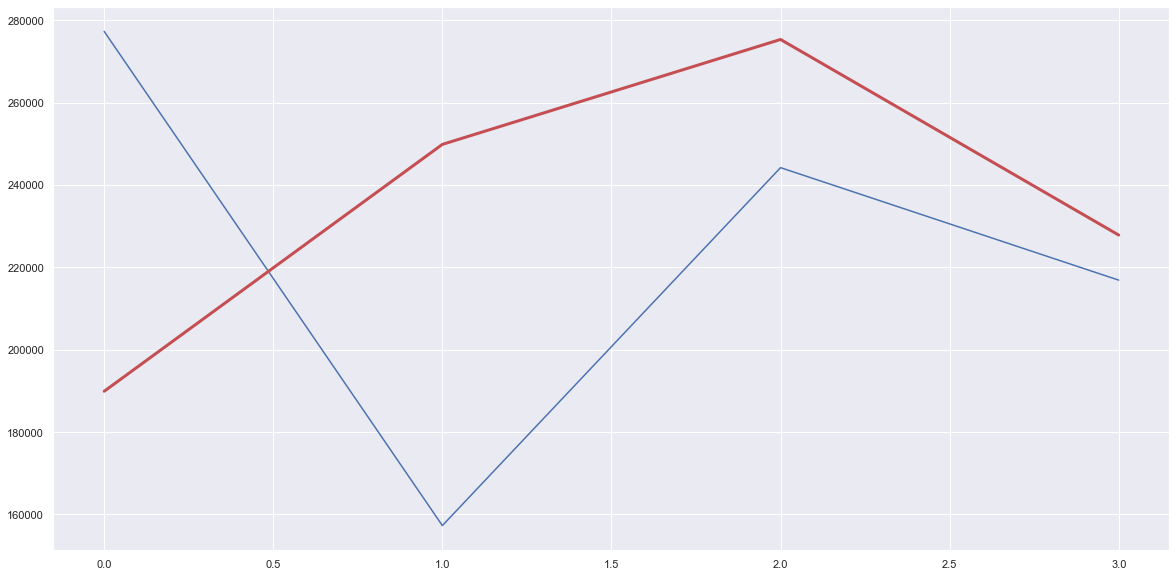

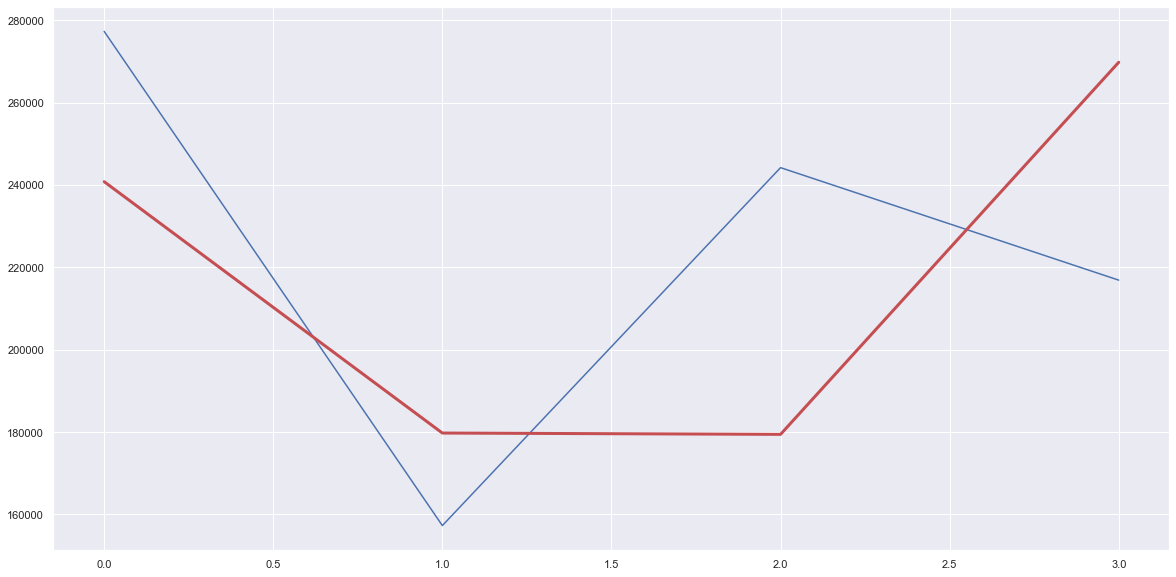

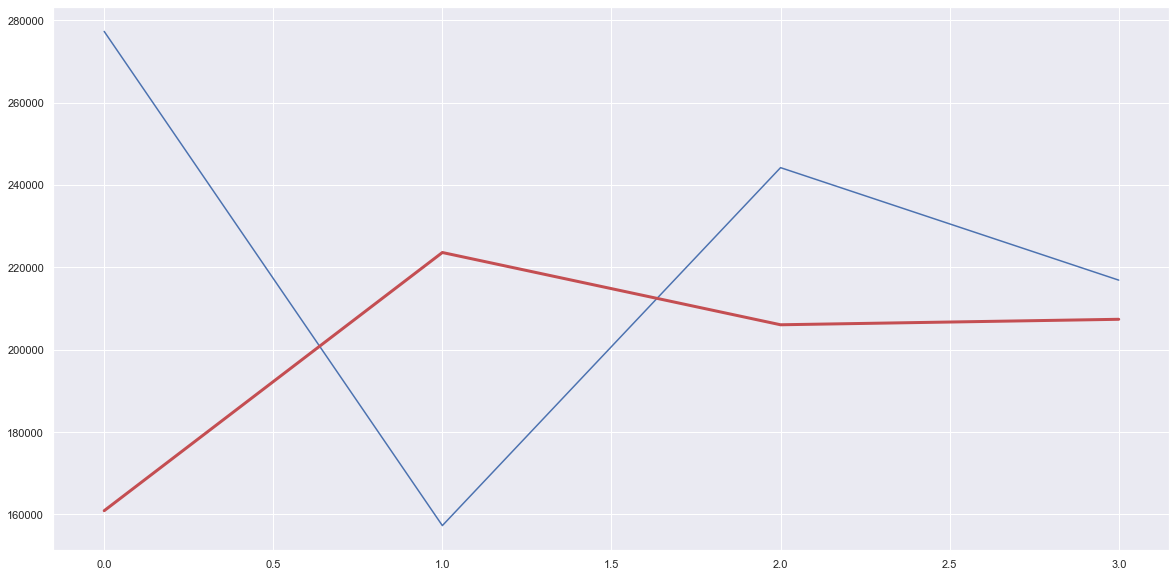

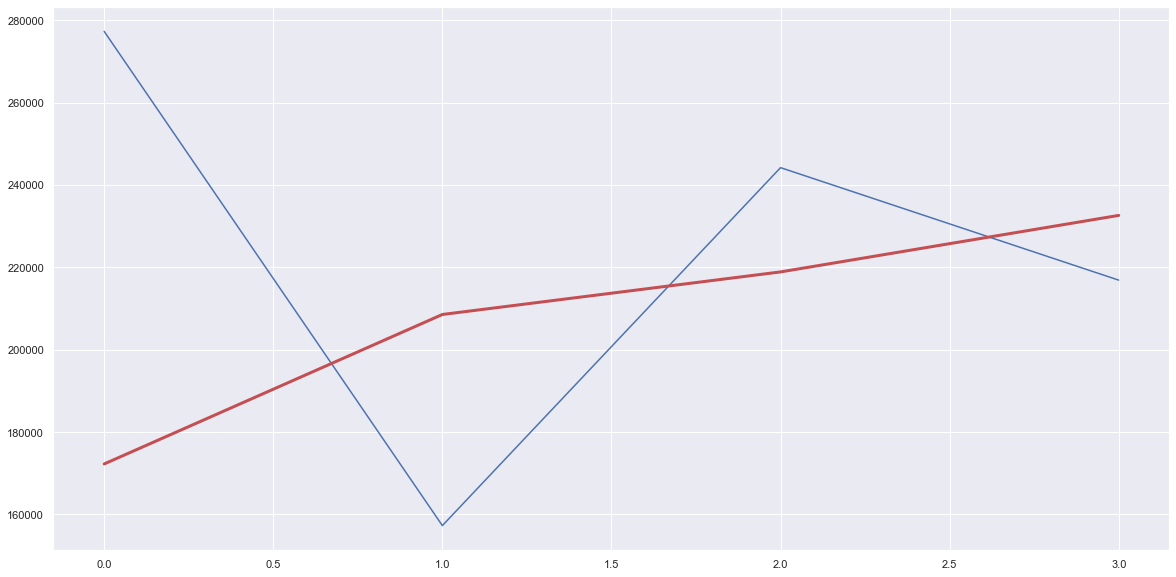

In [151]:
#model = [LR, RFR, XGB, LGBM]
model = [LR, RFR, XGB, LGBM]
for i in model:
    draw_predict(i, X_small, y_small)
    #draw_predict(i, X_full, y_full)

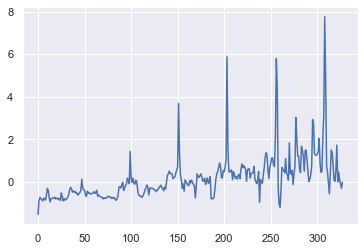

In [20]:
plt.plot(data_normalization(data, 'robust').index, data_normalization(data, 'robust')['SEM'])

(array([  1.,   1.,   0.,   1.,   3.,   5.,  21.,  30.,  72., 194.]),
 array([0.39565462, 0.45576129, 0.51586795, 0.57597462, 0.63608129,
        0.69618796, 0.75629462, 0.81640129, 0.87650796, 0.93661463,
        0.9967213 ]),
 <BarContainer object of 10 artists>)

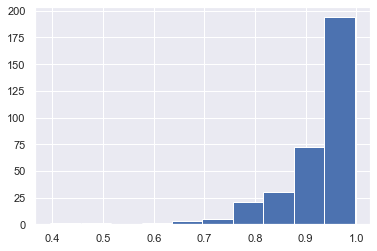

In [151]:
plt.hist(data_normalization(data, 'norm2')['Revenue'] )#bins=np.linspace(start=-2,stop=8,num=90)
#plt.plot(data_normalization(data, 'norm').index, data_normalization(data, 'norm')['SEM'])

In [66]:
data.apply(np.log1p)

Year      Week  Black_Friday  Cyber_Monday     Direct        SEO  \
0    7.608871  0.693147           0.0           0.0   8.464847   9.665167   
1    7.608871  1.098612           0.0           0.0   9.384126  10.542390   
2    7.608871  1.386294           0.0           0.0   9.148039  10.388226   
3    7.608871  1.609438           0.0           0.0   9.414097  10.376705   
4    7.608871  1.791759           0.0           0.0   9.316501  10.322066   
..        ...       ...           ...           ...        ...        ...   
323  7.611842  2.397895           0.0           0.0  11.568455  10.139152   
324  7.611842  2.484907           0.0           0.0  11.721329  10.136898   
325  7.611842  2.564949           0.0           0.0  11.976395  10.124749   
326  7.611842  2.639057           0.0           0.0  11.588636   9.930859   
327  7.611842  2.708050           0.0           0.0  11.531247  10.022159   

           SEM  Affiliate     Email    Display    Revenue  
0     0.000000   3.218876  4.672829   0.000000   9.150649  
1     8.913550   3.583519  5.545177   0.000000   9.765821  
2     9.134754   3.258097  7.939515   0.000000  10.542066  
3     9.062072   2.944439  5.913503   0.000000  10.841218  
4     8.997271   3.713572  5.398163   0.000000  10.241253  
..         ...        ...       ...        ...        ...  
323  10.046462   9.134107  7.636270  10.329213  12.318878  
324   9.855190   8.593784  7.400010  10.455302  12.397084  
325   9.722086   8.597113  7.311218  10.413523  12.197604  
326   9.567035   7.959975  7.555382   9.665357  11.860825  
327   9.771041   8.224700  7.430114   8.613594  12.454194  

[328 rows x 11 columns]

In [64]:
data_normalization(data)

Year      Week  Black_Friday  Cyber_Monday    Direct       SEO  \
0   -1.455566 -1.623756     -0.136505     -0.136505 -0.732722 -1.669129   
1   -1.455566 -1.558415     -0.136505     -0.136505 -0.518005  0.775805   
2   -1.455566 -1.493075     -0.136505     -0.136505 -0.593110  0.177747   
3   -1.455566 -1.427734     -0.136505     -0.136505 -0.507139  0.136646   
4   -1.455566 -1.362393     -0.136505     -0.136505 -0.541359 -0.051952   
..        ...       ...           ...           ...       ...       ...   
323  1.840814 -1.035690     -0.136505     -0.136505  2.298016 -0.613329   
324  1.840814 -0.970349     -0.136505     -0.136505  2.822155 -0.619627   
325  1.840814 -0.905008     -0.136505     -0.136505  3.896398 -0.653325   
326  1.840814 -0.839668     -0.136505     -0.136505  2.362704 -1.139240   
327  1.840814 -0.774327     -0.136505     -0.136505  2.182117 -0.922136   

          SEM  Affiliate     Email   Display   Revenue  
0   -1.614310  -0.629234 -1.144895 -0.663275 -0.969425  
1   -1.002738  -0.627239 -1.048583 -0.663275 -0.923885  
2   -0.851306  -0.629053  0.599694 -0.663275 -0.807590  
3   -0.904801  -0.630322 -0.974896 -0.663275 -0.732472  
4   -0.949325  -0.626332 -1.071207 -0.663275 -0.863551  
..        ...        ...       ...       ...       ...  
323  0.284600   1.046662  0.125249  1.737207  0.250300  
324 -0.046000   0.345183 -0.156575  2.059802  0.353876  
325 -0.241462   0.348448 -0.246422  1.948376  0.104877  
326 -0.438653  -0.114369  0.021181  0.572605 -0.217621  
327 -0.172577   0.043047 -0.124255 -0.231607  0.434799  

[328 rows x 11 columns]

In [13]:
data.describe()

Year        Week  Black_Friday  Cyber_Monday         Direct  \
count   328.000000  328.000000    328.000000    328.000000     328.000000   
mean   2017.649390   25.850610      0.018293      0.018293   29153.661585   
std       1.822959   15.327783      0.134212      0.134212   33364.571361   
min    2015.000000    1.000000      0.000000      0.000000    4744.000000   
25%    2016.000000   12.000000      0.000000      0.000000   10159.750000   
50%    2018.000000   25.500000      0.000000      0.000000   12257.500000   
75%    2019.000000   39.000000      0.000000      0.000000   43434.250000   
max    2021.000000   53.000000      1.000000      1.000000  183505.000000   

                SEO            SEM     Affiliate         Email       Display  \
count    328.000000     328.000000    328.000000    328.000000    328.000000   
mean   30865.219512   19614.926829   3493.637195   1877.231707   8458.652439   
std     9064.790858   12169.224540   5522.490739   1549.433410  12772.337295   
min    12200.000000       0.000000      5.000000     80.000000      0.000000   
25%    25354.500000   11729.750000    685.000000    949.500000    415.500000   
50%    29937.000000   17840.500000   1605.500000   1468.500000   2795.000000   
75%    35060.250000   23354.000000   4160.500000   2347.250000  12024.000000   
max    83666.000000  107992.000000  58734.000000  12566.000000  72378.000000   

            Revenue  
count  3.280000e+02  
mean   1.798721e+05  
std    1.760972e+05  
min    9.419550e+03  
25%    8.729839e+04  
50%    1.465062e+05  
75%    2.255418e+05  
max    1.698646e+06

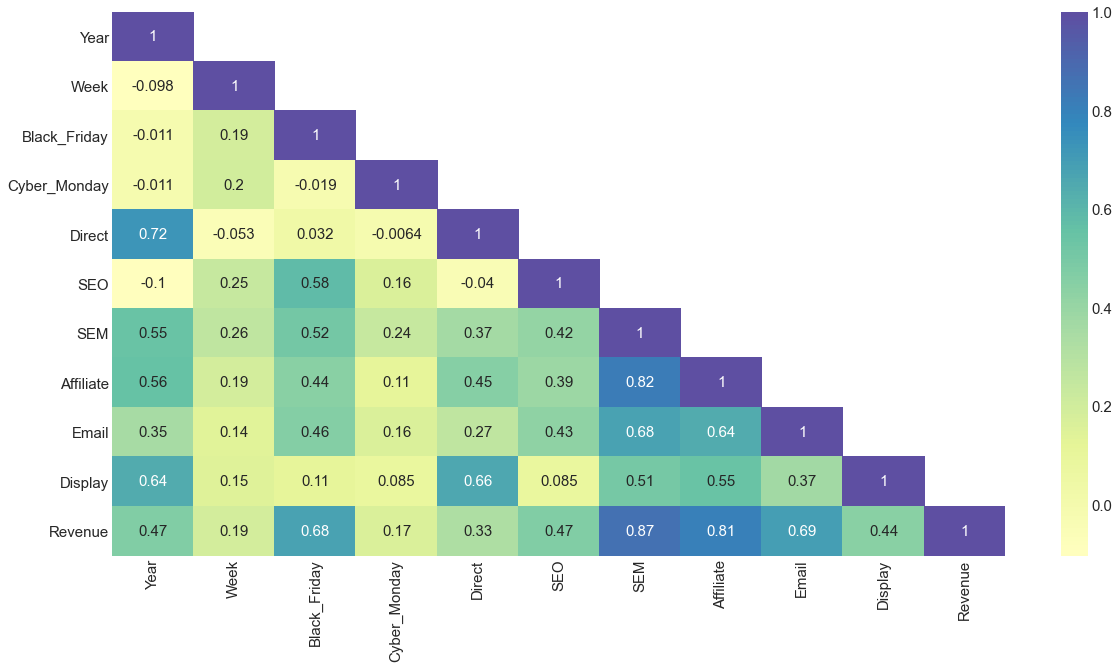

In [46]:
corr_matrix(data_big)

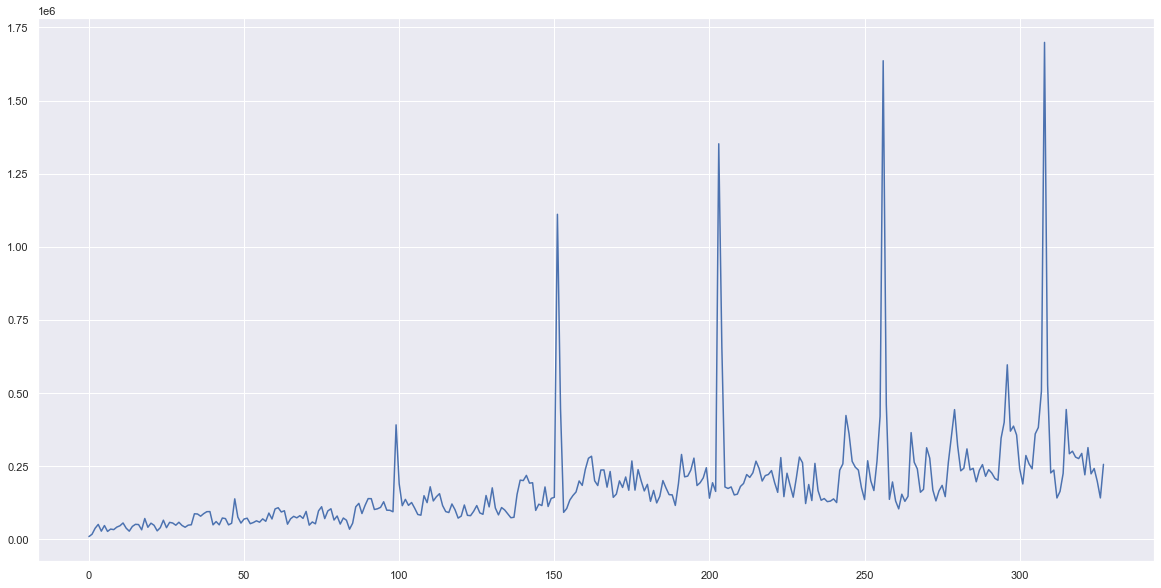

In [15]:
fig = plt.figure()
fig.set_size_inches(20,10)
plt.plot(data.index, data['Revenue'])

In [60]:
#X_params = data.columns[0:-1] #All columns except the last one - ['Year', 'Week', 'Black_Friday', 'Cyber_Monday', 'Direct', 'SEO', 'SEM', 'Affiliate', 'Email', 'Display']
#y_params = data.columns[-1] #Just Revenue

#Train and Test for training
X_train, X_test, y_train, y_test = data_split(*data_preparation(data_big))

#Full Set and Small Set for prediction
X_full, y_full = data_preparation(data_full)
X_small, y_small = data_preparation(data_predict)

In [ ]:
#Ridge : Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.
#Lasso : The Lasso is a linear model that estimates sparse coefficients with l1 regularization.
#ElasticNet : Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.

In [71]:
def corr(pred,y_test):
    return np.corrcoef(pred,y_test)[0][1]

def bias(pred,y_test):
    return np.mean(pred-y_test)

In [62]:
LR = LinearRegression()
LR.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, LR.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, LR.predict(X_test)))
print('Test set score:', LR.score(X_test,y_test))

Train set mse: 4215695243.864121
Test set mse: 4735497127.684606
Test set score: 0.896752113645494


<AxesSubplot:>

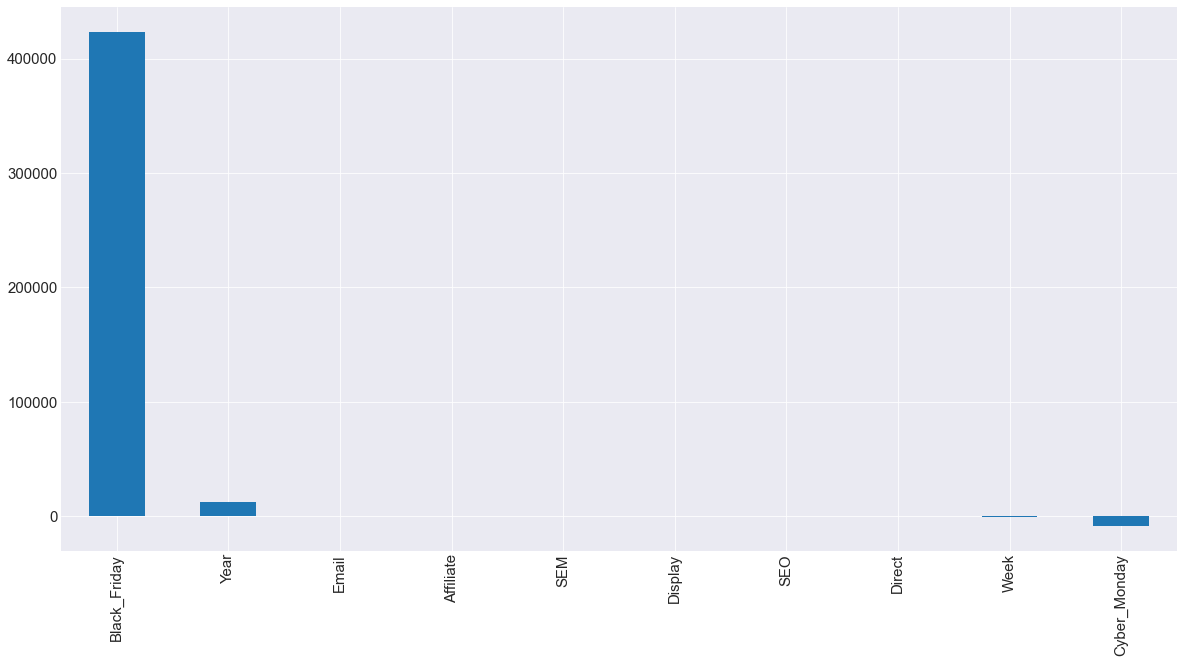

In [64]:
#Features Importance
pd.Series(LR.coef_, data_big.columns[0:-1]).sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:>

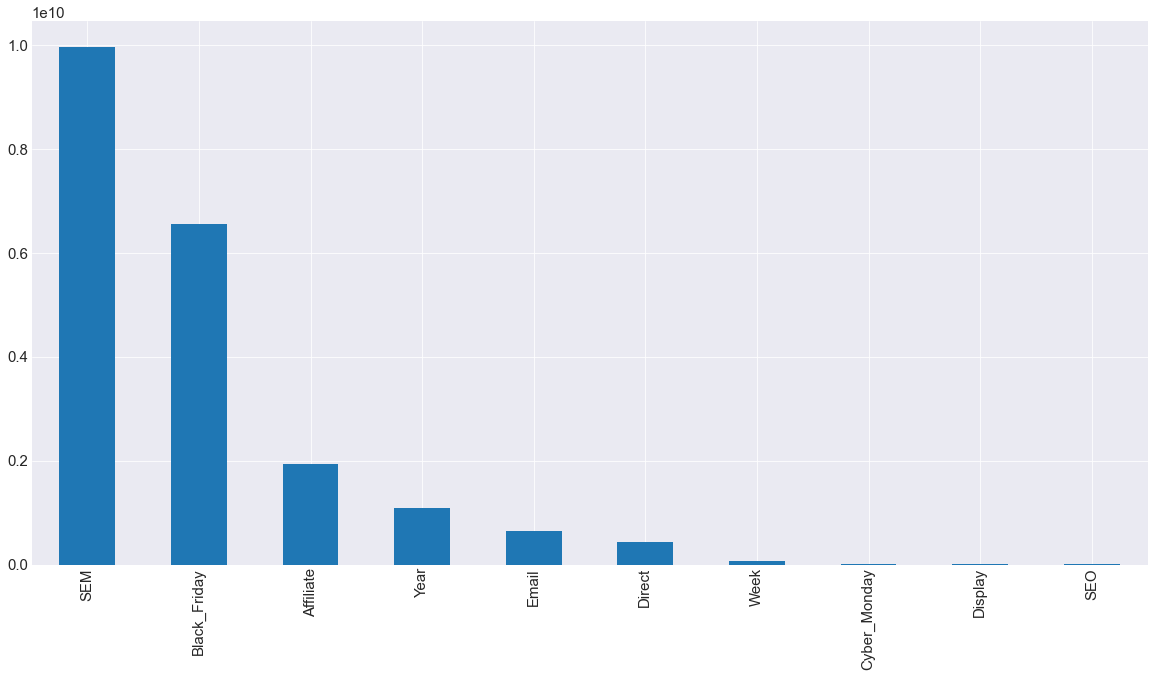

In [65]:
#Permutation Features Importance
results = permutation_importance(LR, X_train, y_train, n_repeats=100, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
pd.Series(importance, data_big.columns[0:-1]).sort_values(ascending = False).plot(kind = 'bar')

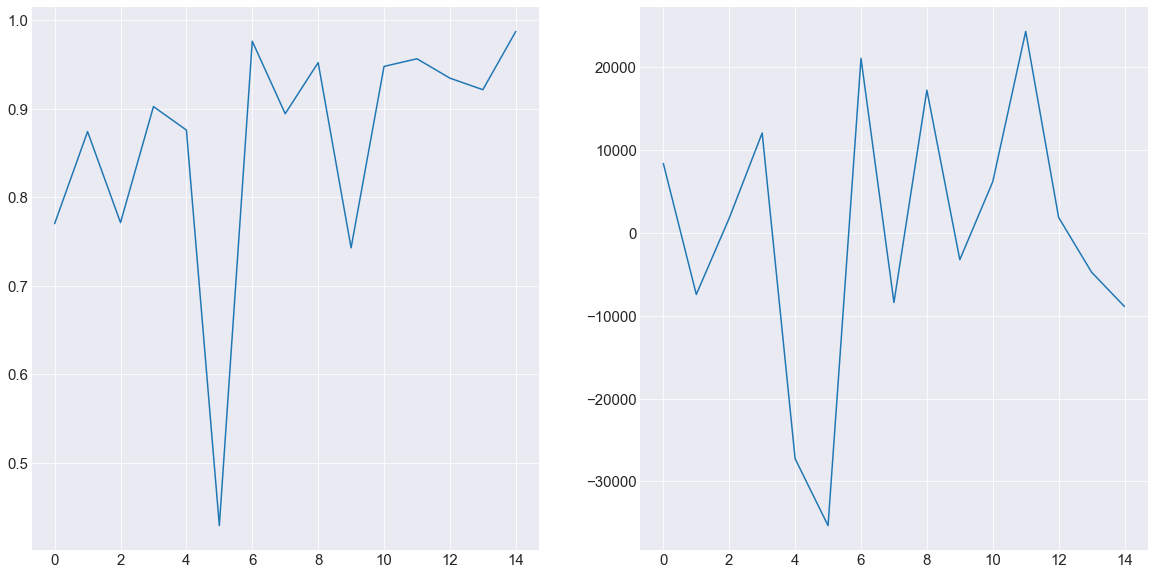

In [77]:
variance = cross_val_score(LR,X_train,y_train,cv=15,scoring=make_scorer(corr))
biass = cross_val_score(LR,X_train,y_train,cv=15,scoring=make_scorer(bias))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20,10)
ax[0].plot(range(len(variance)), variance)
ax[1].plot(range(len(biass)), biass)

In [67]:
dfr = pd.DataFrame()
dfr['Real'] = data.iloc[:,-1].values
dfr['Predict'] = LR.predict(data.iloc[:,0:-1])
dfr['Delta'] = dfr['Real'] - dfr['Predict']

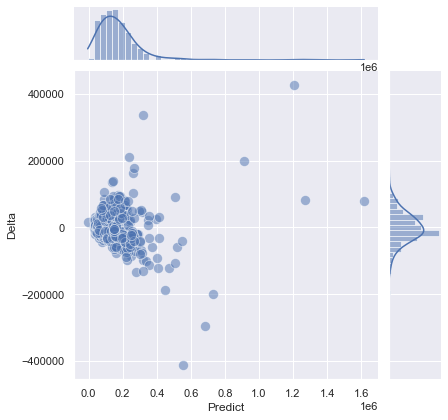

In [68]:
#1.- It has a high density of points close to the origin and a low density of points away from the origin
#2.- It is symmetric about the origin
g = sns.JointGrid(data=dfr, x='Predict', y='Delta')
g.plot_joint(sns.scatterplot, s=100, alpha=.5)
g.plot_marginals(sns.histplot, kde=True)

In [51]:
RFR = RandomForestRegressor(n_estimators = 100, criterion = 'mae', bootstrap = False)
RFR.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, RFR.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, RFR.predict(X_test)))
print('Test set score:', RFR.score(X_test,y_test))

Train set mse: 1.3856101178004603e-19
Test set mse: 4586206861.780258
Test set score: 0.9000070843470521


<AxesSubplot:>

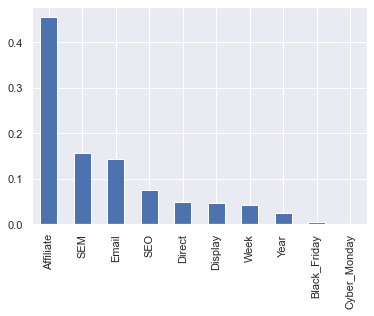

In [52]:
pd.Series(RFR.feature_importances_, data.columns[0:-1]).sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:>

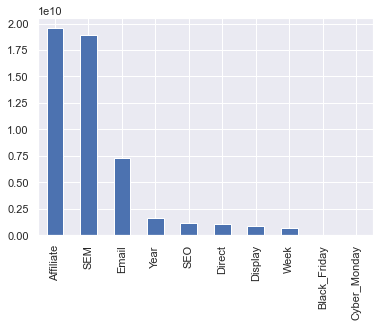

In [53]:
#Permutation Features Importance
results = permutation_importance(RFR, X_train, y_train, n_repeats=100, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
pd.Series(importance, data.columns[0:-1]).sort_values(ascending = False).plot(kind = 'bar')

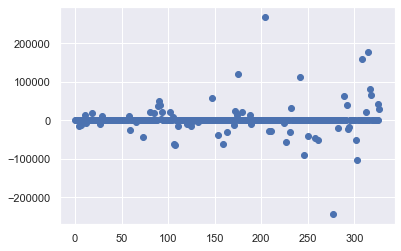

In [54]:
dfr = pd.DataFrame()
dfr['Real'] = data.iloc[:,-1].values
dfr['Predict'] = RFR.predict(data.iloc[:,0:-1])
dfr['Delta'] = dfr['Real'] - dfr['Predict']
plt.scatter(range(len(dfr['Real'])), dfr['Delta'])

In [40]:
XGB = XGBRegressor(max_depth=16,n_estimators=200,seed=1)
XGB.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, XGB.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, XGB.predict(X_test)))
print('Test set score:', XGB.score(X_test,y_test))

Train set mse: 0.001396040080085938
Test set mse: 2685596952.4236803
Test set score: 0.9414460189793372


<AxesSubplot:>

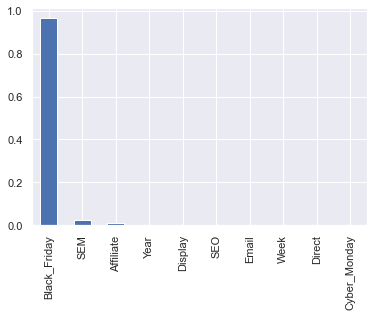

In [38]:
pd.Series(XGB.feature_importances_, data.columns[0:-1]).sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:>

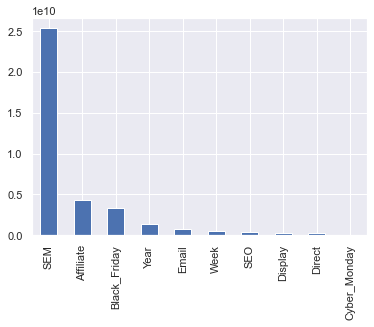

In [50]:
#Permutation Features Importance
results = permutation_importance(XGB, X_train, y_train, n_repeats=100, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
pd.Series(importance, data.columns[0:-1]).sort_values(ascending = False).plot(kind = 'bar')

In [42]:
LGBM = LGBMRegressor(max_depth=16,num_leaves=2048, n_estimators=200,seed=1)
LGBM.fit(X_train,y_train)
y_pred = LGBM.predict(X_test)

print('Train set mse:', mean_squared_error(y_train, LGBM.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, LGBM.predict(X_test)))
print('Test set score:', LGBM.score(X_test,y_test))

Train set mse: 2233988496.4294353
Test set mse: 15791596451.992142
Test set score: 0.6556963478449616


<AxesSubplot:>

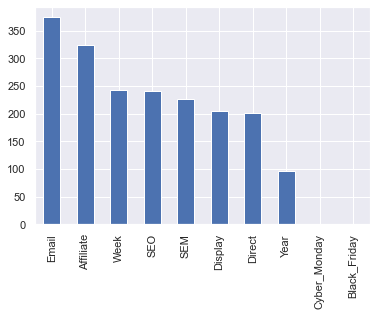

In [37]:
pd.Series(LGBM.feature_importances_, data.columns[0:-1]).sort_values(ascending = False).plot(kind = 'bar')

<AxesSubplot:>

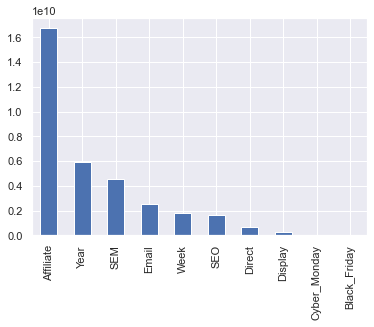

In [51]:
#Permutation Features Importance
results = permutation_importance(LGBM, X_train, y_train, n_repeats=100, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
pd.Series(importance, data.columns[0:-1]).sort_values(ascending = False).plot(kind = 'bar')

In [122]:
y_pred2 = LR.predict(X_full)

In [123]:
mean_absolute_error(y_full,y_pred2)

42100.98692506857

In [124]:
r2_score(y_full, y_pred2)

0.8587654972822847

In [ ]:
r2_score()

In [41]:
#LR RFR, XGB, LGBM
y_pred2 = RFR.predict(X_full)
print("MAE:", mean_absolute_error(y_full,y_pred2))
print("R2: ", r2_score(y_full, y_pred2))
fig = plt.figure()
fig.set_size_inches(20,10)
plt.plot(range(X_full['Year'].count()), y_full)
plt.plot(range(X_full['Year'].count()), y_pred2, c='r', linewidth=3)

NameError: name 'X_full' is not defined

MAE: 49326.68668070354
R2:  -0.8774535528101521


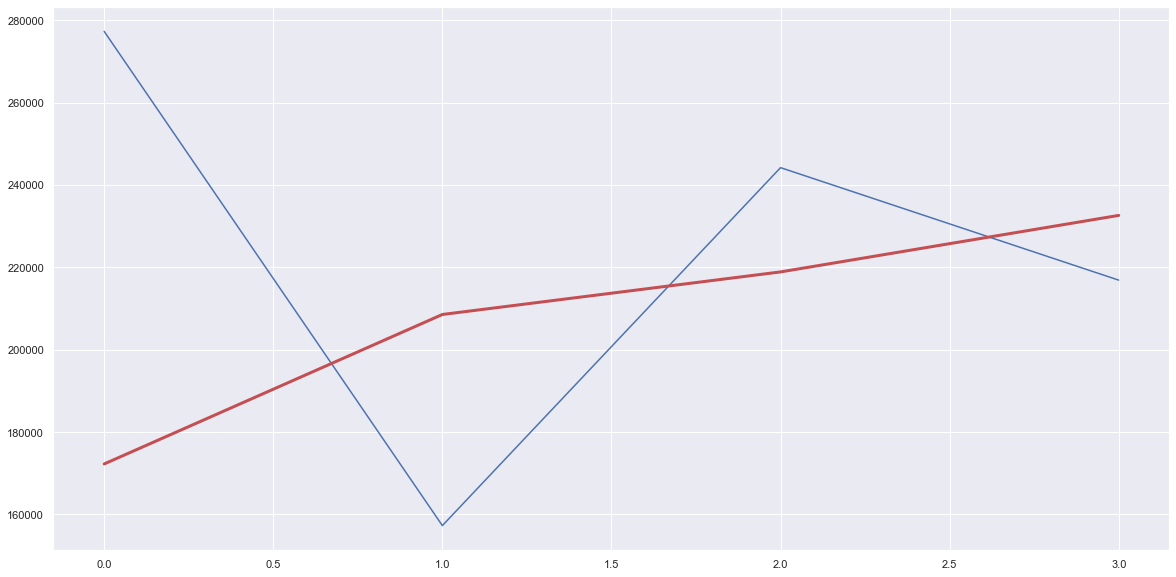

In [49]:
#LR RFR, XGB, LGBM
y_pred2 = LGBM.predict(X_small)
print("MAE:", mean_absolute_error(y_small,y_pred2))
print("R2: ", r2_score(y_small, y_pred2))
fig = plt.figure()
fig.set_size_inches(20,10)
plt.plot(range(X_small['Year'].count()), y_small)
plt.plot(range(X_small['Year'].count()), y_pred2, c='r', linewidth=3)

In [237]:
#Data Contraction via Log
data_log1p = data_consolidated.apply(np.log1p)
data_log1p

Year      Week  Black_Friday  Cyber_Monday  Affiliate     Direct  \
0    7.608871  0.693147           0.0           0.0   3.218876   8.464847   
1    7.608871  1.098612           0.0           0.0   3.583519   9.384126   
2    7.608871  1.386294           0.0           0.0   3.258097   9.148039   
3    7.608871  1.609438           0.0           0.0   2.944439   9.414097   
4    7.608871  1.791759           0.0           0.0   3.713572   9.316501   
..        ...       ...           ...           ...        ...        ...   
323  7.611842  2.397895           0.0           0.0   9.134107  11.568455   
324  7.611842  2.484907           0.0           0.0   8.593784  11.721329   
325  7.611842  2.564949           0.0           0.0   8.597113  11.976395   
326  7.611842  2.639057           0.0           0.0   7.959975  11.588636   
327  7.611842  2.708050           0.0           0.0   8.224700  11.531247   

       Display     Email        SEM        SEO    Revenue  
0     0.000000  4.672829   0.000000   9.665167   9.150649  
1     0.000000  5.545177   8.913550  10.542390   9.765821  
2     0.000000  7.939515   9.134754  10.388226  10.542066  
3     0.000000  5.913503   9.062072  10.376705  10.841218  
4     0.000000  5.398163   8.997271  10.322066  10.241253  
..         ...       ...        ...        ...        ...  
323  10.329213  7.636270  10.046462  10.139152  12.318878  
324  10.455302  7.400010   9.855190  10.136898  12.397084  
325  10.413523  7.311218   9.722086  10.124749  12.197604  
326   9.665357  7.555382   9.567035   9.930859  11.860825  
327   8.613594  7.430114   9.771041  10.022159  12.454194  

[328 rows x 11 columns]

<AxesSubplot:>

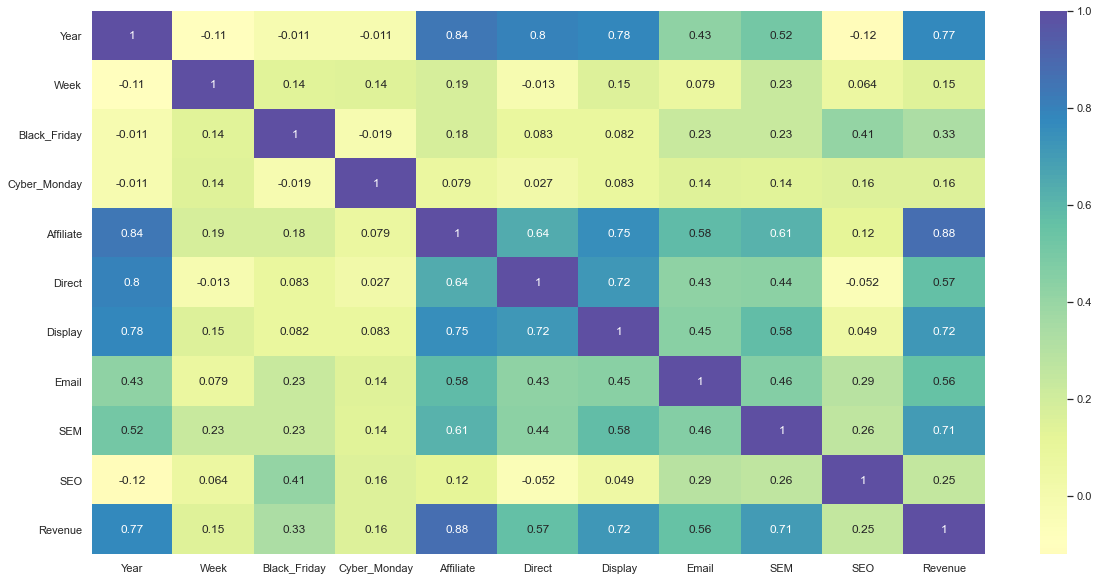

In [238]:
corr = data_log1p.corr()
fig = plt.figure()
fig.set_size_inches(20,10)
#Otra manera
#plt.subplots(figsize=(20, 10))
sns.heatmap(corr, cmap='Spectral', annot=True, center=-0.1)

In [215]:
#Data Normalization
scaler = StandardScaler()
columns = ['Year', 'Week', 'Black_Friday', 'Cyber_Monday', 'Direct', 
           'SEO', 'SEM', 'Affiliate', 'Email', 'Display', 'Revenue']
data_scaled = pd.DataFrame(scaler.fit_transform(data_consolidated), columns = columns)

In [286]:
# Data Preparation
X = data_log1p[['Year', 'Week', 'Black_Friday', 'Cyber_Monday', 'Direct', 
                       'SEO', 'SEM', 'Affiliate', 'Email', 'Display']] # pandas DataFrame
y = data_log1p['Revenue'] # pandas Series

In [287]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [116]:
#Regresión Linear

In [397]:
#Regression
reg = LinearRegression()
#Train the model
reg.fit(X_train,y_train)

LinearRegression()

In [398]:
y_pred = reg.predict(X_test)

In [419]:
mean_absolute_error(y_test,y_pred) # Primero valor real y luego prediccion

47077.8999167806

In [420]:
np.sqrt(mean_squared_error(y_test, y_pred))

75948.39333726655

In [479]:
r2_score(y_test, y_pred)

0.874237033174075

In [477]:
#@@@@@@@@@@@@@@@@@@@#

In [478]:
np.mean(reg.predict(X_test)-y_test)

-1820.193607547661

In [493]:
np.corrcoef?

In [484]:
np.corrcoef(reg.predict(X_test),y_test)[0][1]

0.935078279941874

In [489]:
def corr(pred,y_test):
    return np.corrcoef(pred,y_test)[0][1]

def bias(pred,y_test):
    return np.mean(pred-y_test)

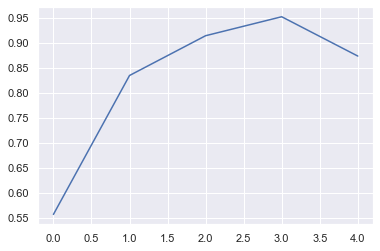

In [495]:
variance = cross_val_score(reg,X,y,cv=5,scoring=make_scorer(corr))
biass = cross_val_score(reg,X,y,cv=5,scoring=make_scorer(bias))
plt.plot(range(len(variance)), variance)

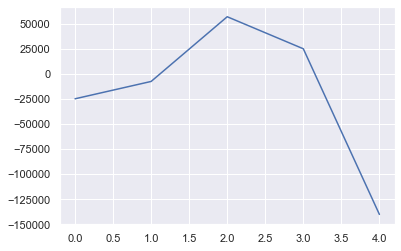

In [494]:
plt.plot(range(len(biass)), biass)

In [497]:
variance = cross_val_score(reg,X,y,cv=5,scoring=make_scorer(corr)).mean()
biass = cross_val_score(reg,X,y,cv=5,scoring=make_scorer(bias)).mean()
variance, biass

(0.8260367383814634, -18259.63031815729)

In [466]:
res = cross_val_score(reg,X,y,cv=5,scoring='neg_mean_absolute_error')
res

array([ -29321.53262093,  -28152.96301003,  -63976.55642234,
        -59183.99112095, -221019.81877881])

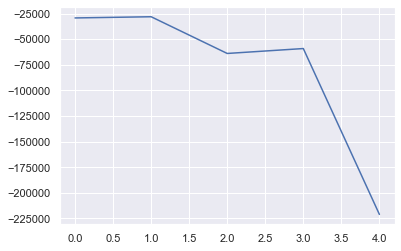

In [467]:
plt.plot(range(len(res)), res)

In [ ]:
#Regresión Gamma

In [123]:
#Regression
reg = GammaRegressor()
#Train the model
reg.fit(X_train,y_train)

/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning: overflow encountered in exp
  return np.exp(lin_pred)
/home/dsc/anaconda3/lib/python3.8/site-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning: invalid value encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)


GammaRegressor()

In [124]:
y_pred = reg.predict(X_test)

In [125]:
mean_absolute_error(y_test,y_pred) # Primero valor real y luego prediccion

97592.02979777157

In [126]:
np.sqrt(mean_squared_error(y_test, y_pred))

131120.8514649113

In [127]:
r2_score(y_test, y_pred)

-0.008288885574373905

In [ ]:
#K-Vecinos

In [246]:
#K-Neighbors
regk = KNeighborsRegressor(n_neighbors=10)
#Train the model
regk.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [248]:
y_pred = regk.predict(X_test)

In [249]:
mean_absolute_error(y_test,y_pred) # Primero valor real y luego prediccion

0.23710276867609345

In [250]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.2944816763478674

In [418]:
r2_score(y_test, y_pred)

0.874237033174075

In [36]:
range(X_test['Year'].count())

range(0, 66)

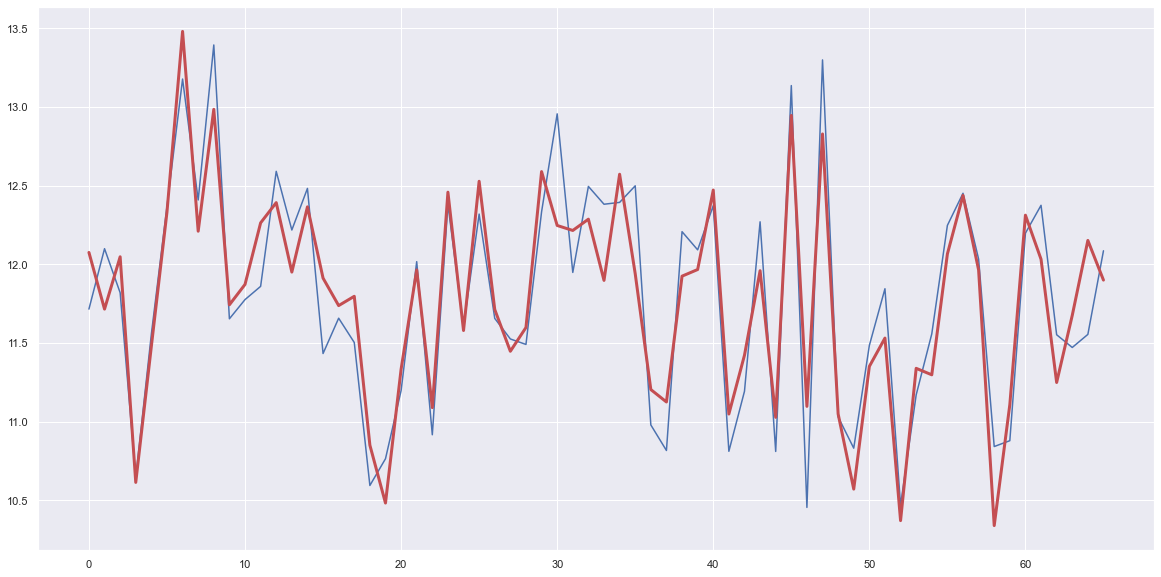

In [293]:
fig = plt.figure()
fig.set_size_inches(20,10)
plt.plot(range(X_test['Year'].count()), y_test)
plt.plot(range(X_test['Year'].count()), y_pred, c='r', linewidth=3)

In [29]:
myfile = "./data_predict_v1.xlsx"
data_predict = pd.read_excel(myfile)
data_predict

Date          Program  Visits  Revenue
0    2021-04-12 23:59:59           Direct       1  2484.69
1    2021-04-12 23:59:59           Direct       1  1988.53
2    2021-04-12 23:59:59           Direct       1  1984.02
3    2021-04-12 23:59:59           Direct       1  1696.85
4    2021-04-12 23:59:59           Direct       1  1568.62
...                  ...              ...     ...      ...
1898 2021-05-09 23:59:59  ::unspecified::      21     0.00
1899 2021-05-09 23:59:59      Paid Social    1050     0.00
1900 2021-05-09 23:59:59   Organic Social      19     0.00
1901 2021-05-09 23:59:59            Other       4     0.00
1902 2021-05-09 23:59:59   Company Social       0     0.00

[1903 rows x 4 columns]

In [28]:
data_predict.isna().sum()
data_predict.dtypes

Date       datetime64[ns]
Program            object
Visits              int64
Revenue           float64
dtype: object

In [30]:
data_predict = convert_dates(data_predict, 'Date')
data_predict = data_predict[['Year', 'Week', 'Program', 'Visits', 'Revenue']]

data_predict = group_programs(data_predict)

program_data_predict = data_predict.groupby(['Year', 'Week', 'Program'])['Visits'].sum().unstack().fillna(value = 0).reset_index()
black_friday_and_cyber_monday_data_predict = get_black_friday_cyber_monday(program_data_predict.iloc[:,0:2])
program_data_predict = pd.merge(black_friday_and_cyber_monday_data_predict, program_data_predict)
data_revenue_predict = data_predict.groupby(['Year', 'Week'])['Revenue'].sum().reset_index()
data_consolidated_predict = pd.concat([program_data_predict, data_revenue_predict['Revenue']], axis = 1)
data_consolidated_predict = data_consolidated_predict[['Year', 'Week', 'Black_Friday', 'Cyber_Monday', 'Direct', 
                       'SEO', 'SEM', 'Affiliate', 'Email', 'Display', 'Revenue']]
program_data_predict = program_data_predict[['Year', 'Week', 'Black_Friday', 'Cyber_Monday', 'Direct', 
                       'SEO', 'SEM', 'Affiliate', 'Email', 'Display']]

In [30]:
data_consolidated_predict

Year  Week  Black_Friday  Cyber_Monday  Direct    SEO    SEM  Affiliate  \
0  2021    15             0             0  101202  23086  21137       3261   
1  2021    16             0             0   68401  22761  27275       3146   
2  2021    17             0             0   39055  23616  28314       3832   
3  2021    18             0             0   31535  21298  20369       3597   

   Email  Display    Revenue  
0   1658    12494  277288.61  
1   2127    22512  157303.90  
2   2196    21476  244209.96  
3   2197    17004  216899.81

In [296]:
data_consolidated_predict = data_consolidated_predict.apply(np.log1p)
data_consolidated_predict

Year      Week  Black_Friday  Cyber_Monday     Direct        SEO  \
0  7.611842  2.772589           0.0           0.0  11.524884  10.047025   
1  7.611842  2.833213           0.0           0.0  11.133157  10.032848   
2  7.611842  2.890372           0.0           0.0  10.572752  10.069722   
3  7.611842  2.944439           0.0           0.0  10.358885   9.966415   

         SEM  Affiliate     Email    Display    Revenue  
0   9.958828   8.090096  7.413970   9.433084  12.532818  
1  10.213762   8.054205  7.662938  10.021848  11.965941  
2  10.251147   8.251403  7.694848   9.974738  12.405788  
3   9.921819   8.188133  7.695303   9.741263  12.287195

In [297]:
X_pred = data_consolidated_predict[['Year', 'Week', 'Black_Friday', 'Cyber_Monday', 'Direct', 
                       'SEO', 'SEM', 'Affiliate', 'Email', 'Display']] # pandas DataFrame
y_pred = data_consolidated_predict['Revenue'] # pandas Series

In [298]:
y_pred2 = reg.predict(X_pred)

In [299]:
mean_absolute_error(y_pred,y_pred2)

0.2862432021624479

In [301]:
r2_score(y_pred, y_pred2)

-1.160803420425459

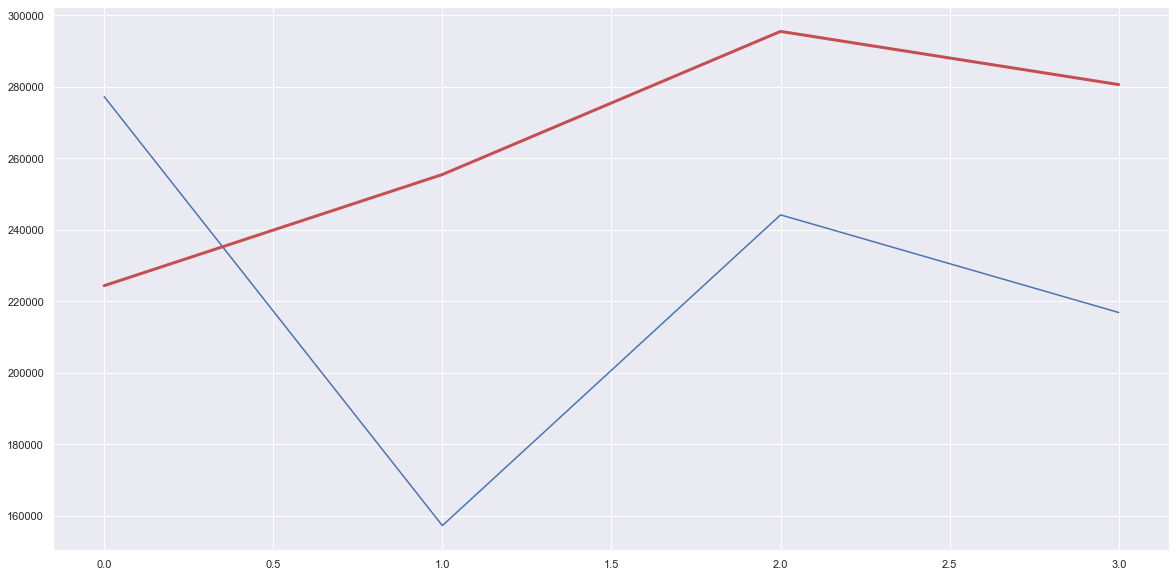

In [303]:
fig = plt.figure()
fig.set_size_inches(20,10)
plt.plot(range(X_pred['Year'].count()), np.expm1(y_pred))
plt.plot(range(X_pred['Year'].count()), np.expm1(y_pred2), c='r', linewidth=3)

In [82]:
dfr=pd.DataFrame()

In [83]:
dfr=pd.DataFrame()
dfr["real"]=y_test.values
dfr['predct'] = y_pred

In [84]:
dfr

real         predct
0   122364.910000  156419.220484
1   179681.856133   98718.733737
2   135797.220000  193632.439531
3    41893.220000   75270.050549
4   104407.180000  110950.737614
..            ...            ...
61  236736.980000  169491.989178
62  103970.730000   83639.820688
63   95888.540000  114202.648525
64  104196.640000  150369.436438
65  177316.190000  153157.655424

[66 rows x 2 columns]

In [410]:
kf = KFold(n_splits=5)

In [414]:
cross_val_score(reg,X,y,cv=10,scoring="r2")

array([ -0.84639769, -28.01207974,   0.35154528,  -1.10986955,
         0.82108121,  -1.11790739,   0.88359317,   0.80537493,
        -0.46556121,   0.77088949])

In [466]:
data_full

Year  Month  Day  Visits   Revenue
Date                                          
2015-01-01  2015      1    1    3834   3244.55
2015-01-02  2015      1    2    6189   4791.64
2015-01-03  2015      1    3    5523    534.93
2015-01-04  2015      1    4    5086    848.43
2015-01-05  2015      1    5    6185   2393.52
...          ...    ...  ...     ...       ...
2021-06-09  2021      6    9   15402  47649.11
2021-06-10  2021      6   10   18295  66938.46
2021-06-11  2021      6   11   15349  53022.54
2021-06-12  2021      6   12   12651  25079.69
2021-06-13  2021      6   13   13352  27413.63

[2356 rows x 5 columns]

In [467]:
kk = list()
for i in range(14):
    kk.append('2021')

In [485]:
fechas = create_date_range([data_full.index[-1] + pd.to_timedelta(1, 'D')], 'D', 14)

In [500]:
kk_pd = pd.DataFrame(kk, index=fechas, columns=['Year'])
kk_pd.reset_index()

level_0  Year
0  2021-06-14  2021
1  2021-06-15  2021
2  2021-06-16  2021
3  2021-06-17  2021
4  2021-06-18  2021
5  2021-06-19  2021
6  2021-06-20  2021
7  2021-06-21  2021
8  2021-06-22  2021
9  2021-06-23  2021
10 2021-06-24  2021
11 2021-06-25  2021
12 2021-06-26  2021
13 2021-06-27  2021

In [493]:
data_kk = data_full.copy()

In [495]:
mas_kk = pd.concat([data_kk, kk_pd])
mas_kk

Year  Month  Day  Visits  Revenue
2015-01-01 00:00:00     2015    1.0  1.0  3834.0  3244.55
2015-01-02 00:00:00     2015    1.0  2.0  6189.0  4791.64
2015-01-03 00:00:00     2015    1.0  3.0  5523.0   534.93
2015-01-04 00:00:00     2015    1.0  4.0  5086.0   848.43
2015-01-05 00:00:00     2015    1.0  5.0  6185.0  2393.52
...                      ...    ...  ...     ...      ...
(2021-06-23 00:00:00,)  2021    NaN  NaN     NaN      NaN
(2021-06-24 00:00:00,)  2021    NaN  NaN     NaN      NaN
(2021-06-25 00:00:00,)  2021    NaN  NaN     NaN      NaN
(2021-06-26 00:00:00,)  2021    NaN  NaN     NaN      NaN
(2021-06-27 00:00:00,)  2021    NaN  NaN     NaN      NaN

[2370 rows x 5 columns]

# NO TOCAR

In [439]:
data_exp = data_big.copy()
data_exp["Rev -1"] = data_exp["Revenue"].shift(1)
data_exp["Rev -2"] = data_exp["Revenue"].shift(2)

data_exp.dropna(inplace=True)

In [1001]:
data_exp = pd.DataFrame()

In [1002]:
for i in range(len(data_small)-2, 0 ,-365):
    data_exp[f'Rev-{i}'] = data_small["Revenue"].shift(i) #OJO que empieza en 0!
data_exp['Revenue'] = data_small["Revenue"]
data_exp

Rev-2291  Rev-1926  Rev-1561  Rev-1196   Rev-831   Rev-466   Rev-101  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2288       NaN   6407.68  31595.68  29447.51  35246.36  16699.21  15100.02   
2289       NaN   9870.95  22119.08  28687.50  16646.03   8024.64  39791.03   
2290       NaN   7688.27  17809.13  12959.47  15883.35  17509.79  38652.47   
2291   3244.55   6785.55   8704.46  14577.27  28509.32  12801.71  24401.37   
2292   4791.64   4017.26   4431.56   6587.00  12666.22   6727.75  11143.55   

       Revenue  
0      3244.55  
1      4791.64  
2       534.93  
3       848.43  
4      2393.52  
...        ...  
2288  72689.94  
2289  43742.25  
2290  31925.36  
2291  23028.97  
2292  16098.10  

[2293 rows x 8 columns]

In [982]:
len(data_small) / 52

44.09615384615385

In [986]:
data_exp

Rev-2293  Rev-2241  Rev-2189  Rev-2137  Rev-2085  Rev-2033  Rev-1981  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2288       NaN   2953.43   6305.70   3984.40   5635.70   5344.80   9566.66   
2289       NaN   4363.87   2909.18   9154.38   6930.10  14685.81   9904.72   
2290       NaN  11387.68   1352.61    858.19   7703.58  18048.57  11048.88   
2291       NaN   8573.08   3573.10   7157.46   6433.27  11499.03   6241.98   
2292       NaN   2097.52   4856.73   3346.74   9754.53  16219.61   1754.41   

      Rev-1929  Rev-1877  Rev-1825  Rev-1773  Rev-1721  Rev-1669  Rev-1617  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2288   1825.62  13368.78  13412.13  21383.89  10628.60   4835.77  23631.81   
2289   8008.34  18923.04   1887.00  17090.81   6668.76  21064.76  19347.47   
2290  16351.42   5987.22  14858.59  14802.23   3728.60  29005.99  15801.53   
2291   6407.68   6152.02  11900.88  18072.21   4617.89  24253.18  11276.01   
2292   9870.95   5939.46  15247.25   8243.62   3931.20  16244.46   9198.53   

      Rev-1565  Rev-1513  Rev-1461  Rev-1409  Rev-1357  Rev-1305  Rev-1253  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2288   7432.66  16846.44  24448.04  32338.86  18151.43  17462.51  10442.10   
2289   5865.36  20623.85   2570.76  13932.50  15326.06  45331.41  21002.98   
2290  14459.68  24299.11   2702.92  12832.91   3366.35  31625.93  17835.79   
2291  26793.51  14448.21  16924.00  10061.28   9283.20  45115.77   9207.91   
2292  31595.68  12085.00  15234.88   9709.99  17518.46  38626.40   6406.87   

      Rev-1201  Rev-1149  Rev-1097  Rev-1045   Rev-993   Rev-941   Rev-889  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2288   8154.92  30244.96  19226.96  43263.14  29567.86  19941.11   8168.12   
2289   8558.32  46172.50   6472.91  16381.75  28954.95  29377.77    629.19   
2290   8170.03  50787.01  20910.40  35417.74  18461.24  25733.51  28622.20   
2291  26231.06  22710.68  30217.74  15619.58  17277.76  62287.76  14531.88   
2292  29706.00   4023.31  39743.56  45190.66  25623.67  36048.89   9726.57   

       Rev-837   Rev-785    Rev-733   Rev-681   Rev-629    Rev-577   Rev-525  \
0          NaN       NaN        NaN       NaN       NaN        NaN       NaN   
1          NaN       NaN        NaN       NaN       NaN        NaN       NaN   
2          NaN    

In [847]:
data_exp = data_big.copy()
data_exp["Rev -1"] = data_exp["Revenue"].shift(1)
data_exp["Rev -2"] = data_exp["Revenue"].shift(2)

data_exp.dropna(inplace=True)

In [848]:
data_exp

Year  Week  Black_Friday  Cyber_Monday  Direct    SEO    SEM  Affiliate  \
2    2015     3             0             0    9395  32474   9271         25   
3    2015     4             0             0   12259  32102   8621         18   
4    2015     5             0             0   11119  30395   8080         40   
5    2015     6             0             0   10037  27749   7367         18   
6    2015     7             0             0   10552  24753   8867         18   
..    ...   ...           ...           ...     ...    ...    ...        ...   
323  2021    10             0             0  105709  25314  23073       9265   
324  2021    11             0             0  123170  25257  19056       5397   
325  2021    12             0             0  158957  24952  16681       5415   
326  2021    13             0             0  107864  20554  14285       2863   
327  2021    14             0             0  101848  22519  17518       3731   

     Email  Display    Revenue     Rev -1     Rev -2  
2     2805        0   37874.74   17426.79    9419.55  
3      369        0   51082.54   37874.74   17426.79  
4      220        0   28035.24   51082.54   37874.74  
5     1087       62   47267.60   28035.24   51082.54  
6     1355       59   27090.70   47267.60   28035.24  
..     ...      ...        ...        ...        ...  
323   2071    30613  223881.90  313609.70  220552.72  
324   1635    34727  242093.55  223881.90  313609.70  
325   1496    33306  198312.41  242093.55  223881.90  
326   1910    15761  141608.06  198312.41  242093.55  
327   1685     5505  256322.15  141608.06  198312.41  

[326 rows x 13 columns]

In [859]:
data_exp = pd.DataFrame()
for i in range(365, 0 ,-1):
    data_exp[f'Rev-{i}'] = data_small["Revenue"].shift(i) #OJO que empieza en 0!
data_exp['Revenue'] = data_small["Revenue"]
data_exp.dropna(inplace= True)
data_exp

Rev-365   Rev-364   Rev-363   Rev-362   Rev-361   Rev-360   Rev-359  \
365    3244.55   4791.64    534.93    848.43   2393.52     47.60   4538.59   
366    4791.64    534.93    848.43   2393.52     47.60   4538.59   5145.28   
367     534.93    848.43   2393.52     47.60   4538.59   5145.28   2597.79   
368     848.43   2393.52     47.60   4538.59   5145.28   2597.79   1244.15   
369    2393.52     47.60   4538.59   5145.28   2597.79   1244.15   1459.86   
...        ...       ...       ...       ...       ...       ...       ...   
2288  32245.51  25739.75  29767.03  25033.45  21256.52  22648.44  23485.10   
2289  25739.75  29767.03  25033.45  21256.52  22648.44  23485.10  13465.51   
2290  29767.03  25033.45  21256.52  22648.44  23485.10  13465.51   3445.92   
2291  25033.45  21256.52  22648.44  23485.10  13465.51   3445.92  35026.13   
2292  21256.52  22648.44  23485.10  13465.51   3445.92  35026.13  50749.92   

       Rev-358   Rev-357   Rev-356   Rev-355   Rev-354   Rev-353   Rev-352  \
365    5145.28   2597.79   1244.15   1459.86   6131.74   6433.07  11098.82   
366    2597.79   1244.15   1459.86   6131.74   6433.07  11098.82   8197.76   
367    1244.15   1459.86   6131.74   6433.07  11098.82   8197.76   4424.75   
368    1459.86   6131.74   6433.07  11098.82   8197.76   4424.75   1520.34   
369    6131.74   6433.07  11098.82   8197.76   4424.75   1520.34     68.26   
...        ...       ...       ...       ...       ...       ...       ...   
2288  13465.51   3445.92  35026.13  50749.92  15198.33  18145.46  45748.78   
2289   3445.92  35026.13  50749.92  15198.33  18145.46  45748.78  31375.19   
2290  35026.13  50749.92  15198.33  18145.46  45748.78  31375.19  24097.79   
2291  50749.92  15198.33  18145.46  45748.78  31375.19  24097.79  56233.83   
2292  15198.33  18145.46  45748.78  31375.19  24097.79  56233.83  44289.34   

       Rev-351   Rev-350   Rev-349   Rev-348   Rev-347   Rev-346   Rev-345  \
365    8197.76   4424.75   1520.34     68.26   9858.20   9606.97   9042.06   
366    4424.75   1520.34     68.26   9858.20   9606.97   9042.06   5386.29   
367    1520.34     68.26   9858.20   9606.97   9042.06   5386.29   7778.88   
368      68.26   9858.20   9606.97   9042.06   5386.29   7778.88   3301.73   
369    9858.20   9606.97   9042.06   5386.29   7778.88   3301.73   6108.41   
...        ...       ...       ...       ...       ...       ...       ...   
2288  31375.19  24097.79  56233.83  44289.34  26058.29  35085.70  49563.74   
2289  24097.79  56233.83  44289.34  26058.29  35085.70  49563.74  32508.93   
2290  56233.83  44289.34  26058.29  35085.70  49563.74  32508.93  29729.89   
2291  44289.34  26058.29  35085.70  49563.74  32508.93  29729.89  45575.59   
2292  26058.29  35085.70  49563.74  32508.93  29729.89  45575.59  47911.72   

       Rev-344   Rev-343   Rev-342   Rev-341   Rev-340   Rev-339   Rev-338  \
365    5386.29   7778.88   3301.73   6108.41   3539.89   1541.51   8712.82   
366    7778.88   3301.73   6108.41   3539.89   1541.51   8712.82   3927.55   
367    3301.73   6108.41   3539.89   1541.51   8712.82   3927.55   2973.50   
368    6108.41   3539.89   1541.51   8712.82   3927.55   2973.50   3541.61   
369    3539.89   1541.51   8712.82   3927.55   2973.50   3541.61   3798.36   
...        ...       ...       ...       ...       ...       ...       ...   
2288  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28   
2289  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11   
2290  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34   
2291  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39   
2292  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17   

       Rev-337   Rev-336   Rev-335   Rev-334   Rev-333   Rev-332   Rev-331  \
365    3927.55   2973.50   3541.61   3798.36  14127.02   9341.59   8365.48   
366    2973.50   3541.61   3798.36  14127.02   9341.59   8365.48   3798.72   
367    3541.61   3798.36 

In [863]:
X_train, X_test, y_train, y_test = data_split(*data_preparation(data_exp))

In [864]:
RFR = RandomForestRegressor(n_estimators = 100, criterion = 'mse', bootstrap = False)
RFR.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, RFR.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, RFR.predict(X_test)))
print('Test set score:', RFR.score(X_test,y_test))

Train set mse: 6.286380386389832e-21
Test set mse: 1595776339.0125375
Test set score: -0.3427028067941966


In [865]:
XGB = XGBRegressor(max_depth=16,n_estimators=200,seed=1)
XGB.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, XGB.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, XGB.predict(X_test)))
print('Test set score:', XGB.score(X_test,y_test))

Train set mse: 4.786535609762915e-05
Test set mse: 394749318.2674679
Test set score: 0.6678538184456309


In [866]:
LR = LinearRegression()
LR.fit(X_train,y_train)

print('Train set mse:', mean_squared_error(y_train, LR.predict(X_train)))
print('Test set mse:', mean_squared_error(y_test, LR.predict(X_test)))
print('Test set score:', LR.score(X_test,y_test))

Train set mse: 745222996.6364201
Test set mse: 494920668.2078669
Test set score: 0.5835686028817969


In [867]:
def corr(pred,y_test):
    return np.corrcoef(pred,y_test)[0][1]

def bias(pred,y_test):
    return np.mean(pred-y_test)

(array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1.]),
 array([-5254.07957023, -4167.59546265, -3081.11135508, -1994.6272475 ,
         -908.14313992,   178.34096766,  1264.82507523,  2351.30918281,
         3437.79329039,  4524.27739796,  5610.76150554]),
 <BarContainer object of 10 artists>)

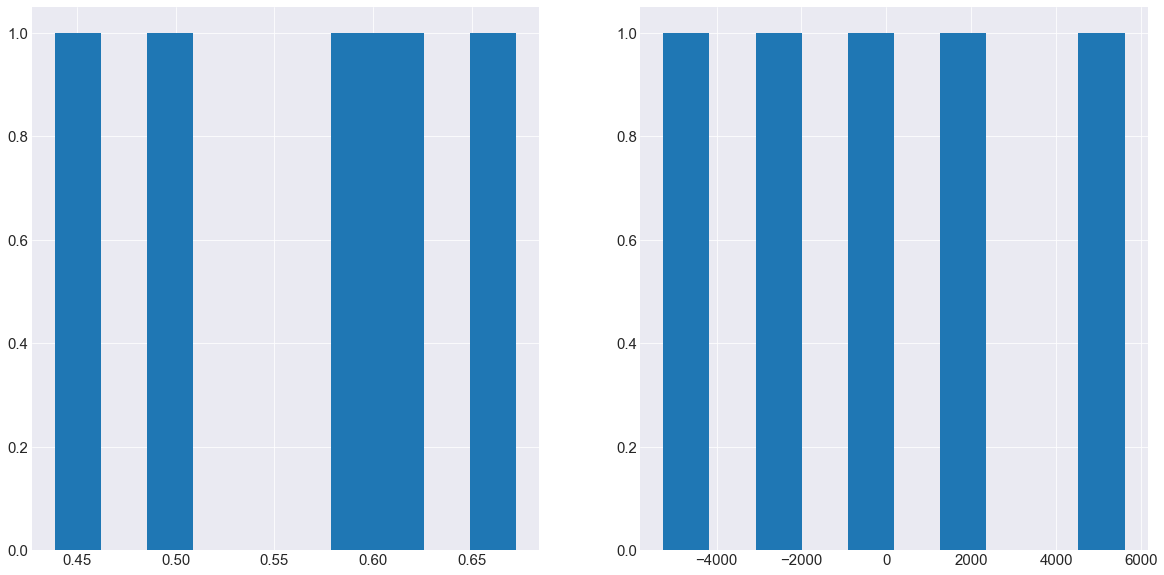

In [868]:
variance = cross_val_score(LR,X_train,y_train,cv=5,scoring=make_scorer(corr))
biass = cross_val_score(LR,X_train,y_train,cv=5,scoring=make_scorer(bias))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(20,10)
ax[0].hist( variance)
ax[1].hist(biass)

In [811]:
data_predict = split_dates_by_columns(data_predict, 'Date')
#For this early stage I discard type of Traffic and just sum all of them and group by Year, Month and Day
data_predict = data_predict.groupby(['Year','Month','Day'])[['Visits','Revenue']].sum()
#Reset Index after having made a groupby
data_predict = data_predict.reset_index()

KeyError: 'Date'

In [869]:
data_small

Year  Month  Day  Visits   Revenue
0     2015      1    1    3834   3244.55
1     2015      1    2    6189   4791.64
2     2015      1    3    5523    534.93
3     2015      1    4    5086    848.43
4     2015      1    5    6185   2393.52
...    ...    ...  ...     ...       ...
2288  2021      4    7   26501  72689.94
2289  2021      4    8   24397  43742.25
2290  2021      4    9   23445  31925.36
2291  2021      4   10   15016  23028.97
2292  2021      4   11   16937  16098.10

[2293 rows x 5 columns]

In [870]:
data_predict

Year  Month  Day  Visits   Revenue
0   2021      4   12   26209  65338.03
1   2021      4   13   26833  59898.32
2   2021      4   14   25334  55744.03
3   2021      4   15   26498  34730.98
4   2021      4   16   24250  32259.23
5   2021      4   17   16399  19334.21
6   2021      4   18   17315   9983.81
7   2021      4   19   26984  22452.18
8   2021      4   20   27327  19988.78
9   2021      4   21   22053  27774.11
10  2021      4   22   19406  31266.89
11  2021      4   23   17025  26522.90
12  2021      4   24   15663  10713.67
13  2021      4   25   17764  18585.37
14  2021      4   26   18978  28451.04
15  2021      4   27   18400  31161.77
16  2021      4   28   18446  47103.00
17  2021      4   29   19083  64859.12
18  2021      4   30   14725  20316.61
19  2021      5    1   14970  23674.63
20  2021      5    2   13887  28643.79
21  2021      5    3   16171  37756.17
22  2021      5    4   14090  41519.70
23  2021      5    5   14373  37283.53
24  2021      5    6   14025  39991.11
25  2021      5    7   12399  24901.84
26  2021      5    8   11018  15744.14
27  2021      5    9   13924  19703.32

In [871]:
data_neww = pd.concat([data_small, data_predict], ignore_index= True)

In [829]:
data_neww

Year  Month  Day  Visits   Revenue
0     2015      1    1    3834   3244.55
1     2015      1    2    6189   4791.64
2     2015      1    3    5523    534.93
3     2015      1    4    5086    848.43
4     2015      1    5    6185   2393.52
...    ...    ...  ...     ...       ...
2316  2021      5    5   14373  37283.53
2317  2021      5    6   14025  39991.11
2318  2021      5    7   12399  24901.84
2319  2021      5    8   11018  15744.14
2320  2021      5    9   13924  19703.32

[2321 rows x 5 columns]

In [872]:
data_exp_predict = pd.DataFrame()
for i in range(365, 0 ,-1):
    data_exp_predict[f'Rev-{i}'] = data_neww["Revenue"].shift(i) #OJO que empieza en 0!
data_exp_predict['Revenue'] = data_neww["Revenue"]
data_exp_predict.dropna(inplace= True)
data_exp_predict

Rev-365   Rev-364   Rev-363   Rev-362   Rev-361   Rev-360   Rev-359  \
365    3244.55   4791.64    534.93    848.43   2393.52     47.60   4538.59   
366    4791.64    534.93    848.43   2393.52     47.60   4538.59   5145.28   
367     534.93    848.43   2393.52     47.60   4538.59   5145.28   2597.79   
368     848.43   2393.52     47.60   4538.59   5145.28   2597.79   1244.15   
369    2393.52     47.60   4538.59   5145.28   2597.79   1244.15   1459.86   
...        ...       ...       ...       ...       ...       ...       ...   
2316  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05   
2317  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12   
2318  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12   
2319  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90   
2320  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40   

       Rev-358   Rev-357   Rev-356   Rev-355   Rev-354   Rev-353   Rev-352  \
365    5145.28   2597.79   1244.15   1459.86   6131.74   6433.07  11098.82   
366    2597.79   1244.15   1459.86   6131.74   6433.07  11098.82   8197.76   
367    1244.15   1459.86   6131.74   6433.07  11098.82   8197.76   4424.75   
368    1459.86   6131.74   6433.07  11098.82   8197.76   4424.75   1520.34   
369    6131.74   6433.07  11098.82   8197.76   4424.75   1520.34     68.26   
...        ...       ...       ...       ...       ...       ...       ...   
2316  46740.12  44033.12  48864.90  46721.40  23687.67  35759.16  49408.64   
2317  44033.12  48864.90  46721.40  23687.67  35759.16  49408.64  41395.98   
2318  48864.90  46721.40  23687.67  35759.16  49408.64  41395.98  42344.30   
2319  46721.40  23687.67  35759.16  49408.64  41395.98  42344.30  32578.07   
2320  23687.67  35759.16  49408.64  41395.98  42344.30  32578.07  33590.29   

       Rev-351   Rev-350   Rev-349   Rev-348   Rev-347   Rev-346   Rev-345  \
365    8197.76   4424.75   1520.34     68.26   9858.20   9606.97   9042.06   
366    4424.75   1520.34     68.26   9858.20   9606.97   9042.06   5386.29   
367    1520.34     68.26   9858.20   9606.97   9042.06   5386.29   7778.88   
368      68.26   9858.20   9606.97   9042.06   5386.29   7778.88   3301.73   
369    9858.20   9606.97   9042.06   5386.29   7778.88   3301.73   6108.41   
...        ...       ...       ...       ...       ...       ...       ...   
2316  41395.98  42344.30  32578.07  33590.29  15845.51  18983.99  59541.01   
2317  42344.30  32578.07  33590.29  15845.51  18983.99  59541.01  25035.17   
2318  32578.07  33590.29  15845.51  18983.99  59541.01  25035.17  43710.30   
2319  33590.29  15845.51  18983.99  59541.01  25035.17  43710.30  41252.52   
2320  15845.51  18983.99  59541.01  25035.17  43710.30  41252.52  30364.08   

       Rev-344   Rev-343   Rev-342   Rev-341   Rev-340   Rev-339   Rev-338  \
365    5386.29   7778.88   3301.73   6108.41   3539.89   1541.51   8712.82   
366    7778.88   3301.73   6108.41   3539.89   1541.51   8712.82   3927.55   
367    3301.73   6108.41   3539.89   1541.51   8712.82   3927.55   2973.50   
368    6108.41   3539.89   1541.51   8712.82   3927.55   2973.50   3541.61   
369    3539.89   1541.51   8712.82   3927.55   2973.50   3541.61   3798.36   
...        ...       ...       ...       ...       ...       ...       ...   
2316  25035.17  43710.30  41252.52  30364.08  23845.18  19434.14  21849.04   
2317  43710.30  41252.52  30364.08  23845.18  19434.14  21849.04  43240.81   
2318  41252.52  30364.08  23845.18  19434.14  21849.04  43240.81  44915.54   
2319  30364.08  23845.18  19434.14  21849.04  43240.81  44915.54  73150.12   
2320  23845.18  19434.14  21849.04  43240.81  44915.54  73150.12  67009.97   

       Rev-337   Rev-336   Rev-335   Rev-334   Rev-333   Rev-332   Rev-331  \
365    3927.55   2973.50   3541.61   3798.36  14127.02   9341.59   8365.48   
366    2973.50   3541.61   3798.36  14127.02   9341.59   8365.48   3798.72   
367    3541.61   3798.36 

In [895]:
data_exp_predict.iloc[-20::1,:]

Rev-365   Rev-364   Rev-363   Rev-362   Rev-361   Rev-360   Rev-359  \
2301  45748.78  31375.19  24097.79  56233.83  44289.34  26058.29  35085.70   
2302  31375.19  24097.79  56233.83  44289.34  26058.29  35085.70  49563.74   
2303  24097.79  56233.83  44289.34  26058.29  35085.70  49563.74  32508.93   
2304  56233.83  44289.34  26058.29  35085.70  49563.74  32508.93  29729.89   
2305  44289.34  26058.29  35085.70  49563.74  32508.93  29729.89  45575.59   
2306  26058.29  35085.70  49563.74  32508.93  29729.89  45575.59  47911.72   
2307  35085.70  49563.74  32508.93  29729.89  45575.59  47911.72  83723.62   
2308  49563.74  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47   
2309  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28   
2310  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11   
2311  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34   
2312  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39   
2313  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17   
2314  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37   
2315  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49   
2316  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05   
2317  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12   
2318  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12   
2319  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90   
2320  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40   

       Rev-358   Rev-357   Rev-356   Rev-355   Rev-354   Rev-353   Rev-352  \
2301  49563.74  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47   
2302  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28   
2303  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11   
2304  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34   
2305  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39   
2306  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17   
2307  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37   
2308  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49   
2309  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05   
2310  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12   
2311  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12   
2312  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90   
2313  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40   
2314  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40  23687.67   
2315  73704.05  46740.12  44033.12  48864.90  46721.40  23687.67  35759.16   
2316  46740.12  44033.12  48864.90  46721.40  23687.67  35759.16  49408.64   
2317  44033.12  48864.90  46721.40  23687.67  35759.16  49408.64  41395.98   
2318  48864.90  46721.40  23687.67  35759.16  49408.64  41395.98  42344.30   
2319  46721.40  23687.67  35759.16  49408.64  41395.98  42344.30  32578.07   
2320  23687.67  35759.16  49408.64  41395.98  42344.30  32578.07  33590.29   

       Rev-351   Rev-350   Rev-349   Rev-348   Rev-347   Rev-346   Rev-345  \
2301  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49   
2302  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05   
2303  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12   
2304  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12   
2305  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90   
2306  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40   
2307  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40  23687.67   
2308  73704.05  46740.12  44033.12  48864.90  46721.40  23687.67  35759.16   
2309  46740.12  44033.12  4

In [896]:

X_real, y_real = data_preparation(data_exp_predict.iloc[-20::1,:])

In [897]:
X_real

Rev-365   Rev-364   Rev-363   Rev-362   Rev-361   Rev-360   Rev-359  \
2301  45748.78  31375.19  24097.79  56233.83  44289.34  26058.29  35085.70   
2302  31375.19  24097.79  56233.83  44289.34  26058.29  35085.70  49563.74   
2303  24097.79  56233.83  44289.34  26058.29  35085.70  49563.74  32508.93   
2304  56233.83  44289.34  26058.29  35085.70  49563.74  32508.93  29729.89   
2305  44289.34  26058.29  35085.70  49563.74  32508.93  29729.89  45575.59   
2306  26058.29  35085.70  49563.74  32508.93  29729.89  45575.59  47911.72   
2307  35085.70  49563.74  32508.93  29729.89  45575.59  47911.72  83723.62   
2308  49563.74  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47   
2309  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28   
2310  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11   
2311  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34   
2312  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39   
2313  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17   
2314  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37   
2315  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49   
2316  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05   
2317  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12   
2318  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12   
2319  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90   
2320  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40   

       Rev-358   Rev-357   Rev-356   Rev-355   Rev-354   Rev-353   Rev-352  \
2301  49563.74  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47   
2302  32508.93  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28   
2303  29729.89  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11   
2304  45575.59  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34   
2305  47911.72  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39   
2306  83723.62  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17   
2307  63857.47  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37   
2308  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49   
2309  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05   
2310  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12   
2311  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12   
2312  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90   
2313  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40   
2314  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40  23687.67   
2315  73704.05  46740.12  44033.12  48864.90  46721.40  23687.67  35759.16   
2316  46740.12  44033.12  48864.90  46721.40  23687.67  35759.16  49408.64   
2317  44033.12  48864.90  46721.40  23687.67  35759.16  49408.64  41395.98   
2318  48864.90  46721.40  23687.67  35759.16  49408.64  41395.98  42344.30   
2319  46721.40  23687.67  35759.16  49408.64  41395.98  42344.30  32578.07   
2320  23687.67  35759.16  49408.64  41395.98  42344.30  32578.07  33590.29   

       Rev-351   Rev-350   Rev-349   Rev-348   Rev-347   Rev-346   Rev-345  \
2301  70477.28  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49   
2302  75779.11  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05   
2303  86168.34  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12   
2304  65026.39  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12   
2305  55038.17  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90   
2306  46497.37  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40   
2307  44445.49  73704.05  46740.12  44033.12  48864.90  46721.40  23687.67   
2308  73704.05  46740.12  44033.12  48864.90  46721.40  23687.67  35759.16   
2309  46740.12  44033.12  4

In [903]:
model = LR
y_pred = model.predict(X_real)
print(f'{type(model).__name__} | Predict MAE: {mean_absolute_error(y_real,y_pred):.4f}')
print(f'{type(model).__name__} | Predict RMSE: {np.sqrt(mean_squared_error(y_real,y_pred)):.4f}')
print(f'{type(model).__name__} | Predict R2: {r2_score(y_real,y_pred):.4f}')


LinearRegression | Predict MAE: 21265.7981
LinearRegression | Predict RMSE: 29182.1754
LinearRegression | Predict R2: -4.7768


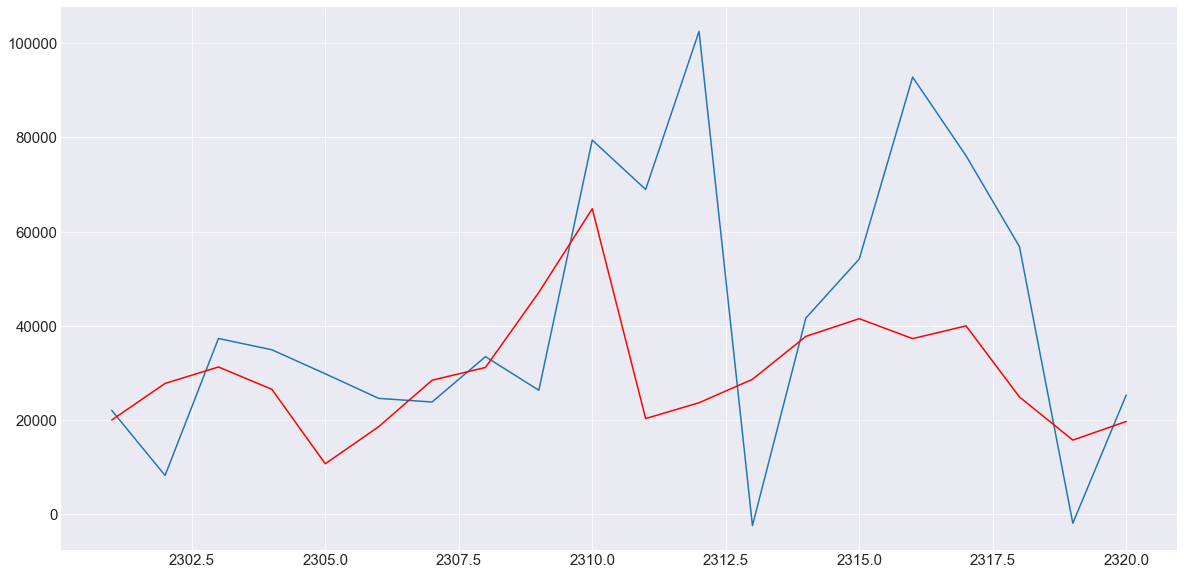

In [905]:
plt.plot(data_exp_predict.iloc[-20::1,:].index, y_pred)
plt.plot(data_exp_predict.iloc[-20::1,:].index, y_real, c='r')

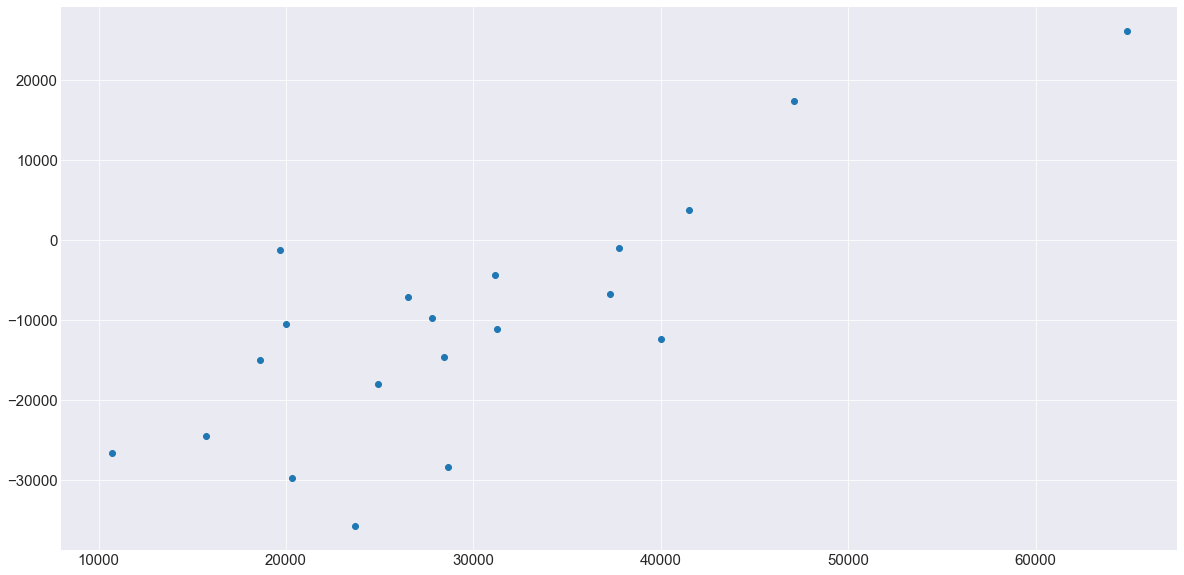

In [901]:
plt.scatter(y_real, y_real - y_pred)

In [792]:
X_real

Rev-1     Rev-2     Rev-3     Rev-4     Rev-5     Rev-6     Rev-7  \
1929  1.453576 -0.339158  0.103576  0.516689  0.924226  1.598839  1.099874   

         Rev-8     Rev-9    Rev-10  ...   Rev-357   Rev-358   Rev-359  \
1929 -0.136816 -0.788098 -1.565185  ...  0.807828  1.280233  0.166114   

       Rev-360   Rev-361   Rev-362   Rev-363   Rev-364   Rev-365   Revenue  
1929 -0.034039  1.414372  0.943711 -1.498295 -0.161984  0.463464  1.441114  

[1 rows x 366 columns]

In [ ]:
#Let's calculate the rolling mean
rolling_mean = data_small['Revenue'].rolling(window=7).mean()
rolling_mean.dropna(inplace= True)
#And the rolling std
rolling_std = data_small['Revenue'].rolling(window=7).std()
rolling_std.dropna(inplace= True)

Metodos clásicos

    Naive 2, which is actually a random walk model adjusted for season.
    Simple Exponential Smoothing.
    Holt.
    Damped exponential smoothing.
    Average of SES, Holt, and Damped.
    Theta method.
    ARIMA, automatic.
    ETS, automatic.
Métodos Machine Learning

    Multi-Layer Perceptron (MLP)
    Bayesian Neural Network (BNN)
    Radial Basis Functions (RBF)
    Generalized Regression Neural Networks (GRNN), also called kernel regression
    K-Nearest Neighbor regression (KNN)
    CART regression trees (CART)
    Support Vector Regression (SVR)
    Gaussian Processes (GP)
Redes Neuronales

    Recurrent Neural Network (RNN)
    Long Short-Term Memory (LSTM)


<AxesSubplot:>

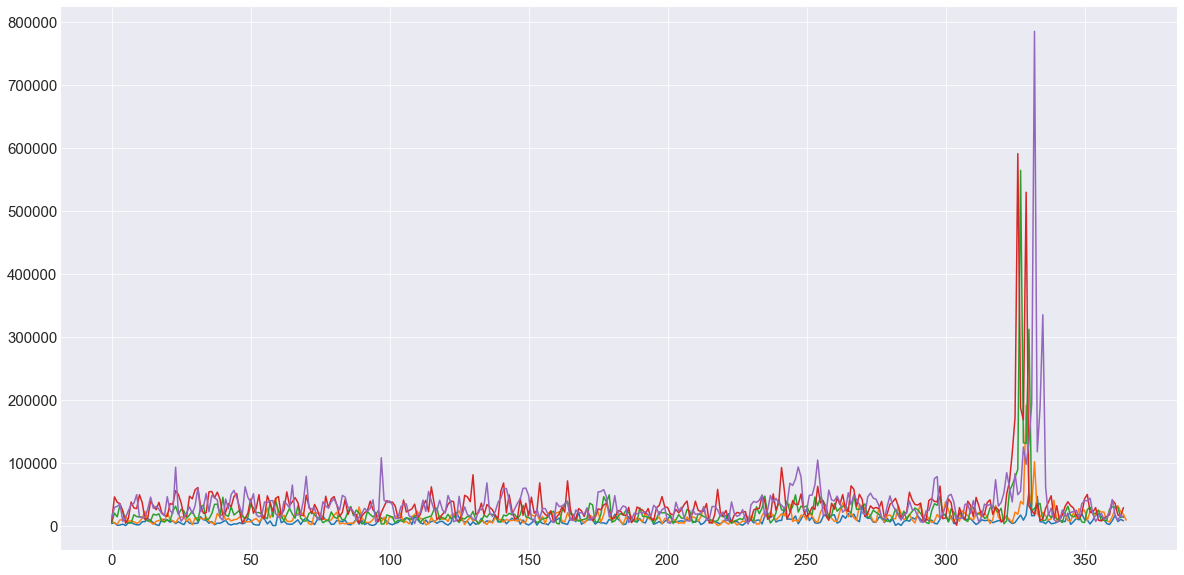

In [61]:
data_small[data_small['Year'] == 2015]['Revenue'].reset_index()['Revenue'].plot()
data_small[data_small['Year'] == 2016]['Revenue'].reset_index()['Revenue'].plot()
data_small[data_small['Year'] == 2017]['Revenue'].reset_index()['Revenue'].plot()
data_small[data_small['Year'] == 2018]['Revenue'].reset_index()['Revenue'].plot()
data_small[data_small['Year'] == 2019]['Revenue'].reset_index()['Revenue'].plot()

In [62]:
data_mean = data_small.groupby(['Month', 'Day'])['Revenue'].mean().reset_index()['Revenue']
data_std = data_small.groupby(['Month', 'Day'])['Revenue'].std().reset_index()['Revenue']
data_count = data_small.groupby(['Month', 'Day'])['Revenue'].count().reset_index()['Revenue']
merged = pd.concat([data_mean, data_std, data_count], axis= 1, keys= ['Mean', 'Std', 'Count'])
merged

Mean           Std  Count
0     6923.205714   3002.658450      7
1    19087.008571  14508.400695      7
2    20115.288571  14568.128637      7
3    21752.377143  14319.448372      7
4    14103.558571   8771.676004      7
..            ...           ...    ...
361  26854.458333  13331.839011      6
362  28188.535000   9692.742847      6
363  20089.566667  12387.406388      6
364  16405.676667   4939.062209      6
365  13904.096667   7593.079847      6

[366 rows x 3 columns]

In [63]:
merged['sup'] = merged['Mean'] + 2 * (merged['Std']/np.sqrt(merged['Count']))
merged['inf'] = merged['Mean'] - 2 * (merged['Std']/np.sqrt(merged['Count']))

<AxesSubplot:>

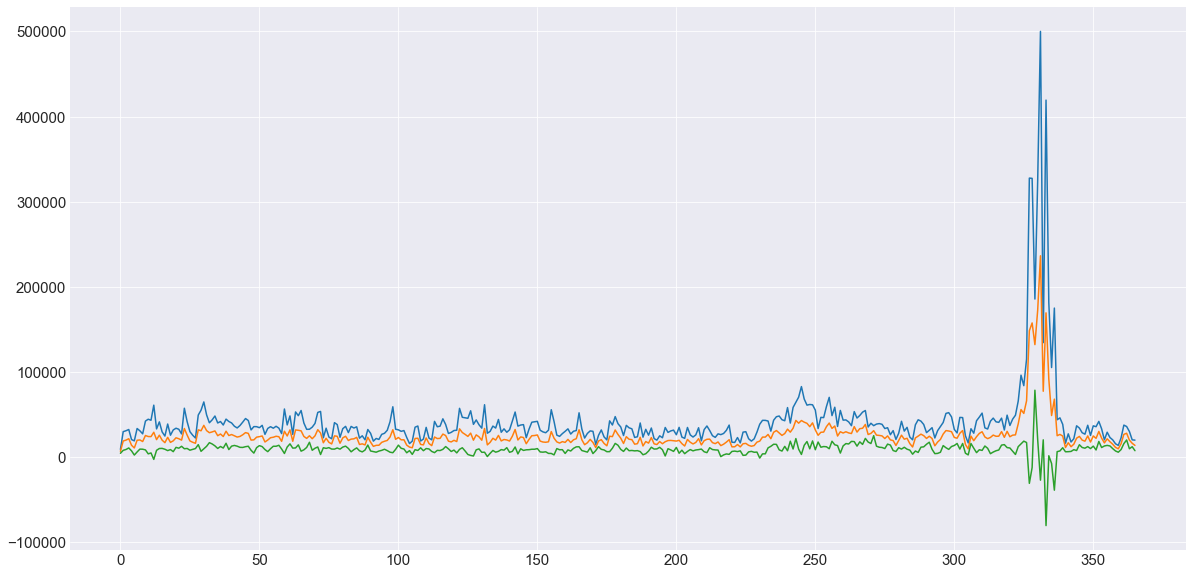

In [64]:
merged['sup'].plot()
merged['Mean'].plot()
merged['inf'].plot()

In [ ]:
rolling_mean = data_small.rolling(window=365).mean()